### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

# The Initial Section of the Notebook is aligned with the Report.
## Not all charts and workings were included in the report but remain in the notebook for reference.


## 1. Background 


According to the Office for National Statistics, the UK’s population is projected to increase by 3.2% to 69.2 million by mid-2030, with England growing at 3.5%. Additionally, the number of older people is expected to almost double by 2045. 

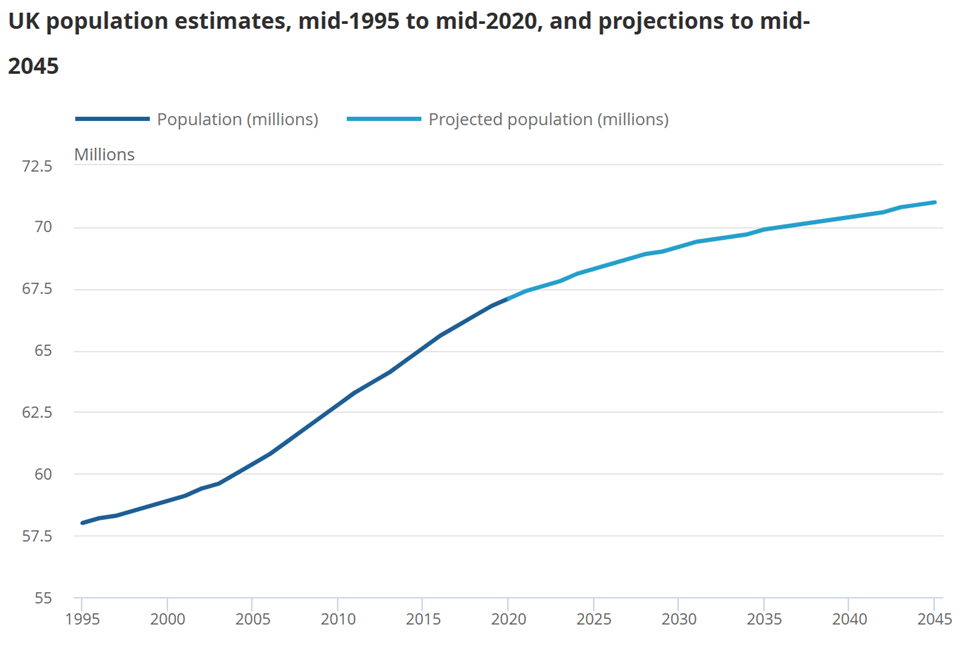

Given the backdrop of an increasing and ageing population, the NHS is faced continuously with issues concerning capacity and efficiency.

## 1.1  Organisational Problem

## Given current trends in utilisation, does the NHS need to increase its capacity and infrastructure, or should it focus on extracting maximum value from its existing resources?


## 1.2 Scope of the Report and Limitations - see report.

## 1.3	Analytical Approach

##  Analytical Approach

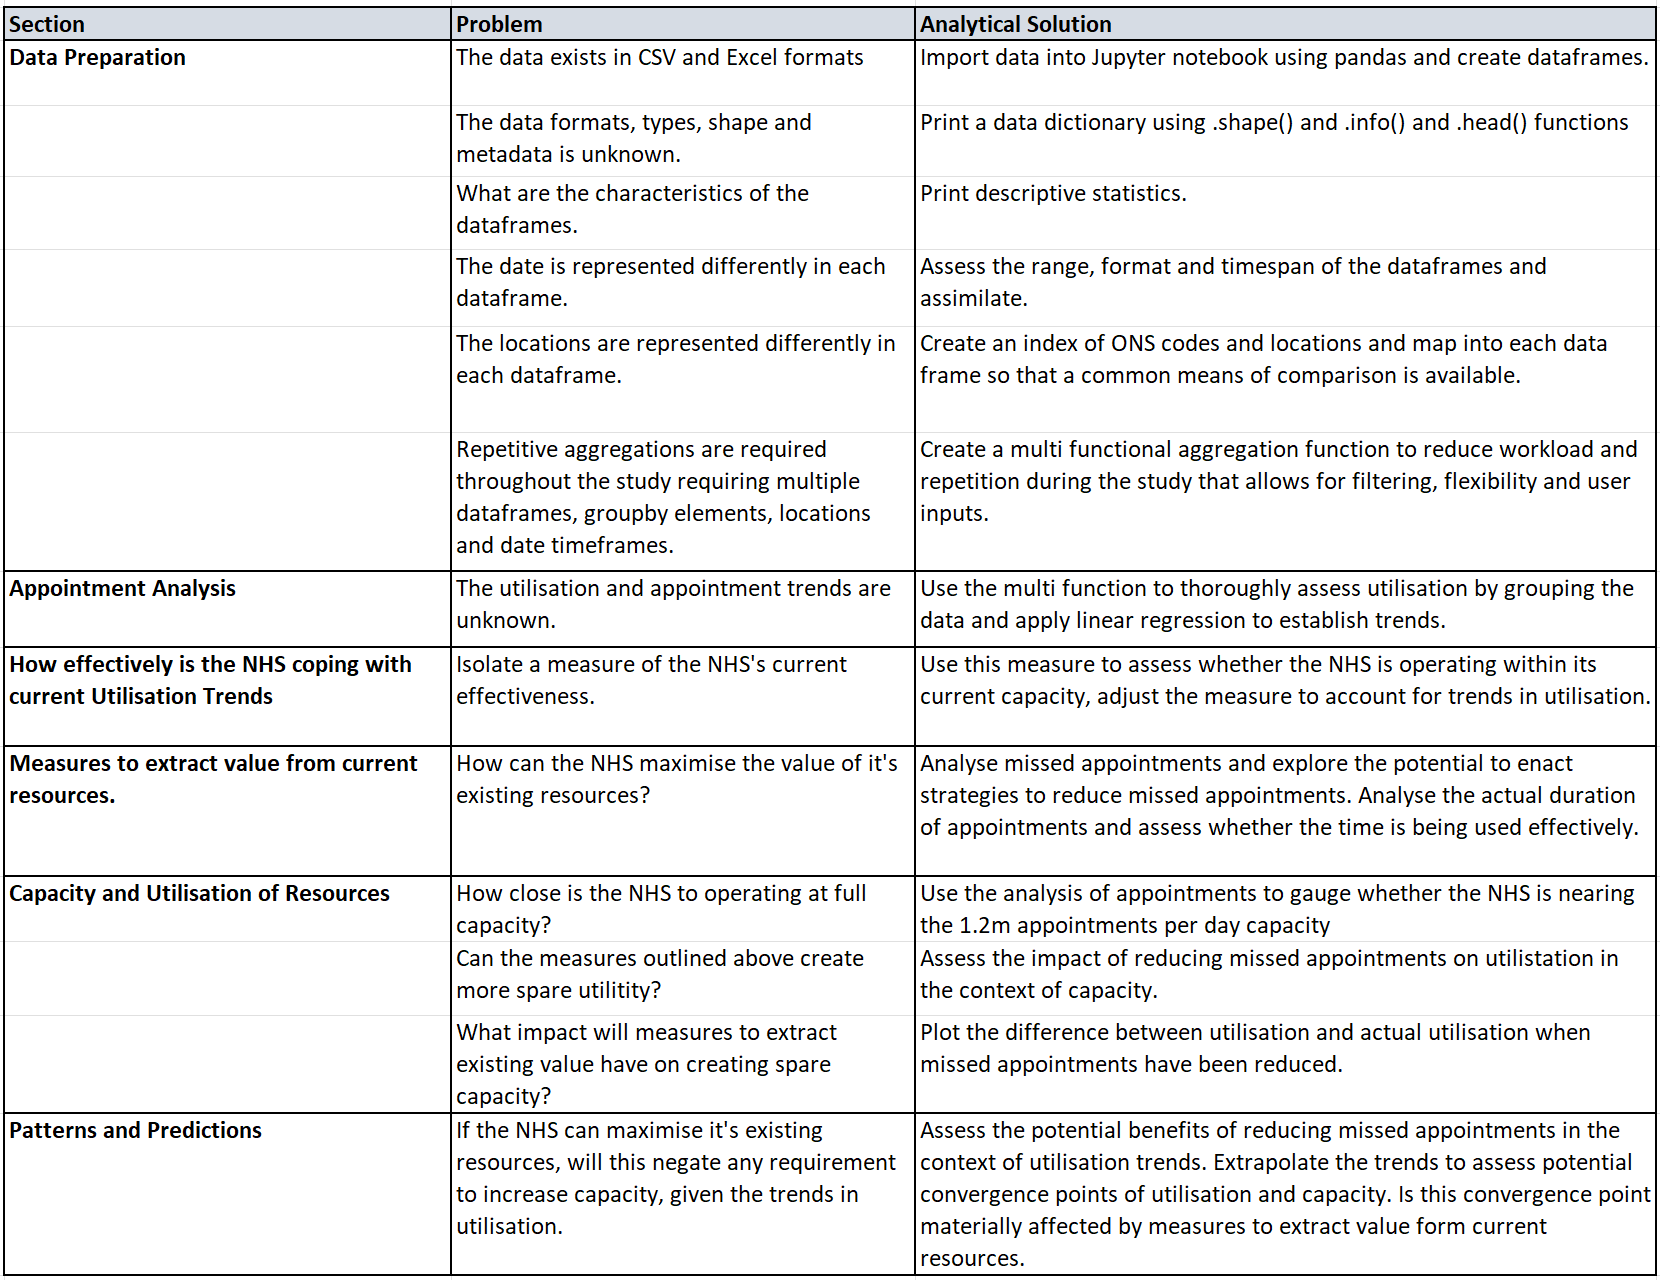



# 

## 2. Data Preparation
**Basic exploration and descriptive statistics.**
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

### 2.1 Importing Data and Basic Exploration

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import date2num, MonthLocator
from datetime import datetime, timedelta

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import 'actual_duration.csv' as ad.

ad = pd.read_csv('actual_duration.csv')


**Note:** df.info() contains columns, non-null counts and data types. There is therfore no requirement for separate df.columns, df.dtypes and a simple cross check of non null count to df.shape alerts to the existence of null values (a df with many cloumns might require a ad.isnull().sum() function).

In [3]:
# View the shape of the DataFrame. Review metadata incl columns, null values and data types. Sense check top 5 rows.

print(ad.shape)
print(ad.info())
ad.head()

(137793, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

Limitations and observations:

- Missing icb_location_name
- Data span from – 01/12/2021 – 30/06/2022 – 7 months
- Date format is object not datetime and is represented in dates only. Not isolated for months.

In [4]:
# Import 'appointments_regional.csv' as ar.

ar = pd.read_csv('appointments_regional.csv')


In [5]:
# View the shape of the DataFrame. Review metadata incl columns, null values and data types. Sense check top 5 rows.

print(ar.shape)
print(ar.info())
ar.head()

(596821, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

Limitations and observations:

- Missing icb_location_name
- Data span from – January 2020 – June 2022-  30 months
- Date format not datetime - only represented in months not dates.

In [6]:
# Import 'national_categories.xlsx' as nc.

nc = pd.read_excel('national_categories.xlsx')


In [7]:
# View the shape of the DataFrame. Review metadata incl columns, null values and data types. Sense check top 5 rows.

print(nc.shape)
print(nc.info())
nc.head()

(817394, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

Limitations and observations:

- Missing icb_location name in separate column. String split the suffix of sub_icb_location name.
- Data span from – 01/08/2021 – 30/06/2022 – 11 months
- Date format in datetime. Contains both date formats - months and days.

## 2.2	Descriptive Statistics

In [8]:
# Compare the descriptive statistics of the 3 dataframes side by side for easy comparison.

descriptive_stats = pd.concat([ad.describe(), 
      ar.describe(), 
      nc.describe()], axis=1).round(2)
descriptive_stats.columns = ['ad stats', 'ar stats', 'nc stats']
print(descriptive_stats)

        ad stats   ar stats   nc stats
count  137793.00  596821.00  817394.00
mean     1219.08    1244.60     362.18
std      1546.90    5856.89    1084.58
min         1.00       1.00       1.00
25%       194.00       7.00       7.00
50%       696.00      47.00      25.00
75%      1621.00     308.00     128.00
max     15400.00  211265.00   16590.00


## 2.3 Date Assimilation, Range and Timespan


The datasets span different time periods and have different formats. Nc provides for dates and has an isolated month column, ad provides only appointment date and ar only appointment month. Prior to analysis, the dates were assimilated as follows:

- Correct formats so that the appointment_date is in datetime format.
- Isolate appointment_month for ad.
- Calculate the earliest and latest dates in the datasets.
- Calculate the timespan of each dataset.


### actual_duration

In [9]:
# View the first and last five rows of appointment_date for the ad DataFrame to determine the date format.

print(ad['appointment_date'].head())
print(ad['appointment_date'].tail())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object
137788    30-Jun-22
137789    30-Jun-22
137790    30-Jun-22
137791    30-Jun-22
137792    30-Jun-22
Name: appointment_date, dtype: object


The appointment dates are formatted as objects. We must convert to datetime.

In [10]:
# Change the date format of ad['appointment_date'].

ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Sense check date conversion. Tail as head could be incorrect ie 1 December or 12 January.
print(ad['appointment_date'].dtypes)
print(ad['appointment_date'].head())
print(ad['appointment_date'].tail())

datetime64[ns]
0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, dtype: datetime64[ns]


appointment_date now conforms to datetime.

In [11]:
# Add a column to show appointment month

ad['appointment_month'] = ad['appointment_date']
ad['appointment_month'] = pd.to_datetime(ad['appointment_month']).dt.strftime('%Y-%m')
print(ad['appointment_month'].head())


0    2021-12
1    2021-12
2    2021-12
3    2021-12
4    2021-12
Name: appointment_month, dtype: object


In [12]:
# Determine the minimum and maximum dates in the ad DataFrame.

ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad_min_date = ad['appointment_date'].dt.date.min()
ad_max_date = ad['appointment_date'].dt.date.max()

# What is the timespan of the ad dataframe

time_span = np.timedelta64(ad_max_date - ad_min_date)

# Convert to days and months

days = time_span.astype('timedelta64[D]').astype(int)

months = days // 30  

# Calculate remaining days
remaining_days = days % 30

print(f"The earliest date in the ad dataframe is {ad_min_date}")
print(f"The latest date in the ad dataframe is {ad_max_date}")
print((f"Time Span: {months} months and {remaining_days} day(s)"))

The earliest date in the ad dataframe is 2021-12-01
The latest date in the ad dataframe is 2022-06-30
Time Span: 7 months and 1 day(s)


### national_category

In [13]:
# View the first five rows of appointment_date and appointment_month for the nc DataFrame to determine the date format.

print(nc[['appointment_date', 'appointment_month']].dtypes)
print(nc[['appointment_date', 'appointment_month']].head())

appointment_date     datetime64[ns]
appointment_month            object
dtype: object
  appointment_date appointment_month
0       2021-08-02           2021-08
1       2021-08-02           2021-08
2       2021-08-02           2021-08
3       2021-08-02           2021-08
4       2021-08-02           2021-08


The appointment date in nc is correctly formatted as datetime. Appointment months are objects as expected.

In [14]:
# Determine the minimum and maximum dates in the nc DataFrame.

nc_min_date = nc['appointment_date'].dt.date.min()
nc_max_date = nc['appointment_date'].dt.date.max()

# What is the timespan of the nc dataframe

time_span = np.timedelta64(nc_max_date - nc_min_date)

# Convert to days and months

days = time_span.astype('timedelta64[D]').astype(int)

months = days // 30  

# Calculate remaining days
remaining_days = days % 30

print(f"The earliest date in the nc dataframe is {nc_min_date}")
print(f"The latest date in the nc dataframe is {nc_max_date}")
print((f"Time Span: {months} months and {remaining_days} day(s)"))

The earliest date in the nc dataframe is 2021-08-01
The latest date in the nc dataframe is 2022-06-30
Time Span: 11 months and 3 day(s)


### appointments_regional

In [15]:
# Change the format of ar['appointment_month'] to datetime and convert to YY-MM

ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar['appointment_month'] = ar['appointment_month'].dt.strftime('%Y-%m')

# View the DataFrame.
print(ar['appointment_month'].head())

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [16]:
# What is the timespan of the ar dataframe
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar_min_date = ar['appointment_month'].dt.date.min()
ar_max_date = ar['appointment_month'].dt.date.max()

time_span = np.timedelta64(ar_max_date - ar_min_date)

# Convert to days and months

days = time_span.astype('timedelta64[D]').astype(int)

months = days // 30  

# Calculate remaining days
remaining_days = days % 30
print((f"Time Span: {months} months and {remaining_days} day(s)"))

Time Span: 29 months and 12 day(s)


In [17]:
# Reformat ar_appointment_month for later merge
ar['appointment_month'] = ar['appointment_month'].dt.strftime('%Y-%m')

## 2.4 A Multi-functional Aggregation Function

Aggregating the number of appointments in the datasets will be required in multiple questions. Therefore, a function was created that allows for the selection of a dataframe and groupby element to return the aggregated (sum) of appointments. The function has been created iteratively and certain functionality has been added when required, such as location and date filters. The accompanying report outlines the different sections of the function in more detail, however it's main functionality is summarised below.

The sum_appointments_multi functions seeks to achieve the following:

1. Return the sum of appointments in a wide variety of user defined groupings.
2. Allow the user to specify the dataframe and parameters to use.
3. Allow non-technical user inputs. (User inputs have been surpressed in the notebook to allow the marker to run the code without having to input the parameters manually each time).
4. Allow for flexibility. A number of questions posed by the NHS are specific in nature. The function allows for the selection of different parameters and therefore widens the scope to accommodate future variations of the business questions.
5. Allows for filtering the dataframes by location and date. 
6. Allow for the dataframe created in the function to used outside the function.


In [18]:
# Multi-functional sum_appointment function. 

def sum_appointments_multi_user():
    new_df_name = input("Please name the new df: ")
    from_df_name = input("From which df (nc, ar, or ad): ")
    group_by1 = input("Input column to groupby? ")
    group_by2_option = input("Would you like a 2nd groupby? y/n: ")
    group_by2 = None
    if group_by2_option.lower() == 'y':
        group_by2 = input("Input 2nd column to groupby?? ")
    location_filter = input("Filter by location? y/n: ")
    location = None
    date_filter = input("Choose specific dates? y/n: ")
    start_date = None
    end_date = None
    sort = None
       
    # Convert user input string to dataframe name.
    
    if from_df_name == 'nc':
        from_df = nc
    elif from_df_name == 'ar':
        from_df = ar
    elif from_df_name == 'ad':
        from_df = ad
    else:
        raise ValueError("Invalid DataFrame name")
    
    """ There are 4 combinations of user input. Both location and dates, location but no dates, 
    dates but no loction and neither dates nor location """
    
    # If user chooses date filter - Convert start_date and end_date to datetime objects
    
    # Filter for location and dates
    
    if date_filter.lower() == 'y' and location_filter.lower() == 'y':
        if from_df_name == 'ar':
            location = input("Enter location code: ")
            start_date = input("Start month (YYYY-MM): ")
            end_date = input("End month (YYYY-MM): ")
     # Convert to datetime   
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
            # Filter
            filtered_df = from_df[(from_df['icb_ons_code'] == location) &
                                  (pd.to_datetime(from_df['appointment_month']) >= start_date) &
                                  (pd.to_datetime(from_df['appointment_month']) <= end_date)]
        else:    
            location = input("Enter location code: ")
            start_date = input("Start date (YYYY-MM-DD): ")
            end_date = input("End date (YYYY-MM-DD): ")
            # Convert to datetime   
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)        
            # Filter
            filtered_df = from_df[(from_df['icb_ons_code'] == location) &
                          (from_df['appointment_date'] >= start_date) & 
                          (from_df['appointment_date'] <= end_date)]
    
    # Filter for just dates    
    
    elif date_filter.lower() == 'y' and location_filter.lower() == 'n':
        if from_df_name == 'ar':
            start_date = input("Start month (YYYY-MM): ")
            end_date = input("End month (YYYY-MM): ")
            # Convert to datetime   
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
            # Filter
            filtered_df = from_df[
                (pd.to_datetime(from_df['appointment_month']) >= start_date) &
                (pd.to_datetime(from_df['appointment_month']) <= end_date)]
        else:    
            start_date = input("Start date (YYYY-MM-DD): ")
            end_date = input("End date (YYYY-MM-DD): ")
            # Convert to datetime 
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
            # Filter
            filtered_df = from_df[(from_df['appointment_date'] >= start_date) & 
                          (from_df['appointment_date'] <= end_date)]
   
    # Filter for just location    
        
    elif date_filter.lower() == 'n' and location_filter.lower() == 'y':
        location = input("Enter location code: ")
        filtered_df = from_df[from_df['icb_ons_code'] == location]
    
    # General groupby no filters
    
    else:
        filtered_df = from_df
    
    # Group and sum appointments based on user-defined columns
    
    if group_by2_option.lower() == 'y':
        grouped_df = filtered_df.groupby([group_by1, group_by2])['count_of_appointments'].sum().reset_index()
    else:
        grouped_df = filtered_df.groupby(group_by1)['count_of_appointments'].sum().reset_index()  
    
    # If user selects sort data.
    
    sort = input("Sort data? y/n: ")
    
    if sort.lower() == 'y':
        grouped_df.sort_values(by=['count_of_appointments'], inplace=True, ascending=False)
        globals()[new_df_name] = grouped_df # Enables the new df to be used outside of the function.
        top_5 = input("Top 5? y/n: ")
        
    # Output according to user's choice of Top 5 or full data
    
        if top_5.lower() == "y":
            print("Number of records: ",grouped_df[group_by1].nunique())
            return grouped_df.head()
        else:
            print("Number of records: ",grouped_df[group_by1].nunique())
            return grouped_df
    
    # If sorting isn't selected, the output is in the order of occurrence in the selected dataframe.
    
    else:
        globals()[new_df_name] = grouped_df # Enables the new df to be used outside of the function.
        print("Number of records: ",grouped_df[group_by1].nunique())
        return grouped_df.head(10)

### For ease of use for the marker, the parameters have been selected and the following function used throughout the analysis

In [19]:
# For ease of use for the marker, the parameters have been selected.

def sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5):
    
    # Convert user input string to dataframe name. This code is superfluous if the user inputs aren't used. 
    # However, it was maintained for illustrative purposes. You'll note below the requirement to specify the df in "".
  
    if from_df_name == 'nc':
        from_df = nc
    elif from_df_name == 'ar':
        from_df = ar
    elif from_df_name == 'ad':
        from_df = ad
    else:
        raise ValueError("Invalid DataFrame name")

    # Filter for location and dates        
        
    """ There are 4 combinations of user input. Both location and dates, location but no dates, 
    dates but no loction and neither dates nor location """
    
    # If user chooses date filter - Convert start_date and end_date to datetime objects   
    
    # Filter for Location and dates
    if date_filter.lower() == 'y' and location_filter.lower() == 'y':
        if from_df_name == 'ar':
            filtered_df = from_df[(from_df['icb_ons_code'] == location) &
                                  (pd.to_datetime(from_df['appointment_month']) >= pd.to_datetime(start_date)) &
                                  (pd.to_datetime(from_df['appointment_month']) <= pd.to_datetime(end_date))]
        else:
            filtered_df = from_df[(from_df['icb_ons_code'] == location) &
                                  (from_df['appointment_date'] >= pd.to_datetime(start_date)) &
                                  (from_df['appointment_date'] <= pd.to_datetime(end_date))]

    # Filter for just dates
    elif date_filter.lower() == 'y' and location_filter.lower() == 'n':
        if from_df_name == 'ar':
            filtered_df = from_df[
                (pd.to_datetime(from_df['appointment_month']) >= pd.to_datetime(start_date)) &
                (pd.to_datetime(from_df['appointment_month']) <= pd.to_datetime(end_date))]
        else:
            filtered_df = from_df[(from_df['appointment_date'] >= pd.to_datetime(start_date)) &
                                  (from_df['appointment_date'] <= pd.to_datetime(end_date))]

    # Filter for just location
    elif date_filter.lower() == 'n' and location_filter.lower() == 'y':
        filtered_df = from_df[from_df['icb_ons_code'] == location]

    # General groupby no filters
    else:
        filtered_df = from_df

    # Group and sum appointments based on user-defined columns
    if group_by2_option.lower() == 'y':
        grouped_df = filtered_df.groupby([group_by1, group_by2])['count_of_appointments'].sum().reset_index()
    else:
        grouped_df = filtered_df.groupby(group_by1)['count_of_appointments'].sum().reset_index()
        
    # If user selects sort data.
    if sort.lower() == 'y':
        grouped_df.sort_values(by=['count_of_appointments'], inplace=True, ascending=False)
        globals()[new_df_name] = grouped_df  # Enables the new df to be used outside of the function.

        # Output according to user's choice of Top 5 or full data
        if top_5.lower() == "y":
            print(f"Number of {group_by1}: ", grouped_df[group_by1].nunique())
            return grouped_df.head()
        else:
            print(f"Number of {group_by1}: ", grouped_df[group_by1].nunique())
            return grouped_df

    # If sorting isn't selected, the output is in the order of occurrence in the selected dataframe.
    else:
        globals()[new_df_name] = grouped_df  # Enables the new df to be used outside of the function.
        print(f"Number of {group_by1}: ", grouped_df[group_by1].nunique())
        return grouped_df.head(10)

## 2.5 Locations: Index and Mapping

The locations are represented differently across the data sets. 

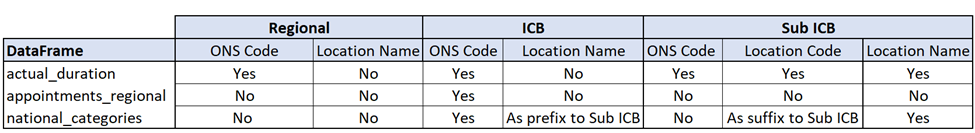

The common representation is ICB ONS codes. However, the actual ICB location names aren't universally provided. It would be useful to create an index of ICB codes and their respective locations. This index can be 'mapped' into the data sets that don't have the location names specified.

To enable comparison between datasets based on location, an index of ONS codes and their respective location names was created as follows.

1. Use the national_categories (nc) to create a new dataframe (icb_location_name) as it has both the ICB ONS codes and ICB locations (as a prefix to sub ICB locations). String split using the hyphen as the delimiter. 
2. ICB ONS codes added to icb_location_name.
3. Match ICB ONS codes with icb_location_name and create single records by grouping by icb_ons_codes and creating new dataframe location_codes_index.
4. Sort by ICB ONS codes in ascending order.
5. Reset index as icb_ons_code.


###  ICB ONS code and Location Index

We can use the national_categories to create the index as it has both the ICB ONS codes and ICB locations (as a prefix to sub ICB locations).

In [20]:
# Split the sub ICB column into ICB location and sub ICB suffix.

icb_location_name = nc['sub_icb_location_name'].str.split(' - ', expand=True)

# Add associated ICB ONS codes and rename column

icb_location_name['icb_ons_code'] = nc['icb_ons_code']
icb_location_name.rename(columns={0:'icb_location_name'}, inplace=True)

# Location codes matched to ICB locations to create an Index of ICBs and sort the codes in ascending order

location_codes_index = pd.DataFrame(icb_location_name.groupby('icb_location_name')['icb_ons_code'].value_counts().\
                                    reset_index(name='counts'))
location_codes_index.sort_values(by='icb_ons_code', inplace=True)

# Remove the count column and set index as 'icb_ons_code'.

del location_codes_index ['counts']
location_codes_index.set_index('icb_ons_code', inplace=True)

print(location_codes_index.shape)
location_codes_index

(42, 1)


icb_location_name
icb_ons_code                                                   
E54000008                       NHS Cheshire and Merseyside ICB
E54000010              NHS Staffordshire and Stoke-on-Trent ICB
E54000011                 NHS Shropshire Telford and Wrekin ICB
E54000013                                  NHS Lincolnshire ICB
E54000015          NHS Leicester Leicestershire and Rutland ICB
E54000018                     NHS Coventry and Warwickshire ICB
E54000019              NHS Herefordshire and Worcestershire ICB
E54000022                           NHS Norfolk and Waveney ICB
E54000023                  NHS Suffolk and North East Essex ICB
E54000024          NHS Bedfordshire Luton and Milton Keynes ICB
E54000025                  NHS Hertfordshire and West Essex ICB
E54000026                           NHS Mid and South Essex ICB
E54000027                             NHS North West London ICB
E54000028                          NHS North Central London ICB
E54000029                             NHS North East London ICB
E54000030                             NHS South East London ICB
E54000031                             NHS South West London ICB
E54000032                               NHS Kent and Medway ICB
E54000034                                       NHS Frimley ICB
E54000036              NHS Cornwall and The Isles Of Scilly ICB
E54000037                                         NHS Devon ICB
E54000038                                      NHS Somerset ICB
E54000039     NHS Bristol North Somerset and South Glouceste...
E54000040     NHS Bath and North East Somerset Swindon and W...
E54000041                                        NHS Dorset ICB
E54000042                   NHS Hampshire and Isle Of Wight ICB
E54000043                               NHS Gloucestershire ICB
E54000044     NHS Buckinghamshire Oxfordshire and Berkshire ...
E54000048                  NHS Lancashire and South Cumbria ICB
E54000050                  NHS North East and North Cumbria ICB
E54000051                    NHS Humber and North Yorkshire ICB
E54000052                             NHS Surrey Heartlands ICB
E54000053                                        NHS Sussex ICB
E54000054                                NHS West Yorkshire ICB
E54000055                       NHS Birmingham and Solihull ICB
E54000056               NHS Cambridgeshire and Peterborough ICB
E54000057                            NHS Greater Manchester ICB
E54000058                          NHS Derby and Derbyshire ICB
E54000059                              NHS Northamptonshire ICB
E54000060                NHS Nottingham and Nottinghamshire ICB
E54000061                               NHS South Yorkshire ICB
E54000062                                 NHS Black Country ICB

### Mapping Function

The next step is to use the index above to map the ICB location names to their coressponding codes in the data sets. The following function was created enabling the mapping of the locations into selected dataframes at a specific column position. 

In [21]:
# Function to map locations into dataframes, specifying a column position using the icb_ons_code index.

def mapping_location_names(df, position):
    df['icb_location_name'] = df.icb_ons_code.map({'E54000008':'NHS Cheshire and Merseyside ICB',
                                         'E54000010':'NHS Staffordshire and Stoke-on-Trent ICB',
                                                   'E54000011':'NHS Shropshire Telford and Wrekin ICB',
                                                   'E54000013':'NHS Lincolnshire ICB',
                                                   'E54000015':'NHS Leicester Leicestershire and Rutland ICB',
                                                   'E54000018':'NHS Coventry and Warwickshire ICB',
                                                   'E54000019':'NHS Herefordshire and Worcestershire ICB',
                                                   'E54000022':'NHS Norfolk and Waveney ICB',
                                                   'E54000023':'NHS Suffolk and North East Essex ICB',
                                                   'E54000024':'NHS Bedfordshire Luton and Milton Keynes ICB',
                                                   'E54000025':'NHS Hertfordshire and West Essex ICB',
                                                   'E54000026':'NHS Mid and South Essex ICB',
                                                   'E54000027':'NHS North West London ICB',
                                                   'E54000028':'NHS North Central London ICB',
                                                   'E54000029':'NHS North East London ICB',
                                                   'E54000030':'NHS South East London ICB',
                                                   'E54000031':'NHS South West London ICB',
                                                   'E54000032':'NHS Kent and Medway ICB',
                                                   'E54000034':'NHS Frimley ICB',
                                                   'E54000036':'NHS Cornwall and The Isles Of Scilly ICB',
                                                   'E54000037':'NHS Devon ICB',
                                                   'E54000038':'NHS Somerset ICB',
                                                   'E54000039':'NHS Bristol North Somerset and South Glouceste...',
                                                   'E54000040':'NHS Bath and North East Somerset Swindon and W...',
                                                   'E54000041':'NHS Dorset ICB',
                                                   'E54000042':'NHS Hampshire and Isle Of Wight ICB',
                                                   'E54000043':'NHS Gloucestershire ICB',
                                                   'E54000044':'NHS Buckinghamshire Oxfordshire and Berkshire...',
                                                   'E54000048':'NHS Lancashire and South Cumbria ICB',
                                                   'E54000050':'NHS North East and North Cumbria ICB',
                                                   'E54000051':'NHS Humber and North Yorkshire ICB',
                                                   'E54000052':'NHS Surrey Heartlands ICB',
                                                   'E54000053':'NHS Sussex ICB',
                                                   'E54000054':'NHS West Yorkshire ICB',
                                                   'E54000055':'NHS Birmingham and Solihull ICB',
                                                   'E54000056':'NHS Cambridgeshire and Peterborough ICB',
                                                   'E54000057':'NHS Greater Manchester ICB',
                                                   'E54000058':'NHS Derby and Derbyshire ICB',
                                                   'E54000059':'NHS Northamptonshire ICB',
                                                   'E54000060':'NHS Nottingham and Nottinghamshire ICB',
                                                   'E54000061':'NHS South Yorkshire ICB',
                                                   'E54000062':'NHS Black Country ICB'})
    # Move icb_location_name 
    move_icb_location_name = df.pop('icb_location_name')
    df.insert(position, 'icb_location_name', move_icb_location_name)
    return df


In [22]:
nc = mapping_location_names(nc, 2)
print(nc.shape)
nc.head()

(817394, 9)


appointment_date icb_ons_code                     icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB   

                        sub_icb_location_name       service_setting  \
0  NHS North East and North Cumbria ICB - 00L  Primary Care Network   
1  NHS North East and North Cumbria ICB - 00L                 Other   
2  NHS North East and North Cumbria ICB - 00L      General Practice   
3  NHS North East and North Cumbria ICB - 00L      General Practice   
4  NHS North East and North Cumbria ICB - 00L      General Practice   

             context_type                       national_category  \
0  Care Related Encounter  Patient contact during Care Home Round   
1  Care Related Encounter                         Planned Clinics   
2  Care Related Encounter                              Home Visit   
3  Care Related Encounter              General Consultation Acute   
4  Care Related Encounter            Structured Medication Review   

   count_of_appointments appointment_month  
0                      3           2021-08  
1                      7           2021-08  
2                     79           2021-08  
3                    725           2021-08  
4                      2           2021-08

In [23]:
ar = mapping_location_names(ar, 1)
print(ar.shape)
ar.head()

(596821, 8)


icb_ons_code icb_location_name appointment_month appointment_status  \
0    E54000034   NHS Frimley ICB           2020-01           Attended   
1    E54000034   NHS Frimley ICB           2020-01           Attended   
2    E54000034   NHS Frimley ICB           2020-01           Attended   
3    E54000034   NHS Frimley ICB           2020-01           Attended   
4    E54000034   NHS Frimley ICB           2020-01           Attended   

  hcp_type appointment_mode time_between_book_and_appointment  \
0       GP     Face-to-Face                             1 Day   
1       GP     Face-to-Face                    15  to 21 Days   
2       GP     Face-to-Face                       2 to 7 Days   
3       GP     Face-to-Face                    22  to 28 Days   
4       GP     Face-to-Face                     8  to 14 Days   

   count_of_appointments  
0                   8107  
1                   6791  
2                  20686  
3                   4268  
4                  11971

In [24]:
ad = mapping_location_names(ad, 4)
print(ad.shape)
ad.head()

(137793, 10)


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050   
1  NHS North East and North Cumbria ICB - 00L    E54000050   
2  NHS North East and North Cumbria ICB - 00L    E54000050   
3  NHS North East and North Cumbria ICB - 00L    E54000050   
4  NHS North East and North Cumbria ICB - 00L    E54000050   

                      icb_location_name region_ons_code appointment_date  \
0  NHS North East and North Cumbria ICB       E40000012       2021-12-01   
1  NHS North East and North Cumbria ICB       E40000012       2021-12-01   
2  NHS North East and North Cumbria ICB       E40000012       2021-12-01   
3  NHS North East and North Cumbria ICB       E40000012       2021-12-01   
4  NHS North East and North Cumbria ICB       E40000012       2021-12-01   

          actual_duration  count_of_appointments appointment_month  
0           31-60 Minutes                    364           2021-12  
1           21-30 Minutes                    619           2021-12  
2            6-10 Minutes                   1698           2021-12  
3  Unknown / Data Quality                   1277           2021-12  
4           16-20 Minutes                    730           2021-12

Each data set is now updated to contain corressponding ICB location names. Importantly, we can use the larger dataset, appointments regional, to gain insight into the locations with the highest number of appointments.

## How many locations are there and which locations have most appointments?


### Locations

In [25]:
# Determine the number of locations - regional, icb and sub-icb.

regional_locations = ad['region_ons_code'].nunique()
icb_locations = ar['icb_ons_code'].nunique()
sub_icb_locations = nc['sub_icb_location_name'].nunique()

print("Regional locations: ",regional_locations) 
print("ICB locations: ", icb_locations)  
print("Sub ICB locations: ", sub_icb_locations)

Regional locations:  7
ICB locations:  42
Sub ICB locations:  106



### What are the Top 5 locations in terms of appointments? 

There are 3 categories of location: Sub ICB, ICB and Regional.



**Important**: The number of records does not provide full understanding of the number of appointments as they are aggregated. To find the top 5 locations we must group the locations and sum the appointments within each location. This is easily done using the sum_appointments_multi
function.


### Top 5 sub ICBS


In [26]:
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "sub_icb_locations"
from_df_name = "nc"
group_by1 = "sub_icb_location_name"
group_by2_option = "n"
group_by2 = None
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "y"
top_5 = "y"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of sub_icb_location_name:  106


sub_icb_location_name  count_of_appointments
76            NHS North West London ICB - W2U3Z               12142390
67            NHS North East London ICB - A3A8R                9588891
47                NHS Kent and Medway ICB - 91Q                9286167
36  NHS Hampshire and Isle Of Wight ICB - D9Y0V                8288102
82              NHS South East London ICB - 72Q                7850170

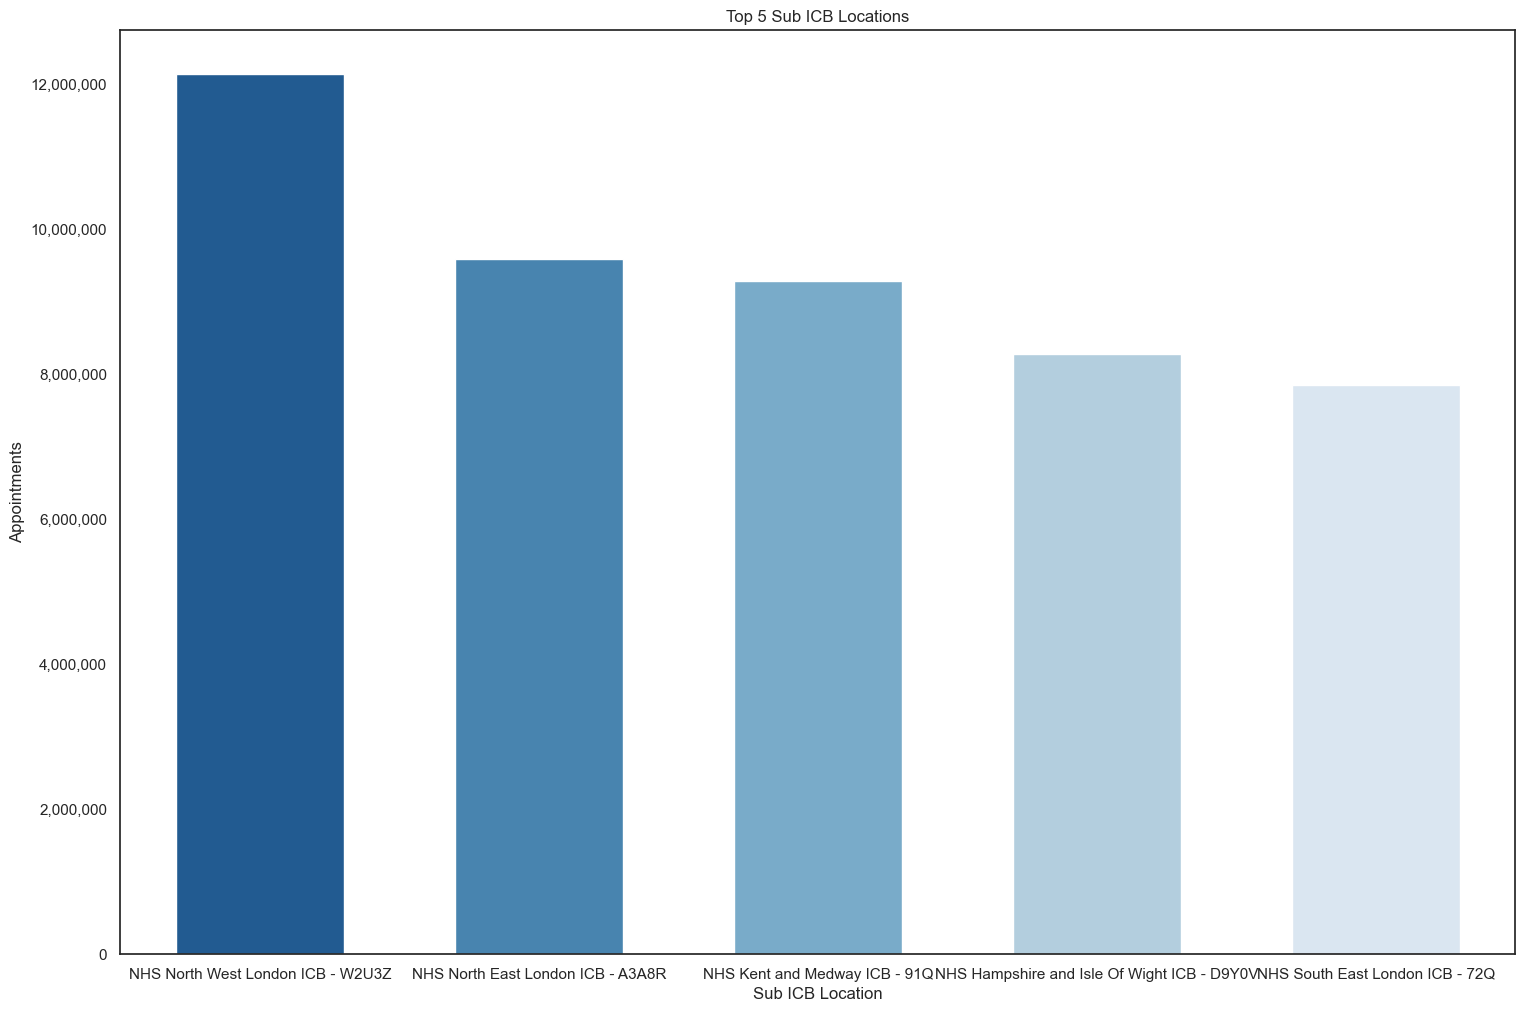

In [27]:
# Bar plot for the top 5 sub_icb_locations

# Set size and background colour 
sns.set(rc={'figure.figsize':(18, 12)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="sub_icb_location_name", y='count_of_appointments', 
             data=sub_icb_locations.head(), palette="Blues_r", width=0.6)

# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Top 5 Sub ICB Locations")
ax.set_xlabel("Sub ICB Location")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Top 5 Sub ICB Locations.png')

### Top 5 ICBS


In [28]:
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "icb_locations"
from_df_name = "nc"
group_by1 = "icb_location_name"
group_by2_option = "n"
group_by2 = None
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "y"
top_5 = "y"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of icb_location_name:  42


icb_location_name  count_of_appointments
28  NHS North East and North Cumbria ICB               16882235
41                NHS West Yorkshire ICB               14358371
15            NHS Greater Manchester ICB               13857900
7        NHS Cheshire and Merseyside ICB               13250311
29             NHS North West London ICB               12142390

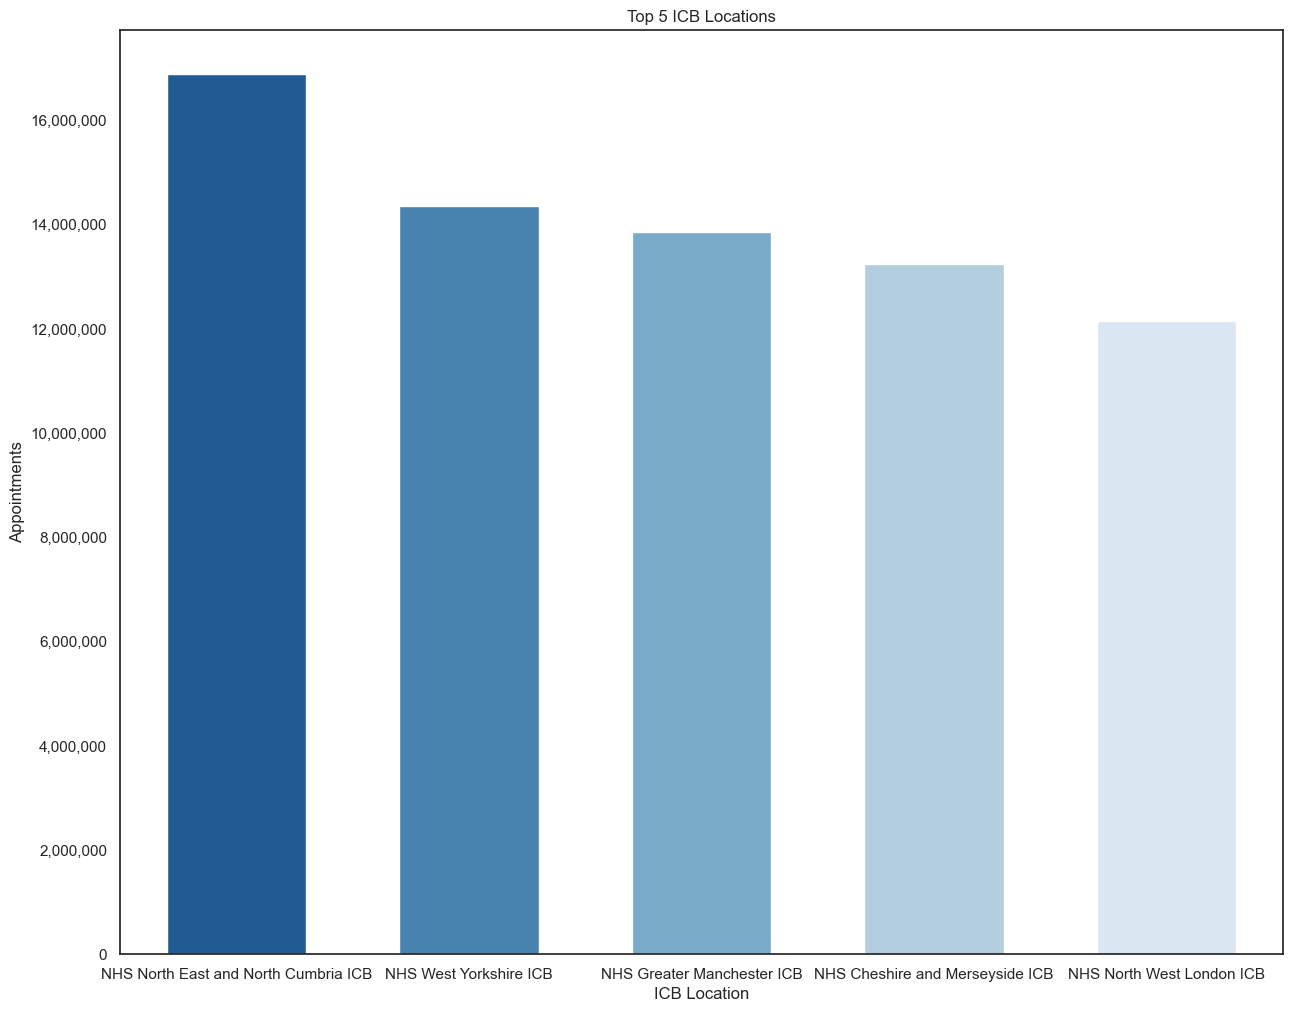

In [29]:
# Bar plot for the top 5 icb_locations

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="icb_location_name", y='count_of_appointments', 
             data=icb_locations.head(), palette="Blues_r", width=0.6)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Top 5 ICB Locations")
ax.set_xlabel("ICB Location")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Top 5 ICB Locations.png')

Interestingly, a comparatively low population region records the highest number of appointments.

### Top 5 Regions 

The data sets don't provide the names of the regions, however we can use actual_duration to gain an understanding of the regional codes with the most appointments.


In [30]:
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "regions"
from_df_name = "ad"
group_by1 = "region_ons_code"
group_by2_option = "n"
group_by2 = None
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "y"
top_5 = "y"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of region_ons_code:  7


region_ons_code  count_of_appointments
5       E40000011               32574555
6       E40000012               27425610
1       E40000005               25577953
0       E40000003               24488519
4       E40000010               19880924

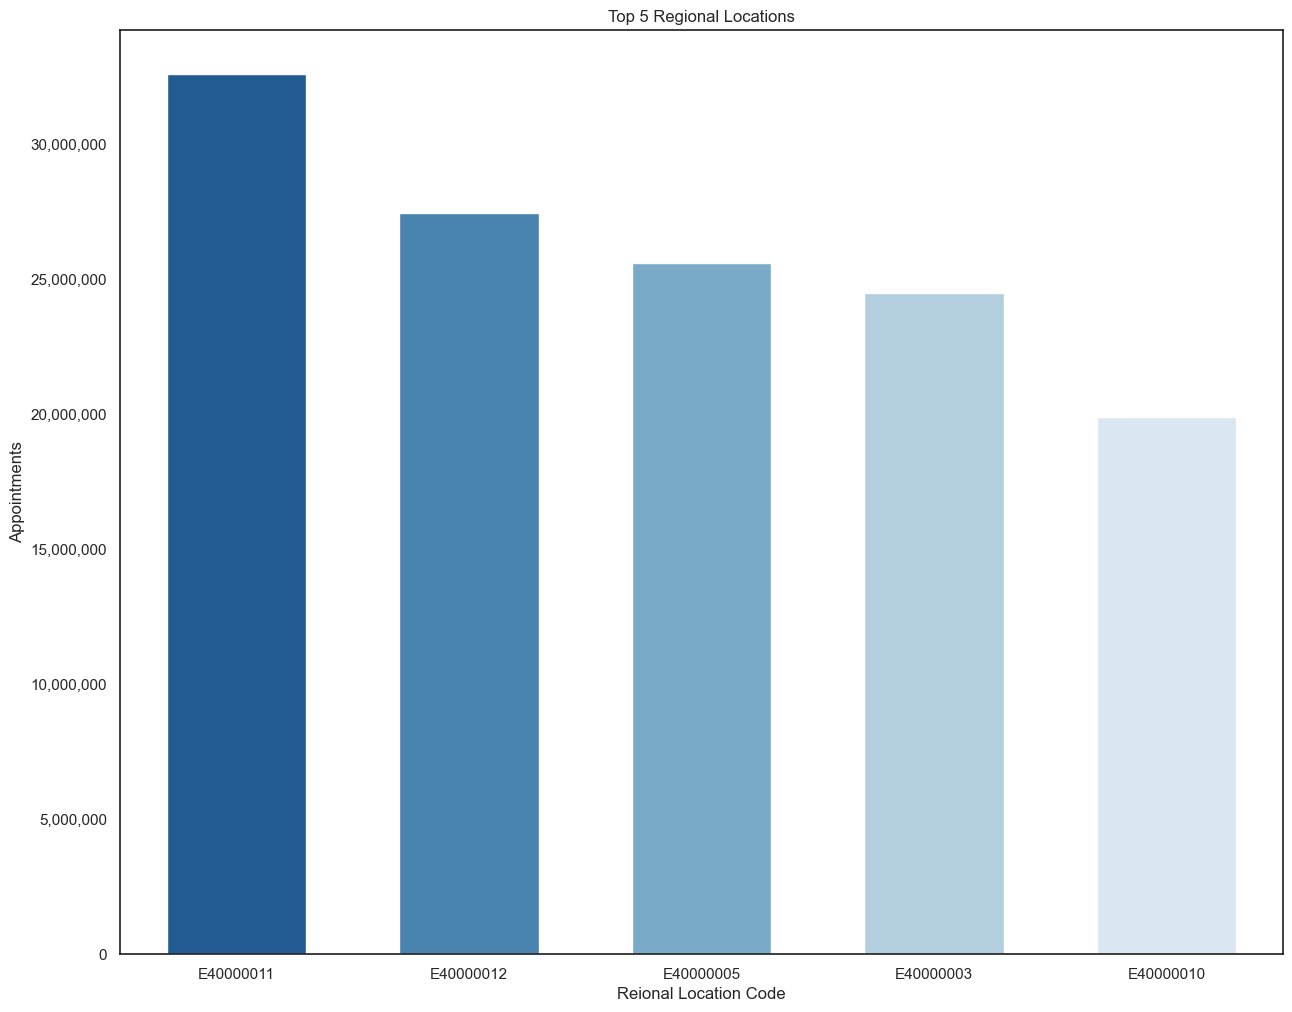

In [31]:
# Bar plot for the top 5 regions.

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="region_ons_code", y='count_of_appointments', 
             data=regions.head(), palette="Blues_r", width=0.6 )

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Top 5 Regional Locations")
ax.set_xlabel("Reional Location Code")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Top 5 Regional Locations.png')

## 3. Appointment Analysis

## 3.1	Appointments by service settings, context types, national categories. 







Create an nc general dataframe grouping by appointment_month and lineplot to assess the overall trend.

Number of appointment_month:  11


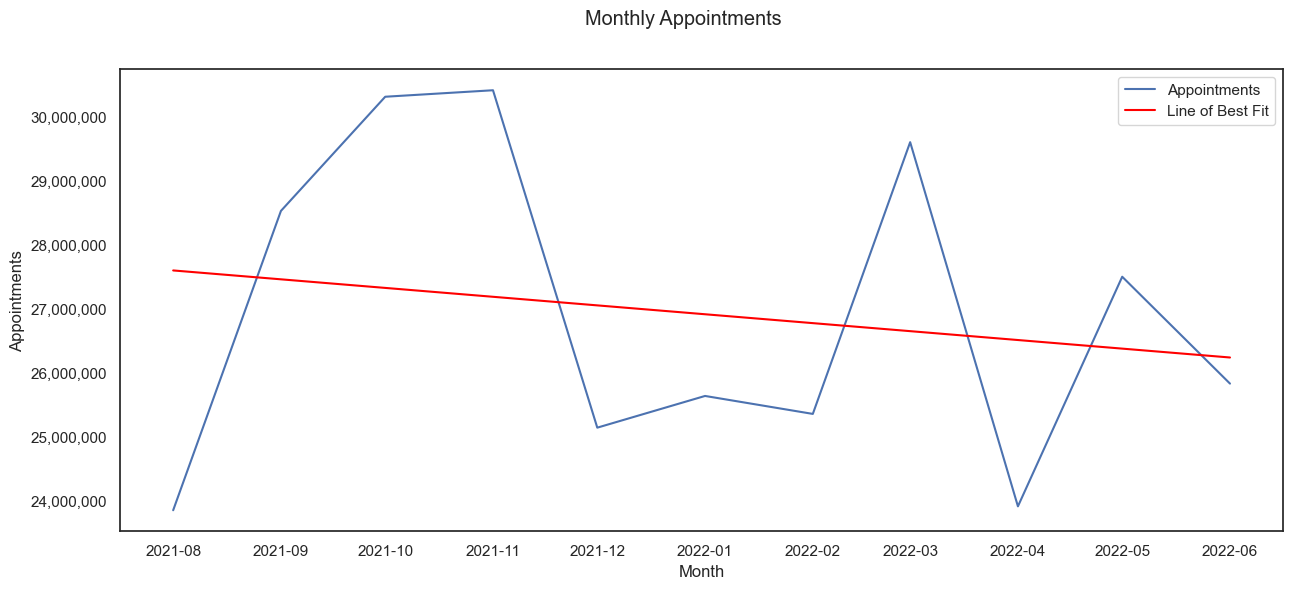

In [32]:
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "nc_general"
from_df_name = "nc"
group_by1 = "appointment_month"
group_by2_option = "n"
group_by2 = None
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "n"
top_5 = "n"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style('white')

# Convert date for later calcualtions
dates = pd.to_datetime(nc_general['appointment_month'])
dates_as_float = date2num(dates)

# Create a vaiable for utilisation 
appointments = nc_general['count_of_appointments']

# Create linear regression 
coefficients = np.polyfit(dates_as_float, appointments, 1)
polynomial = np.poly1d(coefficients)

# Plot monthly capacity, utilisation and line of best fit using Matplotlib
plt.plot(dates, appointments, label='Appointments')
plt.plot(dates, polynomial(dates_as_float), label='Line of Best Fit', color='red')

# Format the axis scale so that they show the full number of appontments.

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Labels and legend
plt.suptitle('Monthly Appointments')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()
# Save
plt.savefig('Monthly Appointments NC General')

- The busiest times of year are October and November.  We see a considerable increase in appointments in the transition to Autumn. There is also a significant increase in appointments in February through March.
- The linear regression line indicates a downtrend in total appointments in the NC dataframe.


### Service Settings
It useful not only to know the number of each of the above, but to also understand how many appointments were recorded for each. Again, the sum_appointments_multi function can be used.

In [33]:
# Create a df nc service_settings grouping by appointment_month and service_setting.
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "nc_ss"
from_df_name = "nc"
group_by1 = "appointment_month"
group_by2_option = "y"
group_by2 = "service_setting"
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "n"
top_5 = "n"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)



Number of appointment_month:  11


appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843
5           2021-09  Extended Access Provision                 187906
6           2021-09           General Practice               25940821
7           2021-09                      Other                 527174
8           2021-09       Primary Care Network                 530485
9           2021-09                   Unmapped                1336115

In [34]:
# Count number of service_settings
ss = nc['service_setting'].nunique()
print(f"Number of service settings: {ss}")

Number of service settings: 5


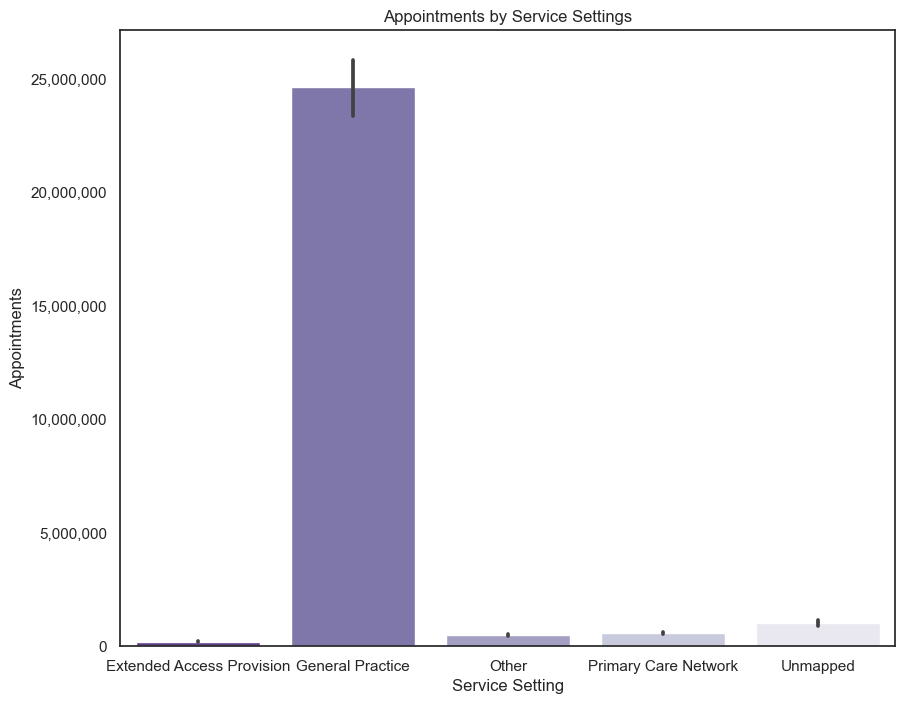

In [35]:
# Bar plot for Service settings by count of appointments.

# Set size and background colour 
sns.set(rc={'figure.figsize':(10, 8)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="service_setting", y='count_of_appointments', 
             data=nc_ss, palette='Purples_r')

# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Service Settings")
ax.set_xlabel("Service Setting")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Appointments by Service Settings.png')

**General Practice forms the vast majority of appointments in terms of Service Settings.**

### Monthly Trends Service Settings

**Exploratory Chart**

<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

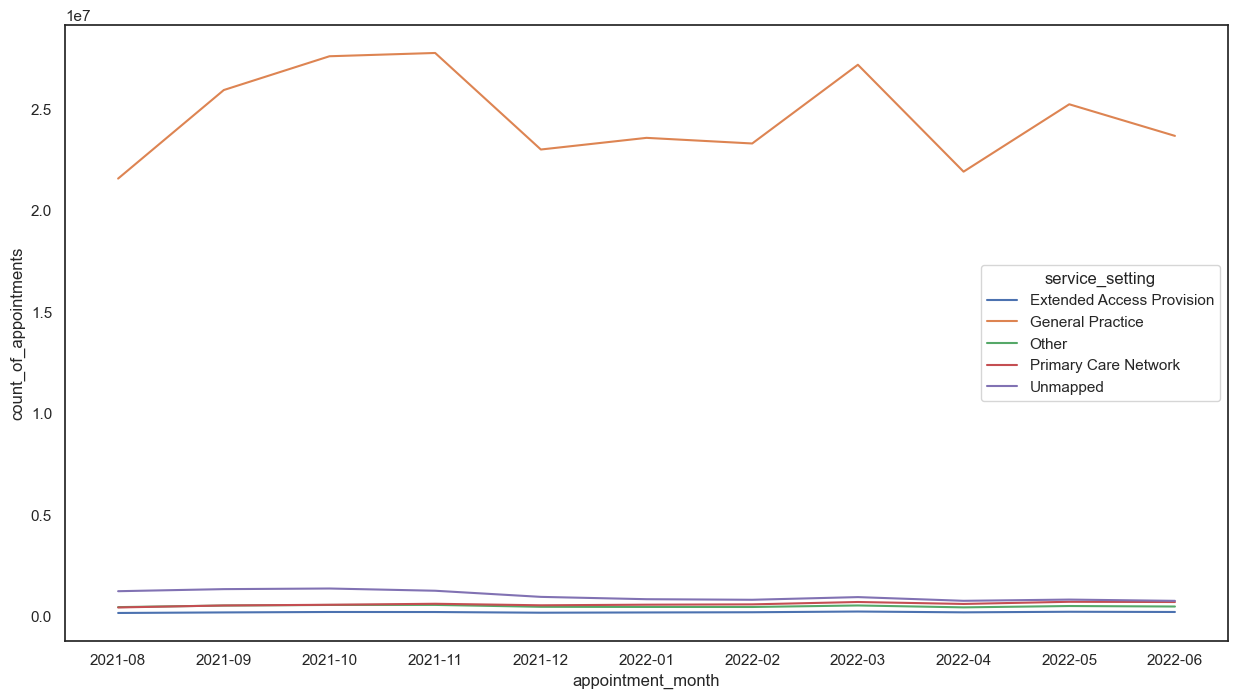

In [36]:
# Create an initial basic lineplot of nc_ss.

# Set basic size and plot style as white.
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot line.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss)

General Practice has a substantially higher number of appointments than the other service settings. I have elected therefore to create a chart with 2 rows. This enables a better visualisation of the other service settings.

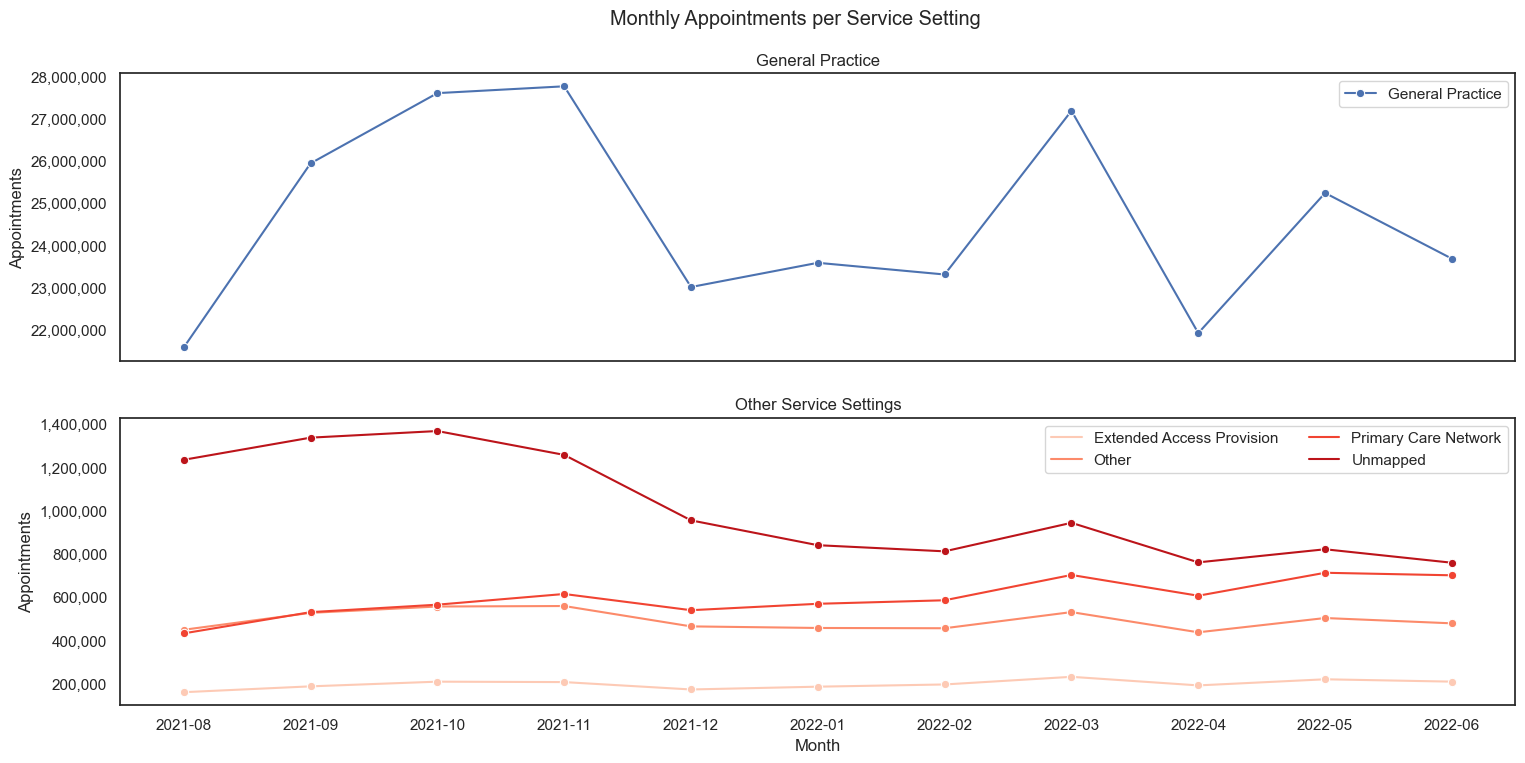

In [37]:
# Create two separate row line plots 
fig, axes = plt.subplots(nrows=2, figsize=(18, 8), sharex=True)

# Plot for the first row
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             data=nc_ss[nc_ss["service_setting"] == "General Practice"], 
             ax=axes[0], errorbar=None, palette='Blues', label="General Practice", marker='o')

axes[0].set_title("General Practice")

# Set the other service settings as all those that aren't general practice.

other_service_settings = nc_ss[nc_ss["service_setting"] != "General Practice"]["service_setting"].unique()

# Plot for the other four service settings
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="service_setting",
             data=nc_ss[nc_ss["service_setting"].isin(other_service_settings)], 
             ax=axes[1], errorbar=None, palette='Reds', marker='o')

axes[1].set_title("Other Service Settings")

# Format the axis scale so that they show the full number of appontments.

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Add titles legends and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Monthly Appointments per Service Setting')
plt.xlabel("Month")
axes[0].set_ylabel("Appointments")
axes[1].set_ylabel("Appointments")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)

# Save the plot
plt.savefig('Monthly Appointments per Service Setting.png')

### How does the spread of service settings compare?

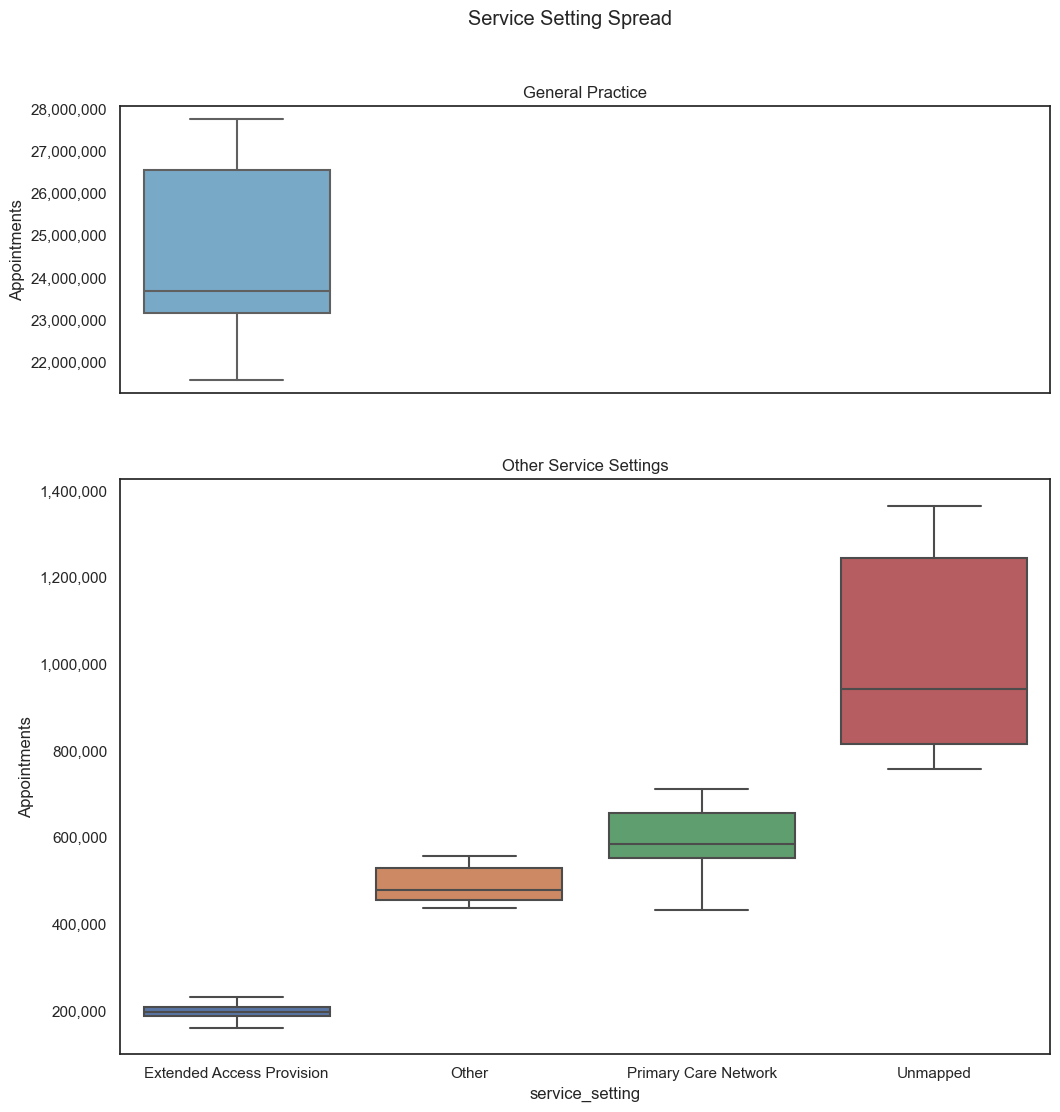

In [38]:
# Create a boxplot to show service settings spread with GP separated.

# Create two separate row box plots. Make the second plot twice as large as the first. 
fig, axes = plt.subplots(nrows=2, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# Plot for the first row
sns.boxplot(x='service_setting', y='count_of_appointments',
             data=nc_ss[nc_ss["service_setting"] == "General Practice"],
             ax=axes[0], palette='Blues')

axes[0].set_title("General Practice")

# Set the other service settings as all those that aren't general practice.

other_service_settings = nc_ss[nc_ss["service_setting"] != "General Practice"]["service_setting"].unique()

# Plot for the other four service settings
sns.boxplot(x='service_setting', y='count_of_appointments',
            data=nc_ss[nc_ss["service_setting"].isin(other_service_settings)])

axes[1].set_title("Other Service Settings")

# Format the axis scale so that they show the full number of appontments.

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Add titles legends and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Service Setting Spread')
axes[0].set_ylabel("Appointments")
axes[1].set_ylabel("Appointments")
axes[0].set_xlabel('')


# Save the plot
plt.savefig('Service Setting Spread.png')

### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

Here we have been asked to find the sum of appointments for a specific location and period. I envisage that this question could be repeated for many different locations and periods. It is therefore expeditious to use a function to allow for further variations of this enquiry.

At this point, the sum_appointments_multi function was updated to include a location filter (location codes available from the index created above) and a date filter.


In [39]:
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "nwl_service_settings"
from_df_name = "nc"
group_by1 = "service_setting"
group_by2_option = "n"
group_by2 = None
location_filter = "y"
location = "E54000027"
date_filter = "y"
start_date = '2022-01-01'
end_date = '2022-06-01'
sort = "y"
top_5 = "n"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

Number of service_setting:  5


service_setting  count_of_appointments
1           General Practice                4804239
4                   Unmapped                 391106
2                      Other                 152897
3       Primary Care Network                 109840
0  Extended Access Provision                  98159

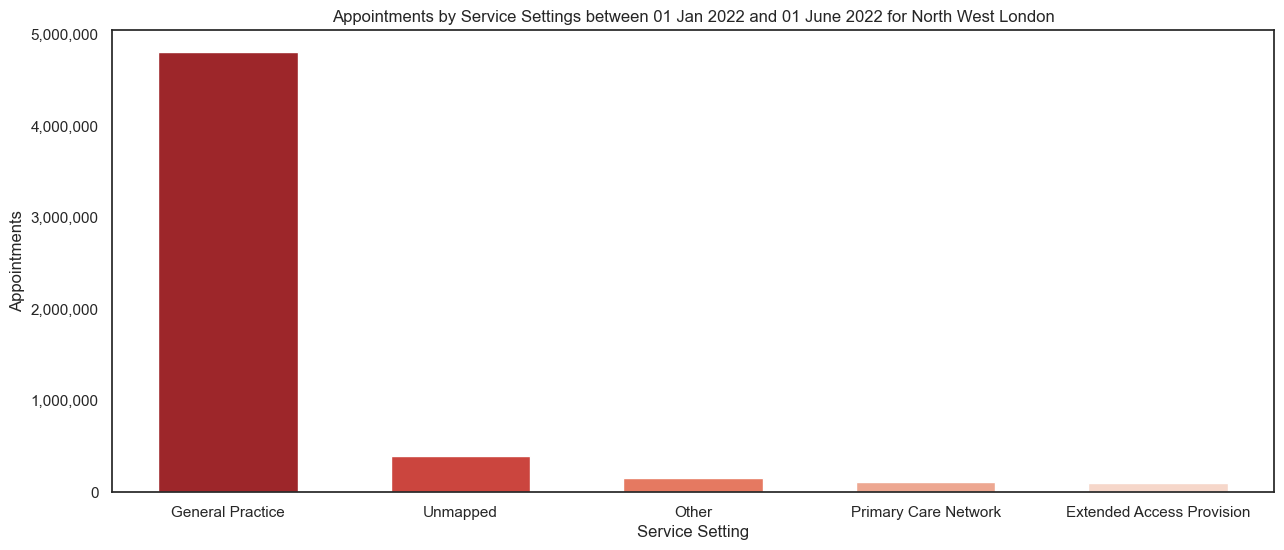

In [40]:
# Bar plot for Service settings in North West London between 01 Jan 2022 and 01 June 2022.

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="service_setting", y='count_of_appointments', 
             data=nwl_service_settings, palette='Reds_r', width=0.6)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Service Settings between 01 Jan 2022 and 01 June 2022 for North West London")
ax.set_xlabel("Service Setting")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Appointments by Service Settings_NWL.png')

### Context Types


In [41]:
# Create a df nc_ct grouping by context_type and appoointment month.
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "nc_ct"
from_df_name = "nc"
group_by1 = "appointment_month"
group_by2_option = "y"
group_by2 = "context_type"
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "n"
top_5 = "n"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)



Number of appointment_month:  11


appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135
5           2021-09                Unmapped                1336115
6           2021-10  Care Related Encounter               26125201
7           2021-10    Inconsistent Mapping                2811977
8           2021-10                Unmapped                1366656
9           2021-11  Care Related Encounter               26282778

In [42]:
# Count number of context types
ct = nc['context_type'].nunique()
print(f"Number of context types: {ct}")

Number of context types: 3


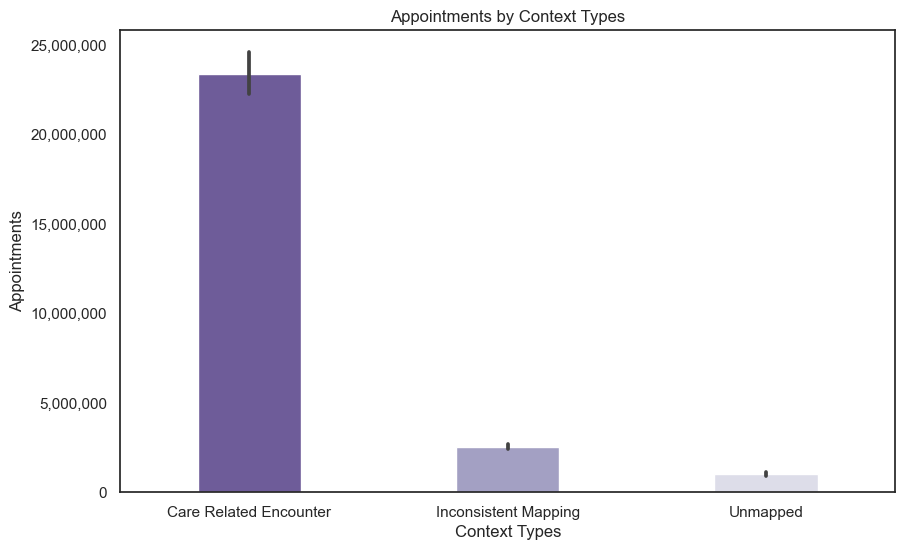

In [43]:
# Bar plot for Context Types.

# Set size and background colour 
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x="context_type", y='count_of_appointments', 
             data=nc_ct, palette='Purples_r', width=0.4)

# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Context Types")
ax.set_xlabel("Context Types")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Appointments by Context Types.png')

**Comment:** The unmapped and inconsistent mapping are somewhat vague.

### Monthly Trends Context Types

I have elected to use the 2 row approach again as the Care Related Encounter context type is significantly in excess of the other context types.


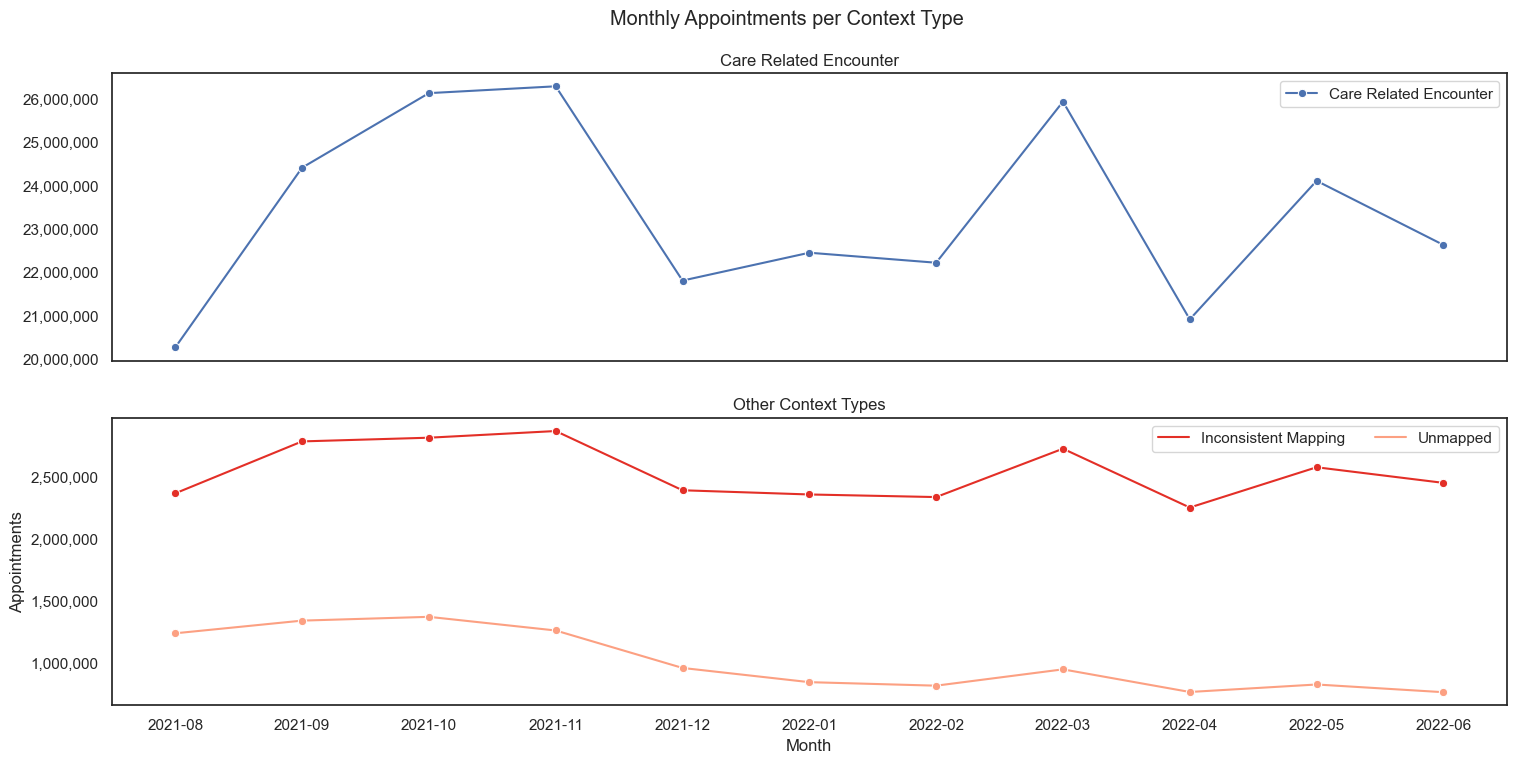

In [44]:
# Create two separate row line plots 
fig, axes = plt.subplots(nrows=2, figsize=(18, 8), sharex=True)

# Plot for the first row
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             data=nc_ct[nc_ct["context_type"] == "Care Related Encounter"], 
             ax=axes[0], ci=None, palette='Reds', label="Care Related Encounter", marker='o')

axes[0].set_title("Care Related Encounter")

# Set the other service settings as all those that aren't Care Related Encounter.

other_context_types = nc_ct[nc_ct["context_type"] != "Care Related Encounter"]["context_type"].unique()

# Plot for the other 2 context types
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="context_type",
             data=nc_ct[nc_ct["context_type"].isin(other_context_types)], 
             ax=axes[1], ci=None, palette='Reds_r', marker='o')

axes[1].set_title("Other Context Types")

# Format the axis scale so that they show the full number of appontments.
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Add titles legends and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Monthly Appointments per Context Type')
plt.xlabel("Month")
axes[0].set_ylabel("Appointments")
axes[1].set_ylabel("Appointments")
axes[0].set_ylabel("")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)

# Save the plot
plt.savefig('Monthly Appointments per Context Type.png')

**In terms of context type, Care related encounters form the vast majority of appointments.**

### National Categories


In [45]:
# Create a new df nc_nc, grouped by appointment_month and national_category using the sum_appointments_multi function

new_df_name = 'nc_nc'
from_df_name = 'nc'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'national_category'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)



Number of appointment_month:  11


appointment_month                                  national_category  \
0           2021-08  Care Home Needs Assessment & Personalised Care...   
1           2021-08                                    Care Home Visit   
2           2021-08                                    Clinical Triage   
3           2021-08                         General Consultation Acute   
4           2021-08                       General Consultation Routine   
5           2021-08             Group Consultation and Group Education   
6           2021-08                                         Home Visit   
7           2021-08                               Inconsistent Mapping   
8           2021-08                    Non-contractual chargeable work   
9           2021-08             Patient contact during Care Home Round   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045  
5                   5161  
6                 165061  
7                2363093  
8                  10775  
9                  31316

In [46]:
# Count number of national categories
ncs = nc['national_category'].nunique()
print(f"Number of national categories: {ncs}")

Number of national categories: 18


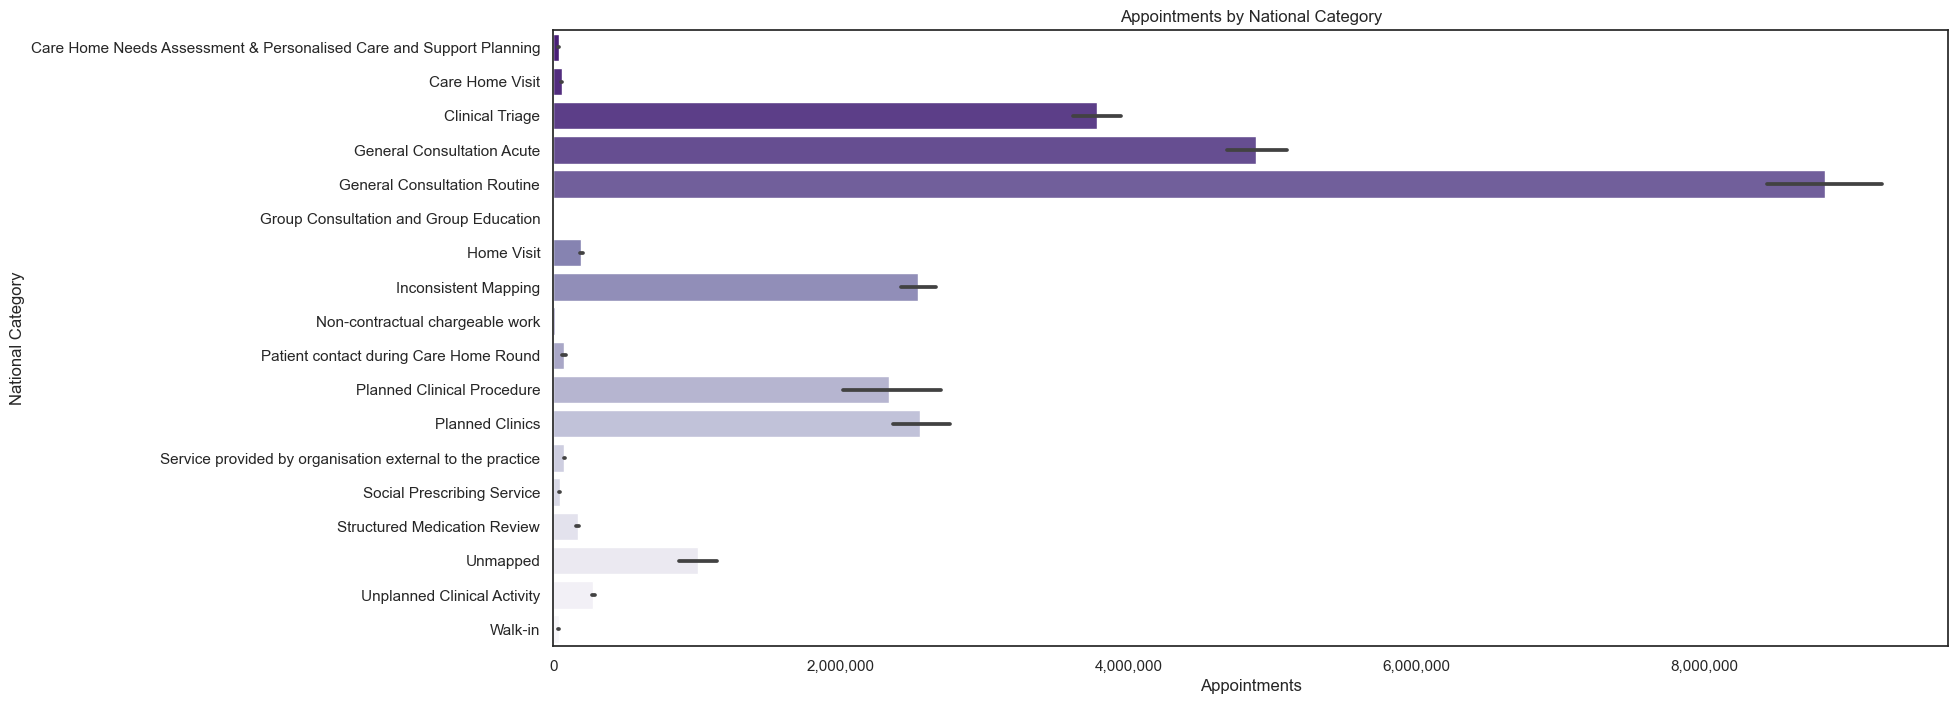

In [47]:
# Bar plot for National Categories. Display only top 7.

# Set size and background colour 
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='count_of_appointments', y='national_category', 
             data=nc_nc, palette='Purples_r')

# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.xaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by National Category")
ax.set_ylabel("National Category")
ax.set_xlabel("Appointments")

# Save the plot
plt.savefig('Appointments by National Category.png')

**General Consulation routine forms the vast majority of appointments in terms of National Categories.**

### Monthly Trends National Categories

There are 18 national categories. They differ widely in the number of appointments. I have created 4 tiers based on the count_of_appointments so that each national category can be better visualised. 



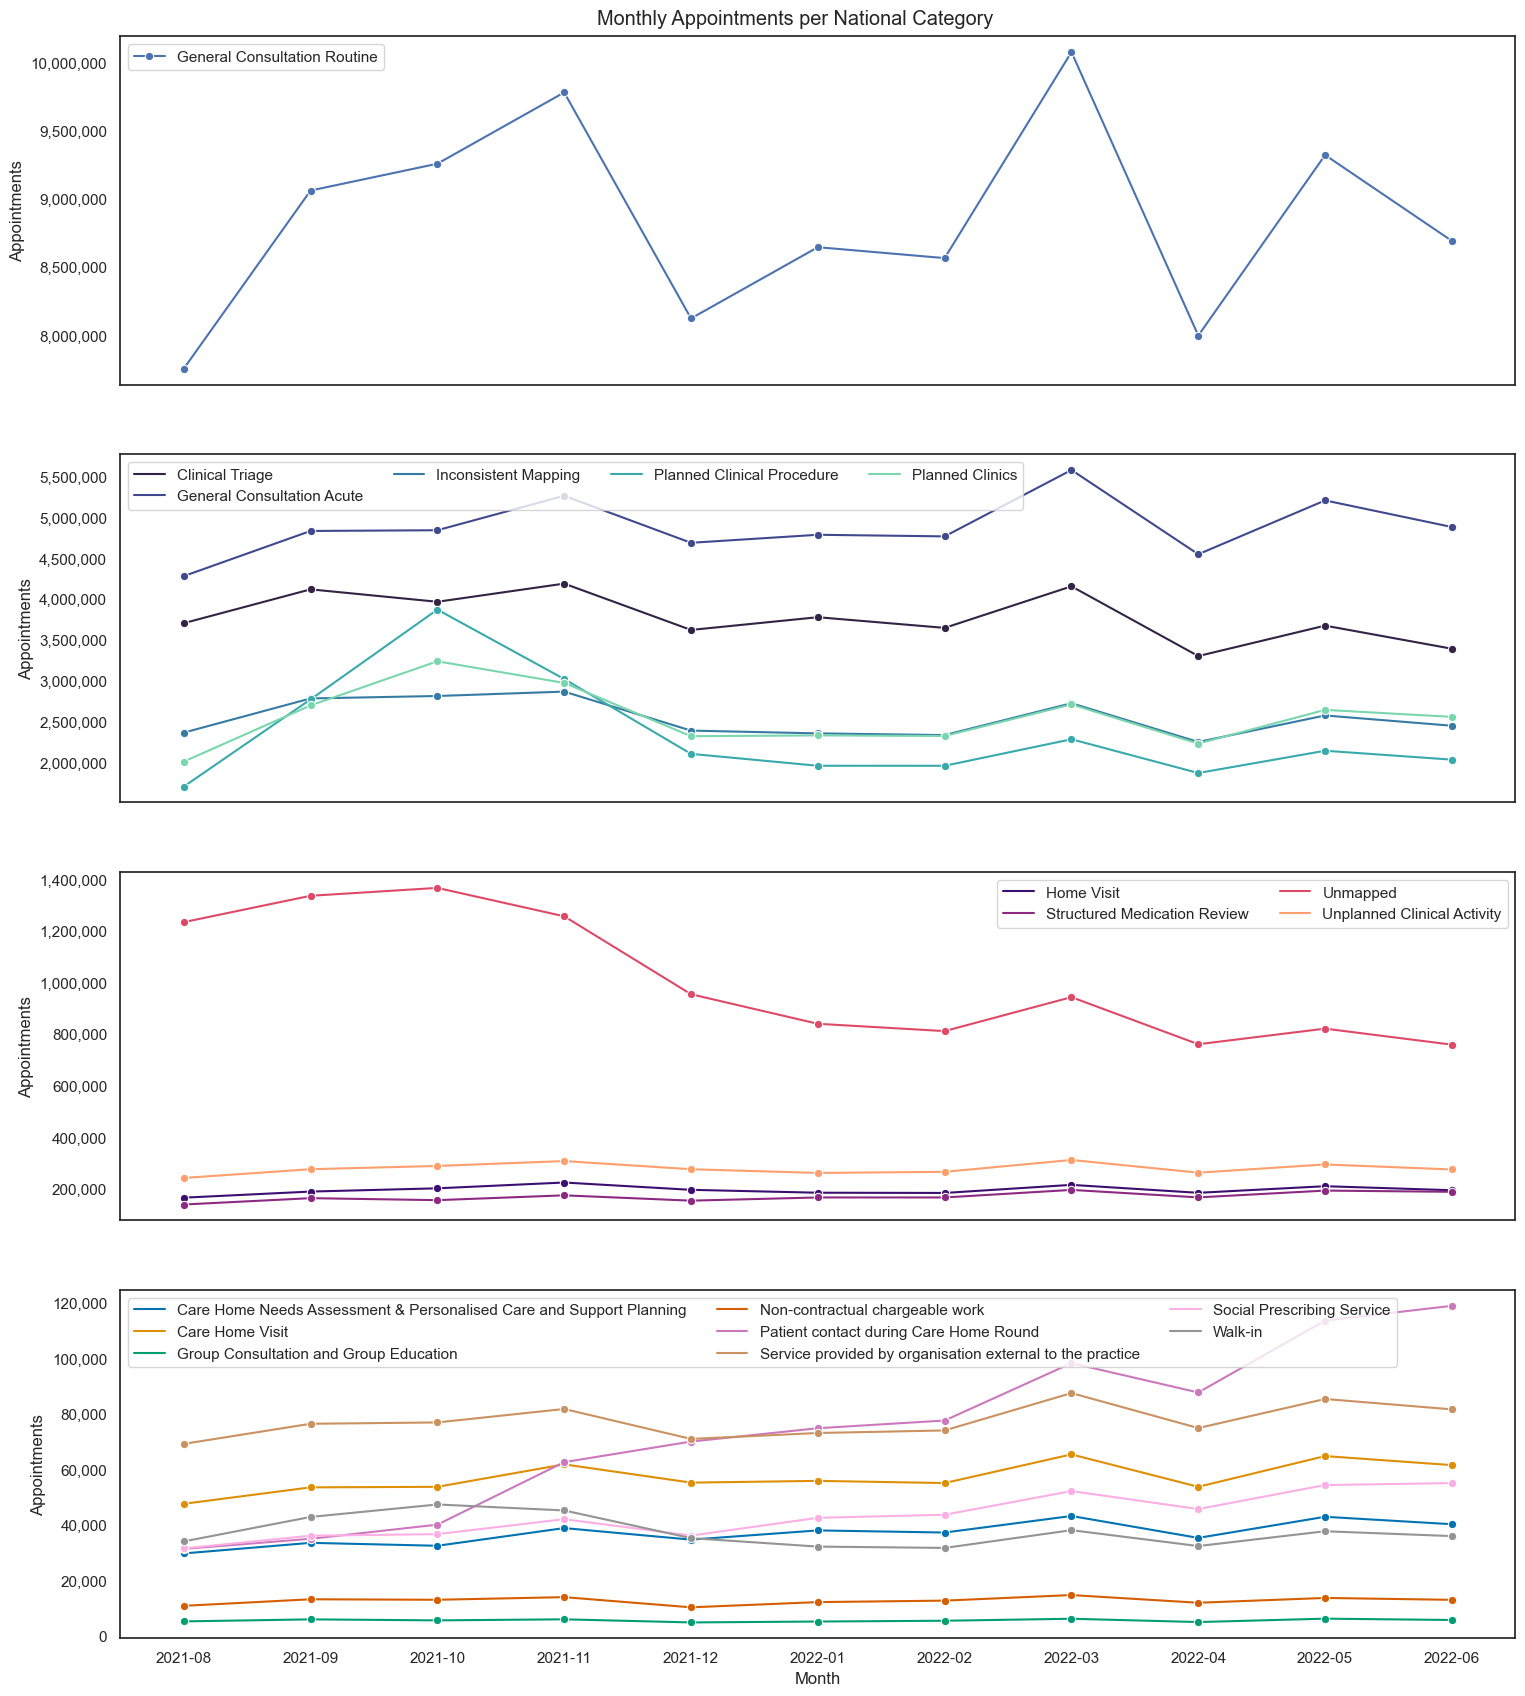

In [48]:
# Create 3 categories based on sum of appointments in the dataframe.(General Consultation Routine has it's own tier)

nc_nc_sums = nc_nc.groupby('national_category')['count_of_appointments'].sum()

tier_2 = nc_nc_sums[(nc_nc_sums > 20000000) & (nc_nc_sums < 55000000)].index.tolist()
tier_3 = nc_nc_sums[(nc_nc_sums > 1000000) & (nc_nc_sums < 20000000)].index.tolist()
tier_4 = nc_nc_sums[nc_nc_sums < 1000000].index.tolist()

# Create 4 separate row line plots 
fig, axes = plt.subplots(nrows=4, figsize=(18,18), sharex=True)

# First row plot
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             data=nc_nc[nc_nc["national_category"] == "General Consultation Routine"], 
             ax=axes[0], ci=None, palette='Blues', 
             label="General Consultation Routine", marker='o')

# Second row plot

sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="national_category",
             data=nc_nc[nc_nc["national_category"].isin(tier_2)], 
             ax=axes[1], ci=None, palette="mako", marker='o')

# 3rd Row plot

sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="national_category",
             data=nc_nc[nc_nc["national_category"].isin(tier_3)], 
             ax=axes[2], ci=None, palette="magma", marker='o')

# 4th Row plot

sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="national_category",
             data=nc_nc[nc_nc["national_category"].isin(tier_4)], 
             ax=axes[3], ci=None, palette="colorblind", marker='o')

# Format the axis scale so that they show the full number of appontments.

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)

# Add titles legends and labels
plt.subplots_adjust(top=1)
plt.suptitle('Monthly Appointments per National Category', y=1.015)
plt.xlabel("Month")
axes[0].set_ylabel("Appointments")
axes[1].set_ylabel("Appointments")
axes[2].set_ylabel("Appointments")
axes[3].set_ylabel("Appointments")
axes[0].legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
axes[1].legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=4)
axes[2].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)
axes[3].legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=3)

# Save the plot
plt.savefig('Monthly Appointments per National Category.png')

### Seasonal Trends for Service Settings, Context Types and National Categories

The data only spans 11 months. It is therefore impossible to analyse for seasonal variations as we have no previous years to compare to. Similarly, the data in nc does not cover the summer season (data starts in August 2021 and ends June 2022). The following aggregates summer months together despite being in different years.

We can compare the seasons in the data set with each other. However, analysing on a monthly basis does not provide sufficient granularity for a line plot.

In [49]:
# Create a function that allocates a season depending on the month.

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'


**Seasonal Service Settings**

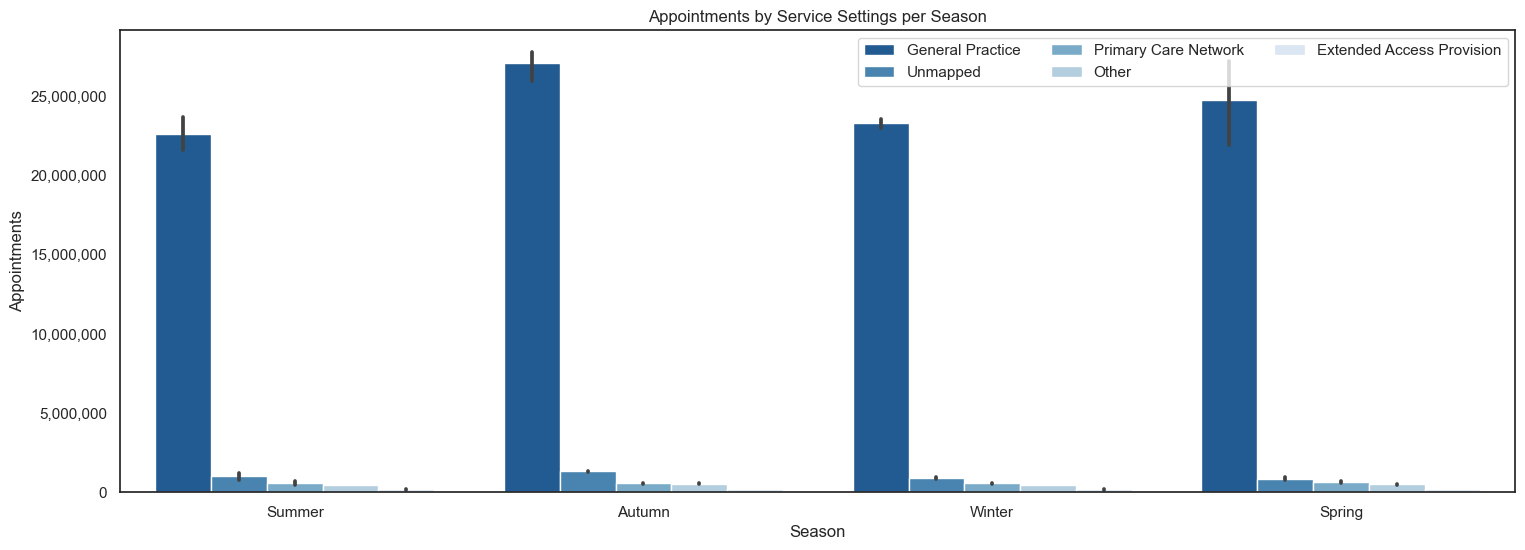

In [50]:
#Create a month column for nc_ss

nc_ss['month'] = pd.to_datetime(nc_ss['appointment_month']).dt.month
   
# Add season column to nc_ss

nc_ss['season'] = nc_ss['month'].apply(get_season)   

# Sort by count of appointments whilst maintaining the order of seasons.
season_order = nc_ss['season'].unique()
nc_ss = nc_ss.sort_values(by='count_of_appointments', ascending=False)

# Bar plot for Seasonal Service settings.

# Set size and background colour 
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='season', y='count_of_appointments', hue='service_setting', 
             data=nc_ss, palette='Blues_r', order=season_order)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Service Settings per Season")
ax.set_xlabel("Season")
ax.set_ylabel("Appointments")
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3)

# Save the plot
plt.savefig('Appointments by Service Settings per Season.png')

**Seasonal context_type**

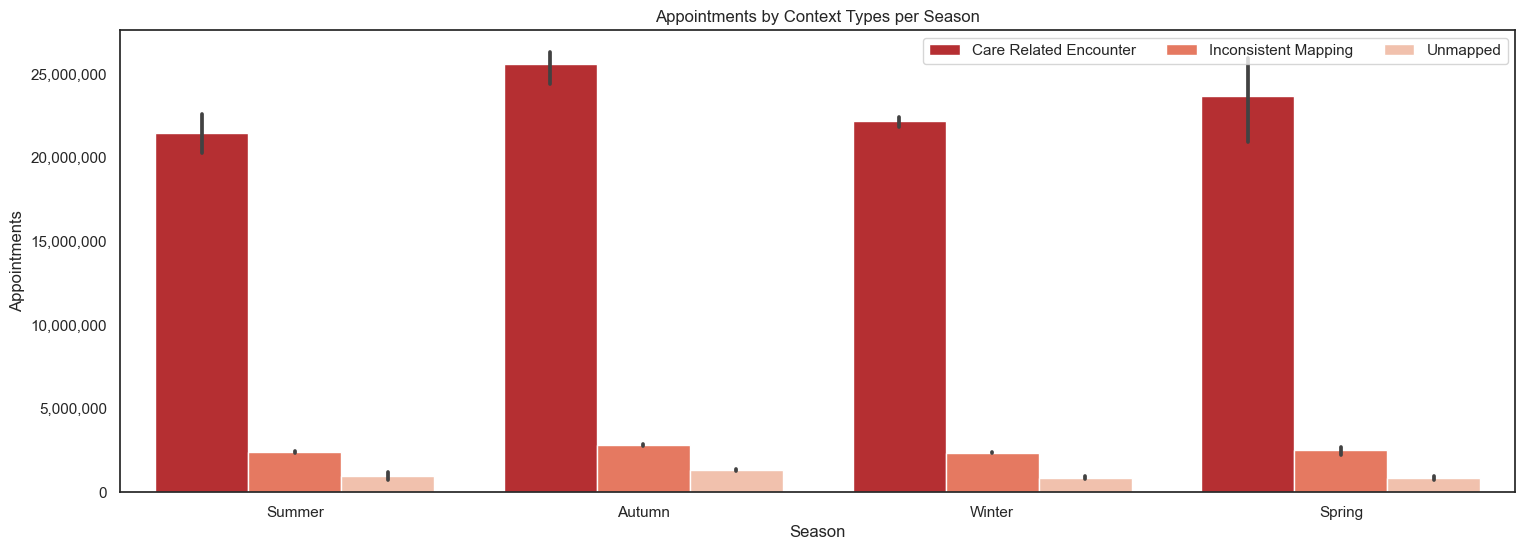

In [51]:
#Create a month column for nc_ct

nc_ct['month'] = pd.to_datetime(nc_ct['appointment_month']).dt.month
   
# Add season column to nc_ct

nc_ct['season'] = nc_ct['month'].apply(get_season)   

# Sort by count of appointments whilst maintaining the order of seasons.
season_order = nc_ct['season'].unique()

nc_ct = nc_ct.sort_values(by='count_of_appointments', ascending=False)

# Bar plot for Seasonal Service settings.

# Set size and background colour 
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='season', y='count_of_appointments', hue='context_type', 
             data=nc_ct, palette='Reds_r', order=season_order)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Context Types per Season")
ax.set_xlabel("Season")
ax.set_ylabel("Appointments")
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3)

# Save the plot
plt.savefig('Appointments by Context Types per Season.png')

**Seasonal National Category**

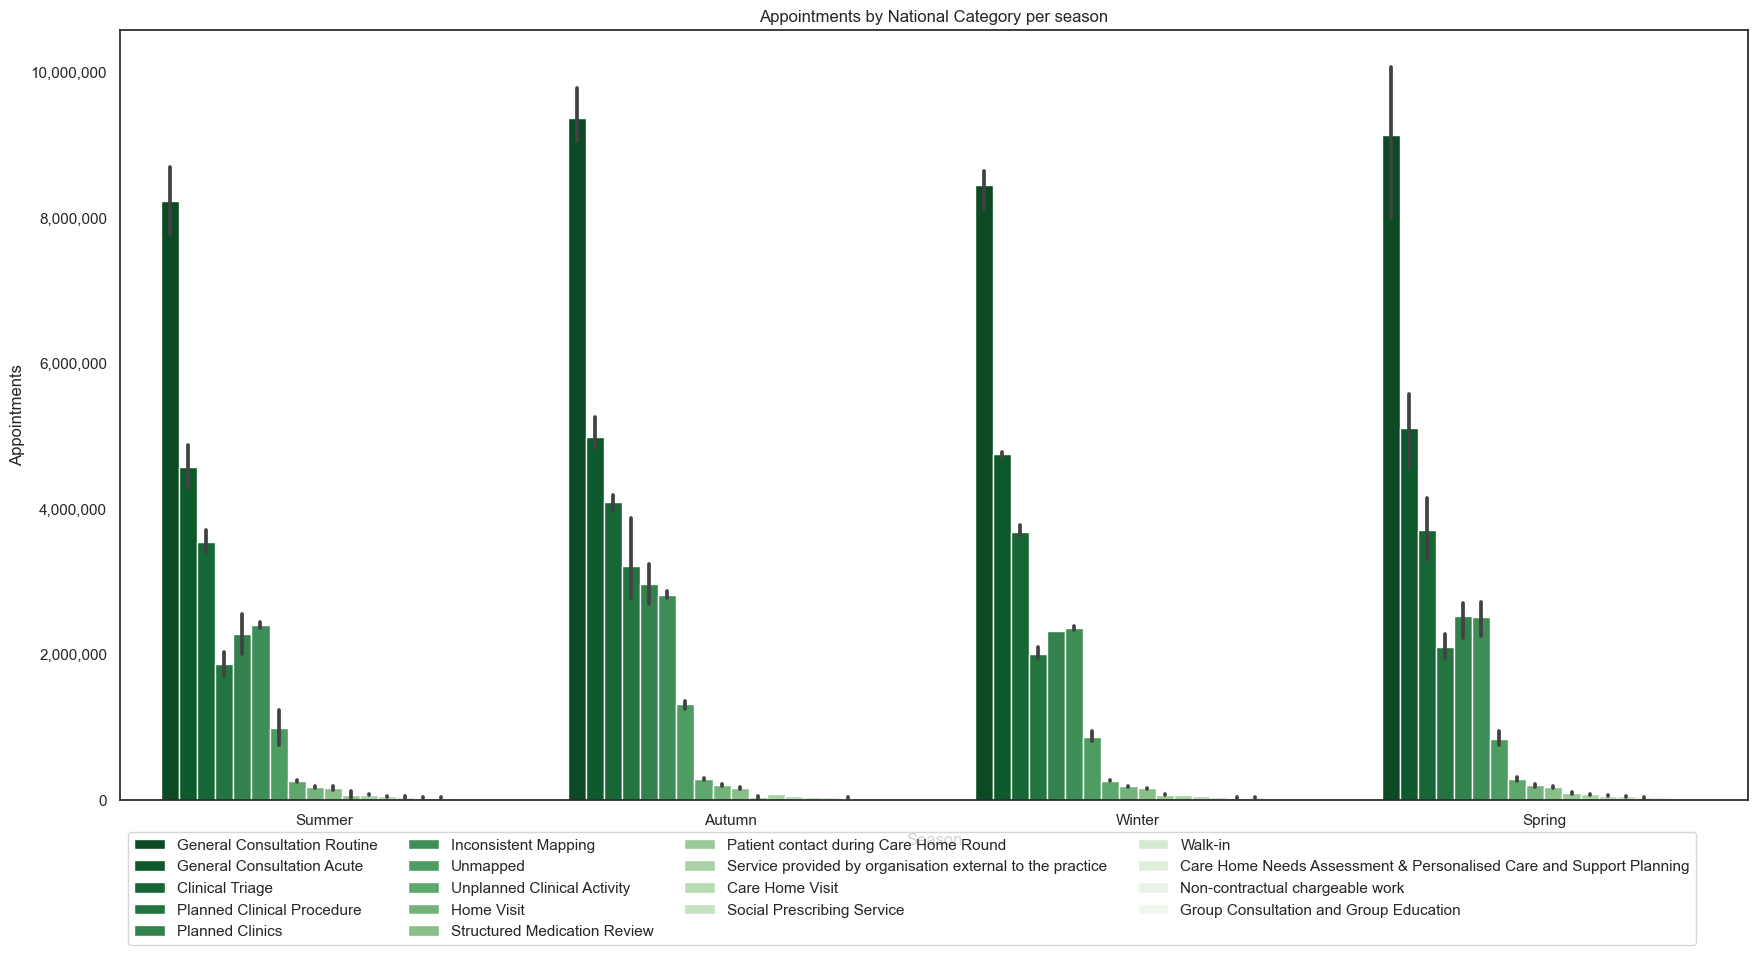

In [52]:
#Create a month column for nc_nc

nc_nc['month'] = pd.to_datetime(nc_nc['appointment_month']).dt.month

# Add season column to nc_ct

nc_nc['season'] = nc_nc['month'].apply(get_season)   

# Sort by count of appointments whilst maintaining the order of seasons.
season_order = nc_nc['season'].unique()

nc_nc = nc_nc.sort_values(by='count_of_appointments', ascending=False)


# Bar plot for Seasonal Service settings.

# Set size and background colour 
sns.set(rc={'figure.figsize':(21, 10)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='season', y='count_of_appointments', hue='national_category', 
             data=nc_nc, palette='Greens_r', order=season_order)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by National Category per season")
ax.set_xlabel("Season")
ax.set_ylabel("Appointments")
ax.legend(loc='center left', bbox_to_anchor=(0, -0.115), ncol=4)

# Save the plot
plt.savefig('Appointments by National Category per season.png')

## 3.2 	Appointments by HCP type and Mode

### How do the healthcare professional types differ over time?

In [53]:
# Create a new df ar_hcp, grouped by appointment_month and hcp_type using the sum_appointments_multi function

new_df_name = 'ar_hcp'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'hcp_type'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_month:  30


appointment_month              hcp_type  count_of_appointments
0           2020-01                    GP               14168932
1           2020-01  Other Practice staff               12326031
2           2020-01               Unknown                 704333
3           2020-02                    GP               12467976
4           2020-02  Other Practice staff               11002550
5           2020-02               Unknown                 634095
6           2020-03                    GP               12839993
7           2020-03  Other Practice staff               10498713
8           2020-03               Unknown                 714762
9           2020-04                    GP                8795939

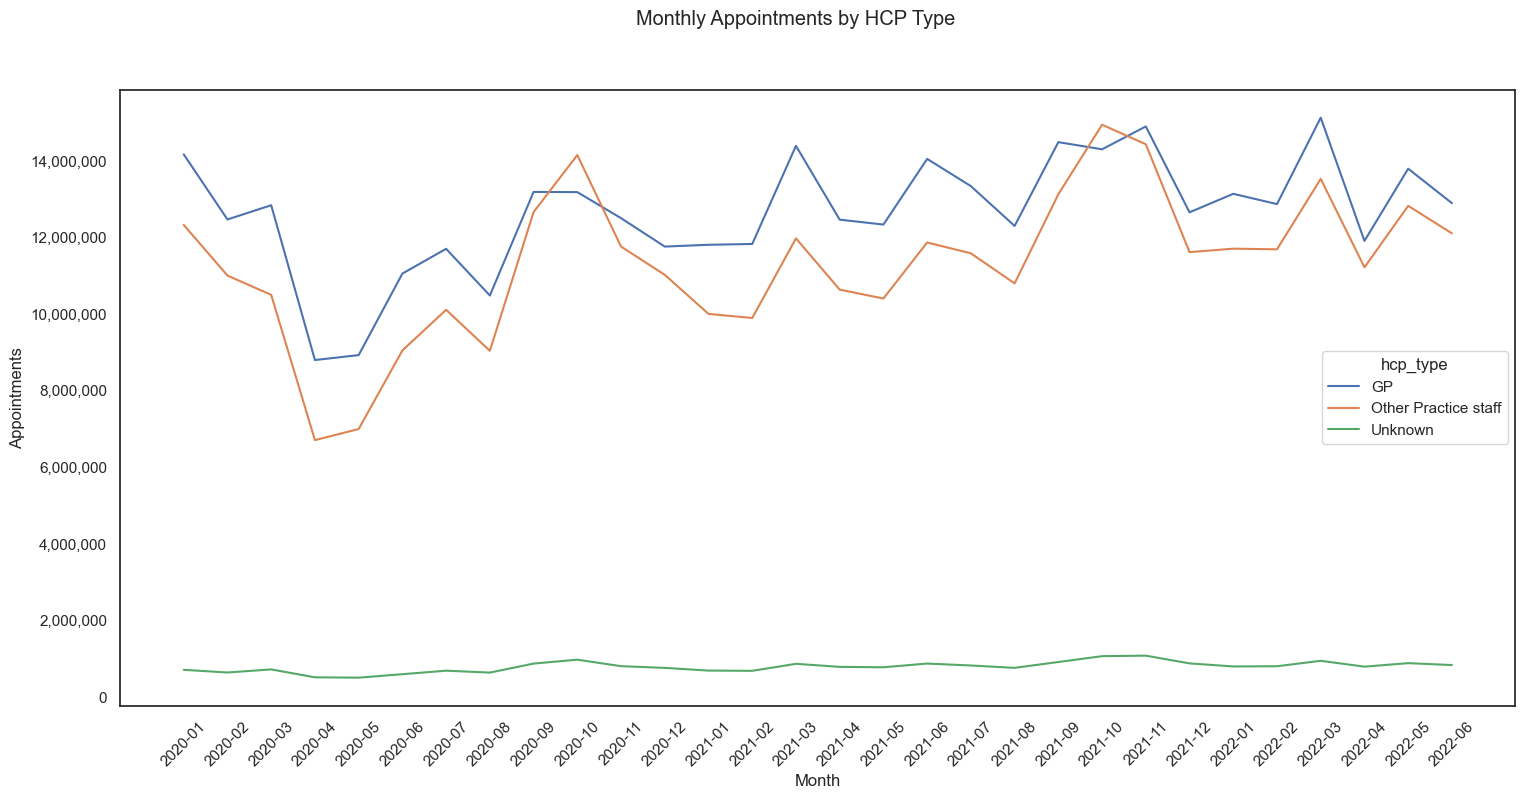

In [54]:
# Plot sum of count of monthly visits.
# Set the styling
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_style('white')

ax = sns.lineplot(x='appointment_month', y= 'count_of_appointments', hue='hcp_type', data=ar_hcp)

# Format axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
# Labels
plt.suptitle('Monthly Appointments by HCP Type')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.savefig('Monthly Appointments by HCP Type.png')

HCP types are broadly in line with total appointments, peaking in Autumn and late winter / early spring. Generally, GP appointments exceed other practice staff. In the early autumn, other practice appointments overtake GP appointments as the primary HCP type appointment.

###  Are there changes in terms of appointment mode and the busiest months?

In [55]:
# Create a new df ar_mode, grouped by appointment_month and hcp_type using the sum_appointments_multi function

new_df_name = 'ar_mode'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'appointment_mode'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_month:  30


appointment_month appointment_mode  count_of_appointments
0           2020-01     Face-to-Face               21733394
1           2020-01       Home Visit                 266942
2           2020-01        Telephone                3701775
3           2020-01          Unknown                1302979
4           2020-01     Video/Online                 194206
5           2020-02     Face-to-Face               19230573
6           2020-02       Home Visit                 227935
7           2020-02        Telephone                3322242
8           2020-02          Unknown                1151233
9           2020-02     Video/Online                 172638

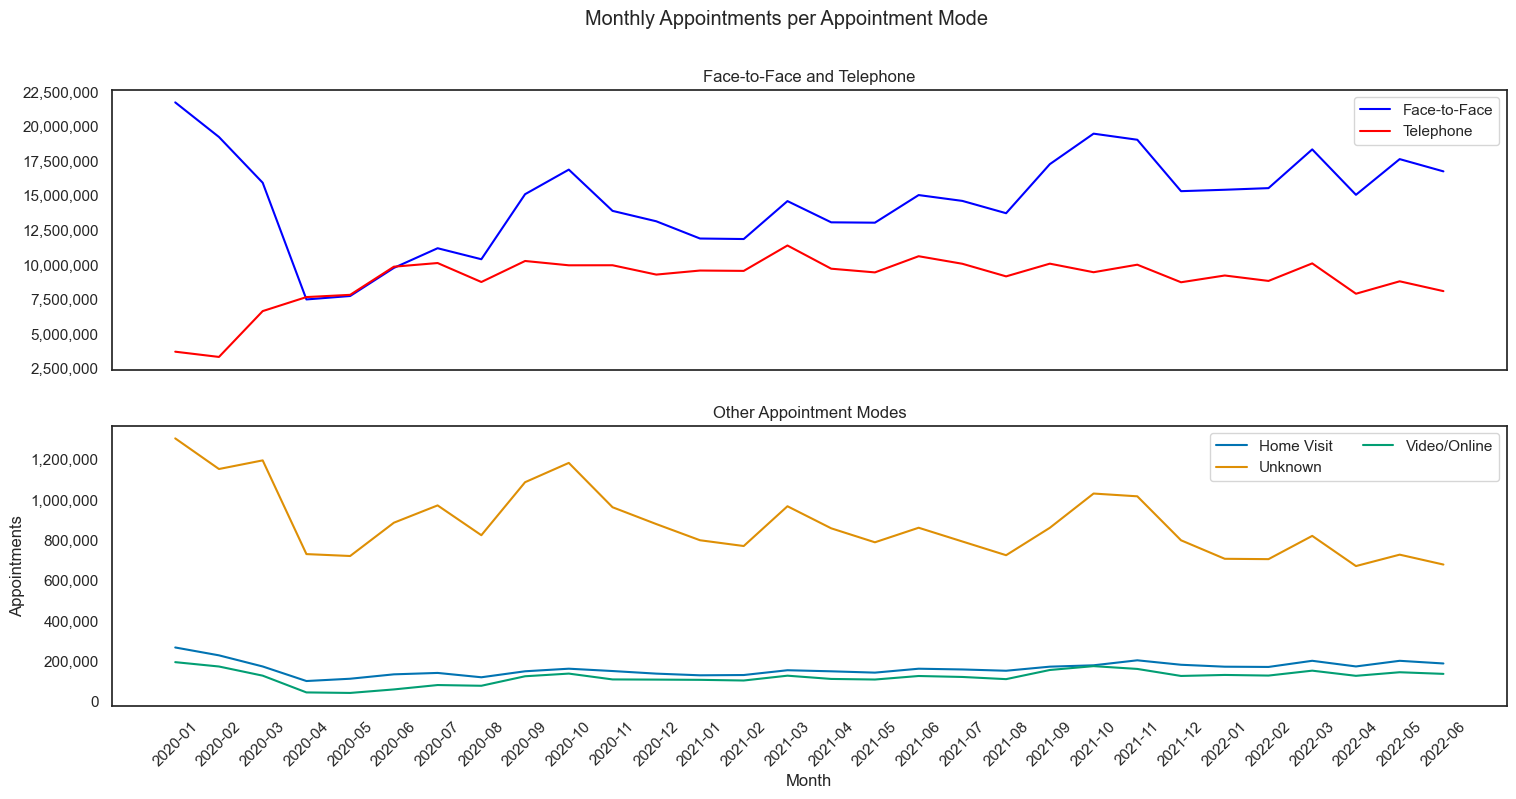

In [56]:
# Create two separate row line plots 
fig, axes = plt.subplots(nrows=2, figsize=(18, 8), sharex=True)

# Plot for the first row
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             data=ar_mode[(ar_mode["appointment_mode"] == "Face-to-Face")], 
             ax=axes[0], errorbar=None, color='blue', label="Face-to-Face")

axes[0].set_title("Face-to-Face and Telephone")

sns.lineplot(x="appointment_month", y='count_of_appointments', 
             data=ar_mode[(ar_mode["appointment_mode"] == "Telephone")], 
             ax=axes[0], errorbar=None, color='red', label="Telephone")

# Set the other appointment modes.

other_modes = ar_mode[(ar_mode["appointment_mode"] != "Face-to-Face") & 
                      (ar_mode["appointment_mode"] != "Telephone")]["appointment_mode"].unique()

# Plot for the other modes
sns.lineplot(x="appointment_month", y='count_of_appointments', 
             hue="appointment_mode",
             data=ar_mode[ar_mode["appointment_mode"].isin(other_modes)], 
             ax=axes[1], ci=None, palette='colorblind')

axes[1].set_title("Other Appointment Modes")

# Format the axis scale so that they show the full number of appontments.

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)

# Add titles legends and labels
plt.suptitle('Monthly Appointments per Appointment Mode')
plt.xlabel("Month")
axes[0].set_ylabel("Appointments")
axes[1].set_ylabel("Appointments")
axes[0].set_ylabel("")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)

# Save the plot
plt.savefig('Monthly Appointments per Appointment Mode.png')

In general, face-to-face appointments exceed all other appointment modes. At the beginning of the dataset, there was a marked decrease in face-to-face appointments and a corresponding increase in telephone appointments, perhaps due to the pandemic. Since mid February 2021, telephone appointments have steadily decreased diverging from the steadily increasing face-to-face appointments. Home visits and video/online appointments remain low and steady.

## 3.3 Total Appointments

Appointment_month columns were previously created so that monthly aggregates can be obtained. 

### Which month had the highest number of Appointments?

In [57]:
# Create a new df nc_monthly grouped by appointment month select 'y' to sort and 'y' to top 5.
# Input required parameters and call the sum_appointments_multi function.

new_df_name = 'nc_monthly'
from_df_name = 'nc'
group_by1 = 'appointment_month'
group_by2_option = 'n'
group_by2 = None
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
# Sort nc_monthly by count_of_appointments
sort = 'y'
top_5 = 'y'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_month:  11


appointment_month  count_of_appointments
3           2021-11               30405070
2           2021-10               30303834
7           2022-03               29595038
1           2021-09               28522501
9           2022-05               27495508

The month with the highest number of appointments was November 2021

### What was the total number of appointments per month for each dataset?

Group each dataframe by monthly appointments, merge and compare the values.

In [58]:
# Group ar by appointment_month, maintain order of occurrence by not selecting sort.

new_df_name = 'ar_monthly'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'n'
group_by2 = None
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

# Group nc by appointment_month, maintain order of occurrence by not selecting sort.

new_df_name = 'nc_monthly'
from_df_name = 'nc'
group_by1 = 'appointment_month'
group_by2_option = 'n'
group_by2 = None
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

# Group ad by appointment_month, maintain order of occurrence by not selecting sort.

new_df_name = 'ad_monthly'
from_df_name = 'ad'
group_by1 = 'appointment_month'
group_by2_option = 'n'
group_by2 = None
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

# Merge and compare similar dates.

monthly_merge = pd.merge(ar_monthly, nc_monthly, on='appointment_month', how='left')
monthly_merge = pd.merge(monthly_merge, ad_monthly, on='appointment_month', how='left')

# Change column names
monthly_merge.columns = ['appointment_month', 'ar_appointments', 'nc_appointments', 'ad_appointments']
monthly_merge

Number of appointment_month:  30
Number of appointment_month:  11
Number of appointment_month:  7


appointment_month  ar_appointments  nc_appointments  ad_appointments
0            2020-01         27199296              NaN              NaN
1            2020-02         24104621              NaN              NaN
2            2020-03         24053468              NaN              NaN
3            2020-04         16007881              NaN              NaN
4            2020-05         16417212              NaN              NaN
5            2020-06         20690805              NaN              NaN
6            2020-07         22491437              NaN              NaN
7            2020-08         20150520              NaN              NaN
8            2020-09         26714255              NaN              NaN
9            2020-10         28301932              NaN              NaN
10           2020-11         25061602              NaN              NaN
11           2020-12         23535936              NaN              NaN
12           2021-01         22492069              NaN              NaN
13           2021-02         22399569              NaN              NaN
14           2021-03         27225424              NaN              NaN
15           2021-04         23879932              NaN              NaN
16           2021-05         23508395              NaN              NaN
17           2021-06         26784182              NaN              NaN
18           2021-07         25739219              NaN              NaN
19           2021-08         23852171       23852171.0              NaN
20           2021-09         28522501       28522501.0              NaN
21           2021-10         30303834       30303834.0              NaN
22           2021-11         30405070       30405070.0              NaN
23           2021-12         25140776       25140776.0       22853483.0
24           2022-01         25635474       25635474.0       23597196.0
25           2022-02         25355260       25355260.0       23351939.0
26           2022-03         29595038       29595038.0       27170002.0
27           2022-04         23913060       23913060.0       21948814.0
28           2022-05         27495508       27495508.0       25343941.0
29           2022-06         25828078       25828078.0       23715317.0

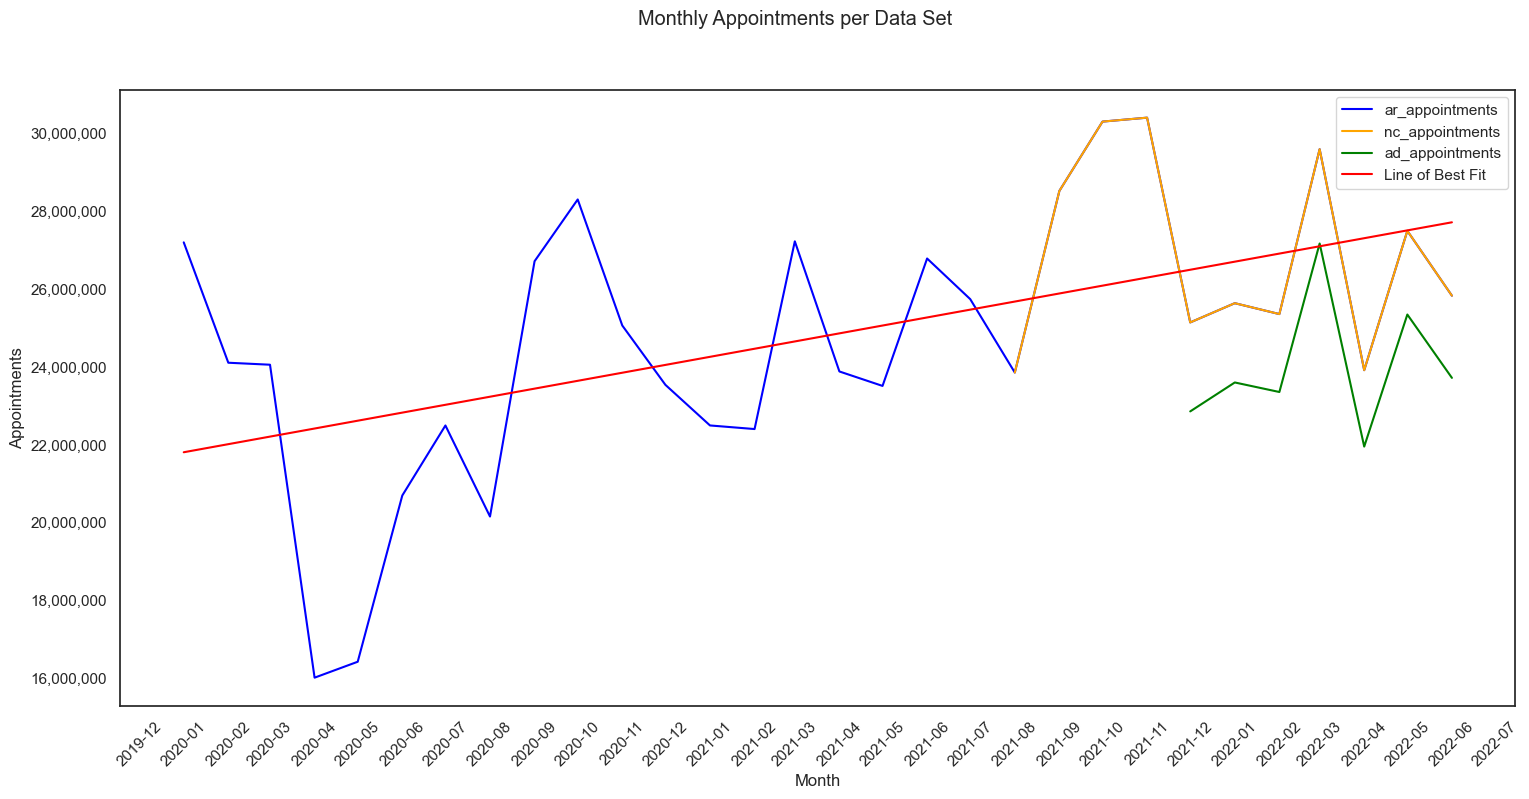

In [59]:
# Lineplot the merged dataframe to display all dfs together. Use linear regression to confirm the uptrend.


#Set style and size
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_style('white')

# Convert appointment month to a float for calcualtions to follow.
dates = pd.to_datetime(monthly_merge['appointment_month'])
dates_as_float = date2num(dates)

# Create a vaiable for ar appointments (as this is the longest dataset) 
appointments = monthly_merge['ar_appointments']

# Create linear regression 
coefficients = np.polyfit(dates_as_float, appointments, 1)
polynomial = np.poly1d(coefficients)

# Plot monthly capacity, utilisation and line of best fit using Matplotlib
plt.plot(dates, appointments, label='ar_appointments', color='blue')
plt.plot(dates, monthly_merge['nc_appointments'], label='nc_appointments', color='orange')
plt.plot(dates, monthly_merge['ad_appointments'], label='ad_appointments', color='green')
plt.plot(dates, polynomial(dates_as_float), label='Line of Best Fit', color='red')

# Format Axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.suptitle('Monthly Appointments per Data Set')
plt.xlabel("Month")
plt.ylabel("Appointments")

# Set x-axis ticks to monthly
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Save the plot
plt.savefig('Monthly Appointments per Data Set.png')


### Insights

- The busiest times of year are October and November.  We see a considerable increase in appointments in the transition to Autumn. There is also a significant increase in appointments in February through March.
- The nc and ad dataframes form only part of a wider uptrend as depicted by the line of best fit.  One might expect October / November 2022 to exceed 30,000,000 per month.
- Missed appointments aren’t included in the actual duration figures. 


## 4. 4.	How effectively is the NHS is Coping with Increasing Utilisation.

### Are there any trends in time between booking an appointment?

New df ar_booking created and exploratory chart plotted.

In [60]:
# Create a new df ar_mode, grouped by appointment_month and hcp_type using the sum_appointments_multi function

new_df_name = 'ar_booking'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'time_between_book_and_appointment'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_month:  30


appointment_month time_between_book_and_appointment  count_of_appointments
0           2020-01                             1 Day                1945711
1           2020-01                    15  to 21 Days                1881819
2           2020-01                       2 to 7 Days                5604909
3           2020-01                    22  to 28 Days                1313557
4           2020-01                     8  to 14 Days                3444637
5           2020-01                 More than 28 Days                1458727
6           2020-01                          Same Day               11541694
7           2020-01            Unknown / Data Quality                   8242
8           2020-02                             1 Day                1666076
9           2020-02                    15  to 21 Days                1917994

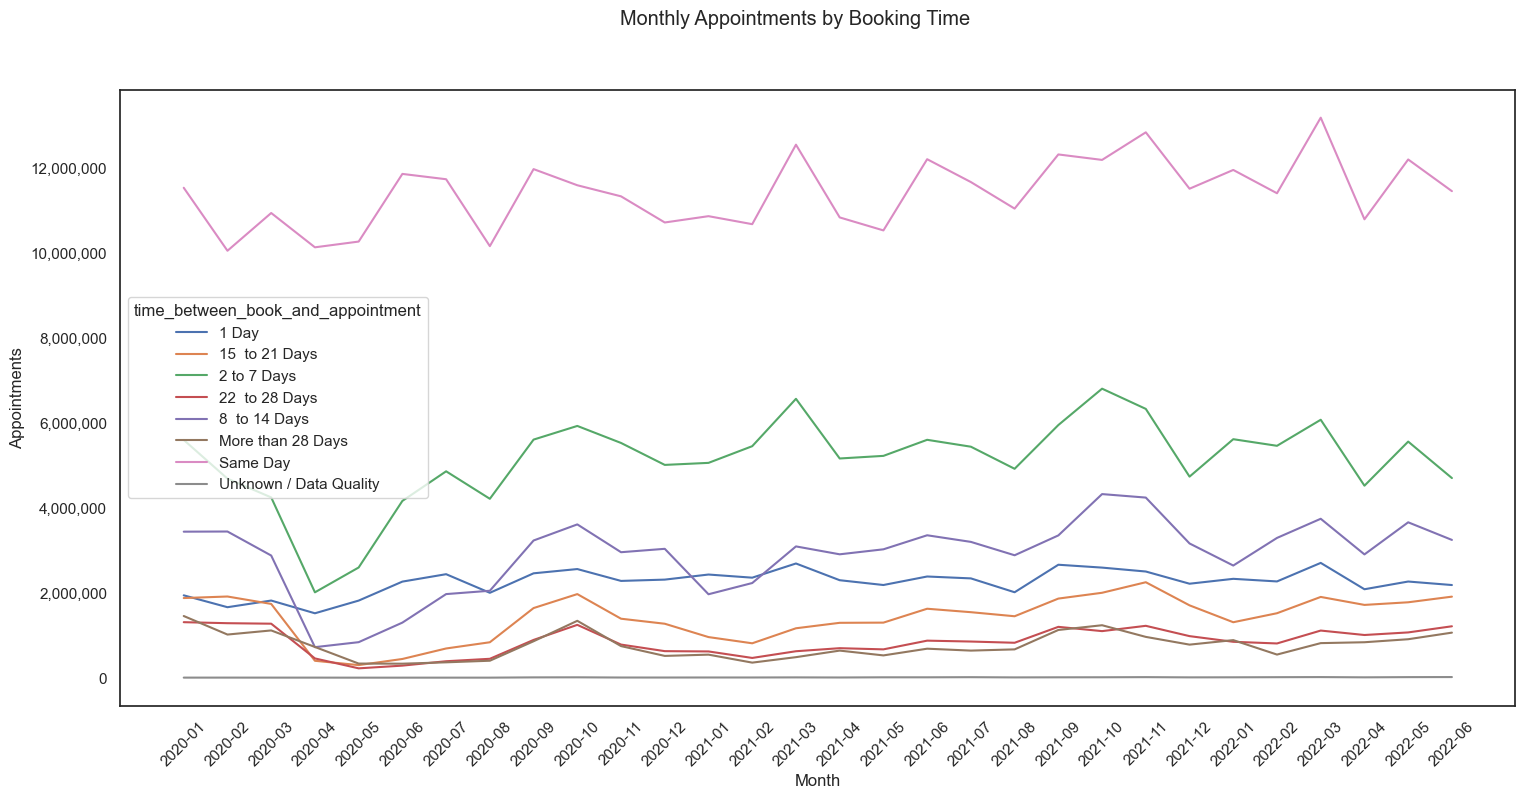

In [61]:
# Plot sum of count of monthly appointments.
# Set the styling
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_style('white')

ax = sns.lineplot(x='appointment_month', y= 'count_of_appointments', hue='time_between_book_and_appointment', data=ar_booking)

# Format axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
# Labels
plt.suptitle('Monthly Appointments by Booking Time')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.savefig('Monthly Appointments by Booking Time.png')

The majority of patients are seen on the same day as booking the appointment. It is comparatively rare to wait longer than 28 days. 

In [62]:
# Pivot ar_booking to have separate columns for calculations.

pivot_ar_booking = ar_booking.pivot(index='appointment_month', columns='time_between_book_and_appointment', 
                                  values='count_of_appointments').fillna(0)

# Drop Unknown / data quality
pivot_ar_booking = pivot_ar_booking.drop('Unknown / Data Quality', axis=1)

# Add a total column
pivot_ar_booking['Total'] = pivot_ar_booking.sum(axis=1)

# Add 48 hrs, within 2 weeks  and later than 2 weeks columns
pivot_ar_booking['48 hours'] = pivot_ar_booking['Same Day'] + pivot_ar_booking['1 Day']
pivot_ar_booking['Within 2 weeks']  = pivot_ar_booking[['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days']].sum(axis=1)
pivot_ar_booking['Later than 2 weeks'] = pivot_ar_booking[['15  to 21 Days', '22  to 28 Days', 'More than 28 Days']].sum(axis=1)

# Create Percentages of total appointments.
pivot_ar_booking['Same day (%)'] = (pivot_ar_booking['Same Day'] / pivot_ar_booking['Total']) * 100
pivot_ar_booking['48 hours (%)'] = (pivot_ar_booking['48 hours'] / pivot_ar_booking['Total']) * 100
pivot_ar_booking['Within 2 weeks (%)'] = (pivot_ar_booking['Within 2 weeks'] / pivot_ar_booking['Total']) * 100
pivot_ar_booking['Later than 2 weeks (%)'] = (pivot_ar_booking['Later than 2 weeks'] / pivot_ar_booking['Total']) * 100

# Drop superfluous columns
pivot_ar_booking = pivot_ar_booking[['Same Day','48 hours','Within 2 weeks',
                                         'Later than 2 weeks', 'Same day (%)',
                                        '48 hours (%)', 'Within 2 weeks (%)', 'Later than 2 weeks (%)']]

# Reset index
pivot_ar_booking.reset_index(inplace=True)

# View df
pivot_ar_booking.head()

time_between_book_and_appointment appointment_month  Same Day  48 hours  \
0                                           2020-01  11541694  13487405   
1                                           2020-02  10058743  11724819   
2                                           2020-03  10947395  12770321   
3                                           2020-04  10139567  11662644   
4                                           2020-05  10274928  12096738   

time_between_book_and_appointment  Within 2 weeks  Later than 2 weeks  \
0                                        22536951             4654103   
1                                        19865987             4230033   
2                                        19904530             4140639   
3                                        14404742             1594870   
4                                        15540879              869099   

time_between_book_and_appointment  Same day (%)  48 hours (%)  \
0                                     42.446659     49.602362   
1                                     41.744417     48.658737   
2                                     45.528459     53.109716   
3                                     63.373831     72.893293   
4                                     62.613905     73.715748   

time_between_book_and_appointment  Within 2 weeks (%)  Later than 2 weeks (%)  
0                                           82.883698               17.116302  
1                                           82.445097               17.554903  
2                                           82.779747               17.220253  
3                                           90.031821                9.968179  
4                                           94.703838                5.296162

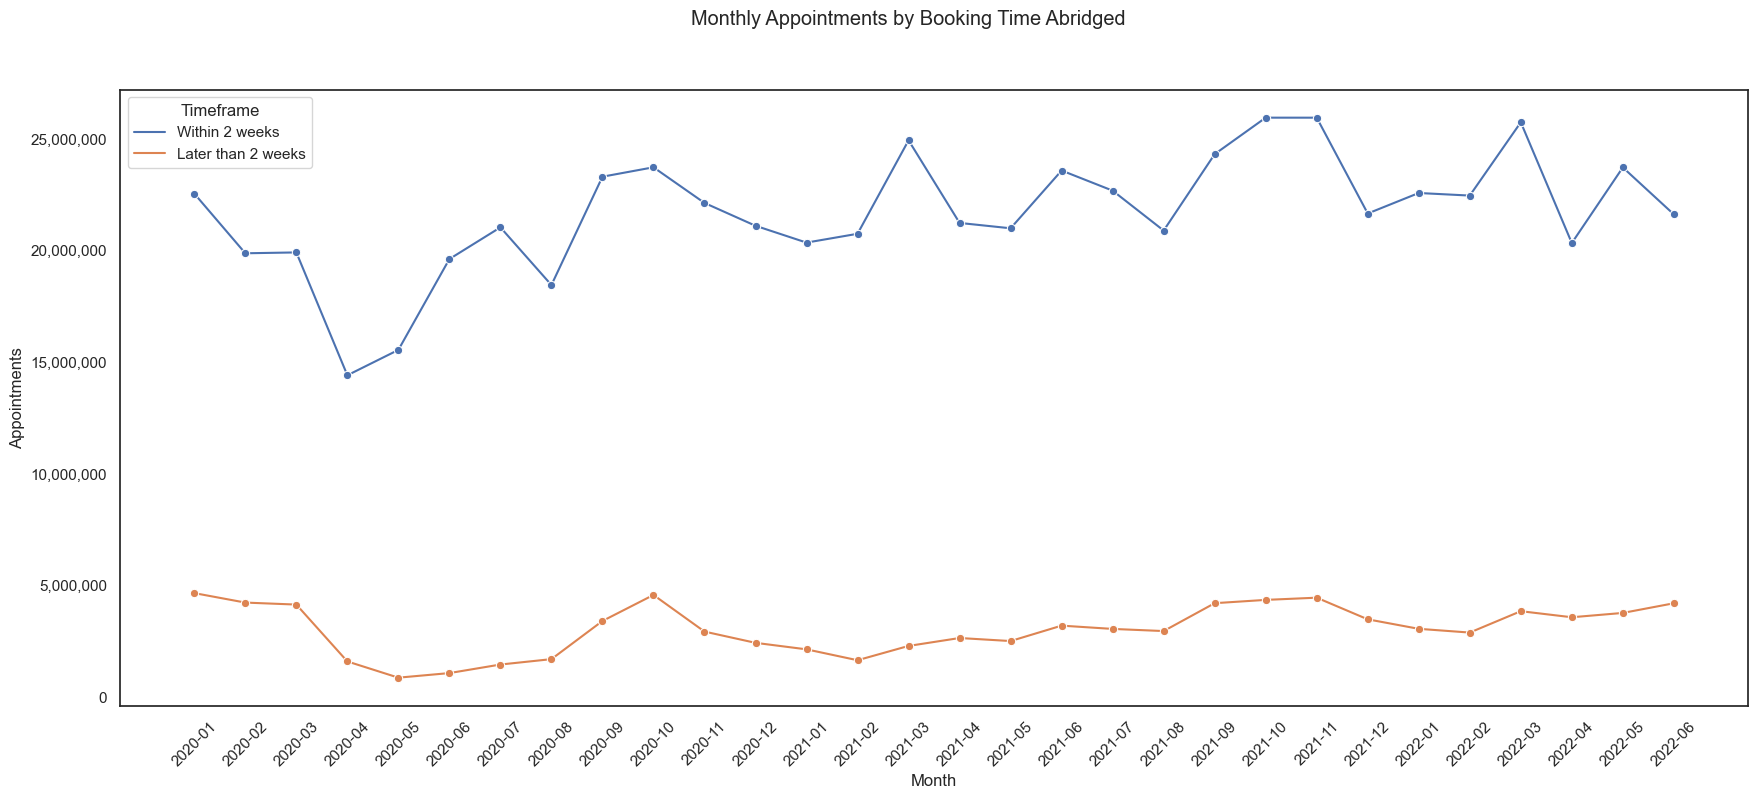

In [63]:
# Melt the non % values for easier plotting

pivot_ar_booking_2 = pivot_ar_booking[['appointment_month','Within 2 weeks', 'Later than 2 weeks']]

pivot_ar_booking_melt = pd.melt(pivot_ar_booking_2,
                                id_vars=['appointment_month'],
                            var_name='Timeframe', value_name='Value')

# Plot sum of count of monthly appointments
# Set the styling
sns.set(rc={'figure.figsize':(21, 8)})
sns.set_style('white')

ax = sns.lineplot(x='appointment_month', y='Value', hue='Timeframe', 
                  data=pivot_ar_booking_melt, marker='o')

# Format axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)

# Labels
plt.suptitle('Monthly Appointments by Booking Time Abridged')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.savefig('Monthly Appointments by Booking Time Abridged.png')

 #'Same Day', '48 hours',   

### Lineplot to illustrate in real terms whether the NHS is coping with increased demand 

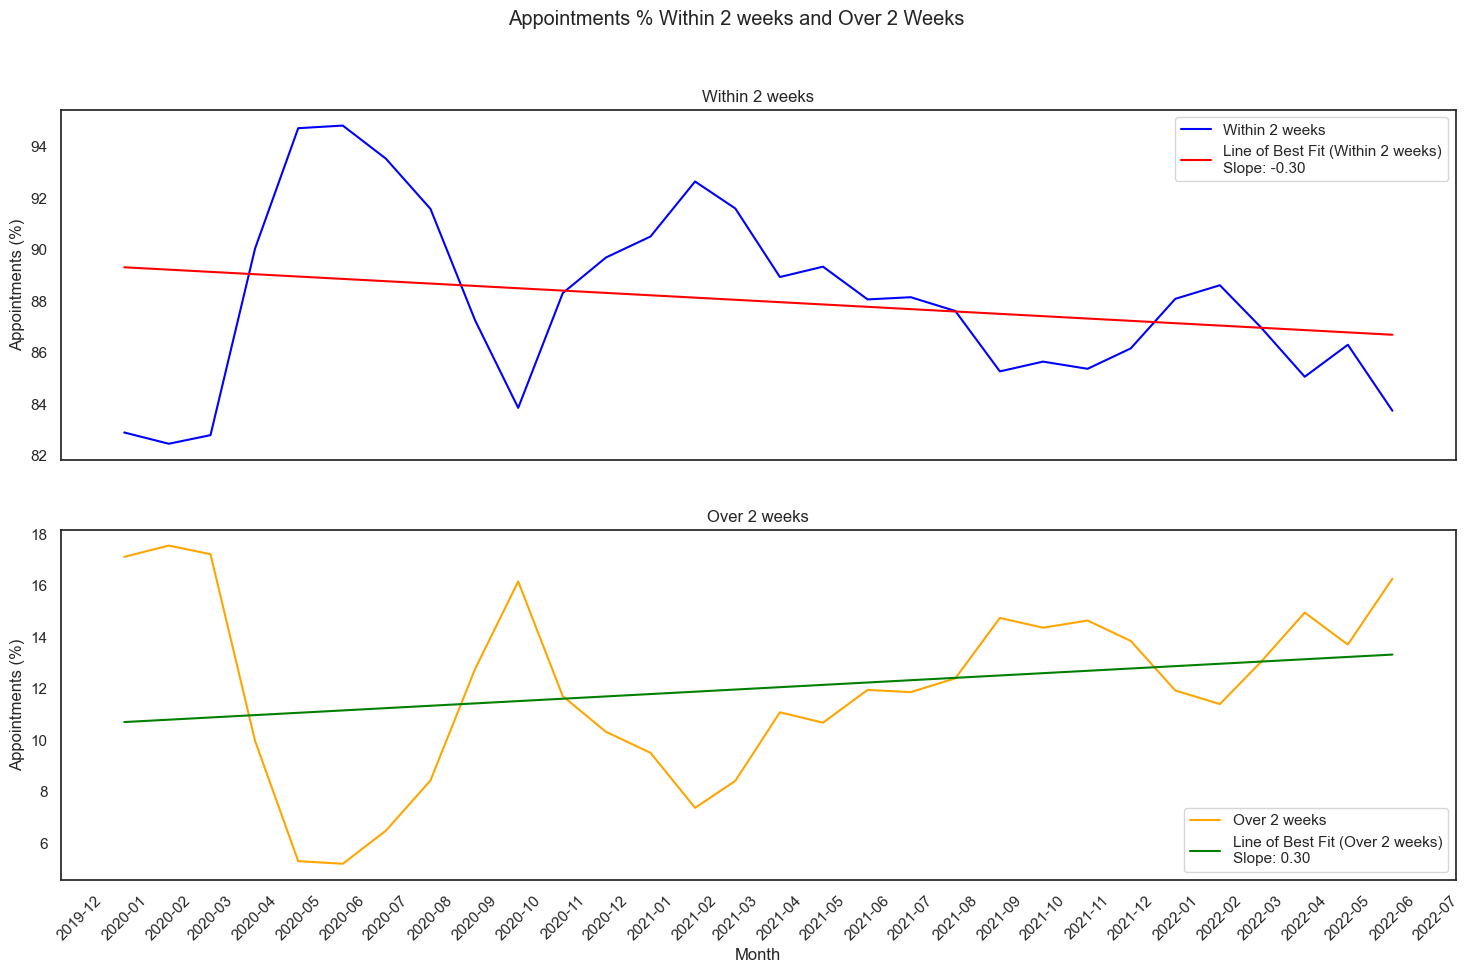

In [64]:
# Lineplot to illustrate in real terms whether the NHS is coping with increased demand 
# Confirm the uptrend

# Convert appointment month to a float for calculations
dates = pd.to_datetime(pivot_ar_booking['appointment_month'])
dates_as_float = date2num(dates)

# Create vaiables for timeframe appointments
within_2weeks = pivot_ar_booking['Within 2 weeks (%)']
over_2weeks = pivot_ar_booking['Later than 2 weeks (%)']

# Create linear regression for within 2 weeks
coefficients1 = np.polyfit(dates_as_float, within_2weeks, 1)
polynomial1 = np.poly1d(coefficients1)
slope_within_2weeks = coefficients1[0] * 100

# Create linear regression for over 2 weeks
coefficients2 = np.polyfit(dates_as_float, over_2weeks, 1)
polynomial2 = np.poly1d(coefficients2)
slope_over_2weeks = coefficients2[0] * 100

# Create subplots with 3 rows
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(18, 10))

# Plot within 2 weeks on the second row
axes[0].plot(dates, within_2weeks, label='Within 2 weeks', color='blue')
axes[0].plot(dates, polynomial1(dates_as_float), 
             label=f'Line of Best Fit (Within 2 weeks)\nSlope: {slope_within_2weeks:.2f}', color='red')
axes[0].set_ylabel("Appointments (%)")
axes[0].legend()
axes[0].set_title("Within 2 weeks")

# Plot over 2 weeks on the third row
axes[1].plot(dates, over_2weeks, label='Over 2 weeks', color='orange')
axes[1].plot(dates, polynomial2(dates_as_float), 
             label=f'Line of Best Fit (Over 2 weeks)\nSlope: {slope_over_2weeks:.2f}', color='green')
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Appointments (%)")
axes[1].legend()
axes[1].set_title("Over 2 weeks")

# Format Axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Appointments % Within 2 weeks and Over 2 Weeks')

# Save the plot
plt.savefig('Appointments % Within 2 weeks and Over 2 Weeks.png')

The pattern emerges when viewing the timeframes as percentages of total appointments. The busier periods coincide with notable upticks in the percentage of appointments later than 2 weeks. This is inversely proportional to the lower timeframes which see sharp declines in busier periods.  
When appointment demand is high, the ‘same day’, ‘48 hours’ and ‘Within 2 week’ thresholds are more difficult to maintain.


In [65]:
timeframe_average = pivot_ar_booking[['Same day (%)','48 hours (%)','Within 2 weeks (%)','Later than 2 weeks (%)']].mean()
timeframe_average = pd.DataFrame({'Timeframe Average ': timeframe_average})
timeframe_average = round(timeframe_average, 2)
timeframe_average

Timeframe Average 
time_between_book_and_appointment                    
Same day (%)                                    46.81
48 hours (%)                                    56.01
Within 2 weeks (%)                              87.99
Later than 2 weeks (%)                          12.01

## 5 Measures to Extract Value from Existing Resources.

### 5.1 Missed Appointment Analysis


### What insights can be gained by looking at missed appointments?

"The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments."

The following analysis seeks to answer the following questions:

1. How many appointment statuses are there and what is the count of appointments in each status?
2. As a percentage of total appointments, which ICB locations are the poorest performers with regard to missed appointments.
3. Does the time between booking an appointment and the appointment date have an effect on the likelihood that an appointment will be missed.
4. Which GP appointment mode is most likely to be missed?
5. Which hcp type attracts the most missed appointments? 
6. Does the time of year affect the likelihood of missed appointments?

### **1. How many appointment statuses are there and what is the count of appointments in each status?**

In [66]:
# Create a new df ar_as grouping ar by appointment status
# Input required parameters and call the sum_appointments_multi function.

new_df_name = "ar_as"
from_df_name = "ar"
group_by1 = "appointment_status"
group_by2_option = "n"
group_by2 = None
location_filter = "n"
location = None
date_filter = "n"
start_date = None
end_date = None
sort = "y"
top_5 = "n"

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_status:  3


appointment_status  count_of_appointments
0           Attended              677755876
2            Unknown               34137416
1                DNA               30911233

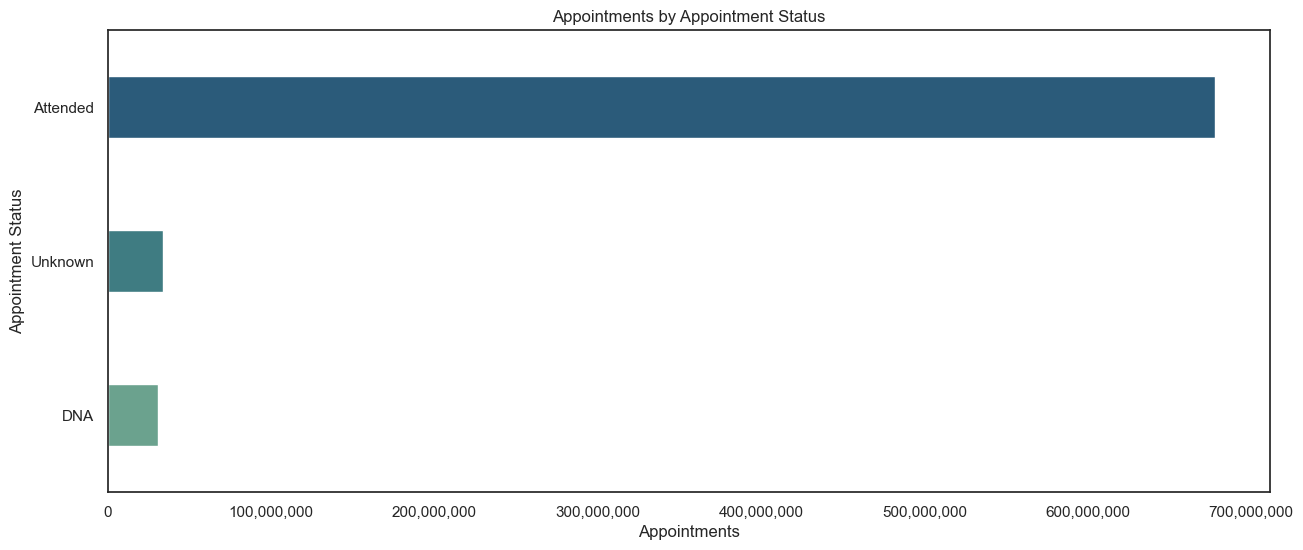

In [67]:
# Bar plot for Appointment Status

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='count_of_appointments', y='appointment_status', 
             data=ar_as, palette='crest_r', width=0.4, dodge=0.1)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.xaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Appointments by Appointment Status")
ax.set_ylabel("Appointment Status")
ax.set_xlabel("Appointments")

# Save the plot
plt.savefig('Appointments by Appointment Status.png')

The following analysis uses appointment status as a percentage of total appointments within a category standardize the data for comparison:

### **2. As a percentage of total appointments, which ICB locations are the poorest performers with regard to missed appointments.**

In [68]:
# Create a new df ar_icb_as, grouping for ICB locations and appointment status.

new_df_name = 'ar_icb_as'
from_df_name = 'ar'
group_by1 = 'icb_location_name'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of icb_location_name:  42


icb_location_name appointment_status  \
0  NHS Bath and North East Somerset Swindon and W...           Attended   
1  NHS Bath and North East Somerset Swindon and W...                DNA   
2  NHS Bath and North East Somerset Swindon and W...            Unknown   
3       NHS Bedfordshire Luton and Milton Keynes ICB           Attended   
4       NHS Bedfordshire Luton and Milton Keynes ICB                DNA   
5       NHS Bedfordshire Luton and Milton Keynes ICB            Unknown   
6                    NHS Birmingham and Solihull ICB           Attended   
7                    NHS Birmingham and Solihull ICB                DNA   
8                    NHS Birmingham and Solihull ICB            Unknown   
9                              NHS Black Country ICB           Attended   

   count_of_appointments  
0               12528475  
1                 404831  
2                 705875  
3               11303414  
4                 440628  
5                 531289  
6               14361165  
7                 893541  
8                 697763  
9               15650234

The returned df was then pivoted to split the appointment statuses into columns. A total column was added, and a percentage of total column calculated. The pivoted df was sorted in descending order by DNA % and the index reset. The top 10 poorest performing locations in terms of missed appointments were displayed.

In [69]:
# Pivot ar_icb_as to have a single row for each location.

pivot_ar_icb_as = ar_icb_as.pivot(index='icb_location_name', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)

# Add a total column
pivot_ar_icb_as['Total'] = pivot_ar_icb_as.sum(axis=1)

# Create Percentages of total appointments to normalise the data for comparison.
pivot_ar_icb_as['Attended (%)'] = (pivot_ar_icb_as['Attended'] / pivot_ar_icb_as['Total']) * 100
pivot_ar_icb_as['DNA (%)'] = (pivot_ar_icb_as['DNA'] / pivot_ar_icb_as['Total']) * 100
pivot_ar_icb_as['Unknown (%)'] = (pivot_ar_icb_as['Unknown'] / pivot_ar_icb_as['Total']) * 100

# Sort in order of DNA % in descending order to find the worst 10 ICB locations for missed appointments.
pivot_ar_icb_as = pivot_ar_icb_as.sort_values(by='DNA (%)', ascending=False)

# Reset the index to make 'icb_location_name' a normal column
pivot_ar_icb_as.reset_index(inplace=True)

pivot_ar_icb_as.head(10)

appointment_status                         icb_location_name  Attended  \
0                                      NHS Black Country ICB  15650234   
1                                 NHS Greater Manchester ICB  30310360   
2                            NHS Birmingham and Solihull ICB  14361165   
3                                  NHS North East London ICB  21267205   
4                                  NHS South East London ICB  18158276   
5                                  NHS South West London ICB  16330355   
6                               NHS North Central London ICB  15038067   
7                            NHS Cheshire and Merseyside ICB  29881646   
8                   NHS Staffordshire and Stoke-on-Trent ICB  11904788   
9                          NHS Coventry and Warwickshire ICB  11122652   

appointment_status      DNA  Unknown     Total  Attended (%)   DNA (%)  \
0                   1023176   840640  17514050     89.358167  5.842030   
1                   1946114  1824109  34080583     88.937328  5.710331   
2                    893541   697763  15952469     90.024717  5.601271   
3                   1317005  1010049  23594259     90.137202  5.581888   
4                   1107753   975423  20241452     89.708367  5.472695   
5                    914695   727916  17972966     90.860657  5.089282   
6                    831775   625576  16495418     91.165116  5.042461   
7                   1658787  1559449  33099882     90.277198  5.011459   
8                    637789   653638  13196215     90.213656  4.833121   
9                    568621   476919  12168192     91.407598  4.673011   

appointment_status  Unknown (%)  
0                      4.799804  
1                      5.352341  
2                      4.374013  
3                      4.280910  
4                      4.818938  
5                      4.050061  
6                      3.792423  
7                      4.711343  
8                      4.953223  
9                      3.919391

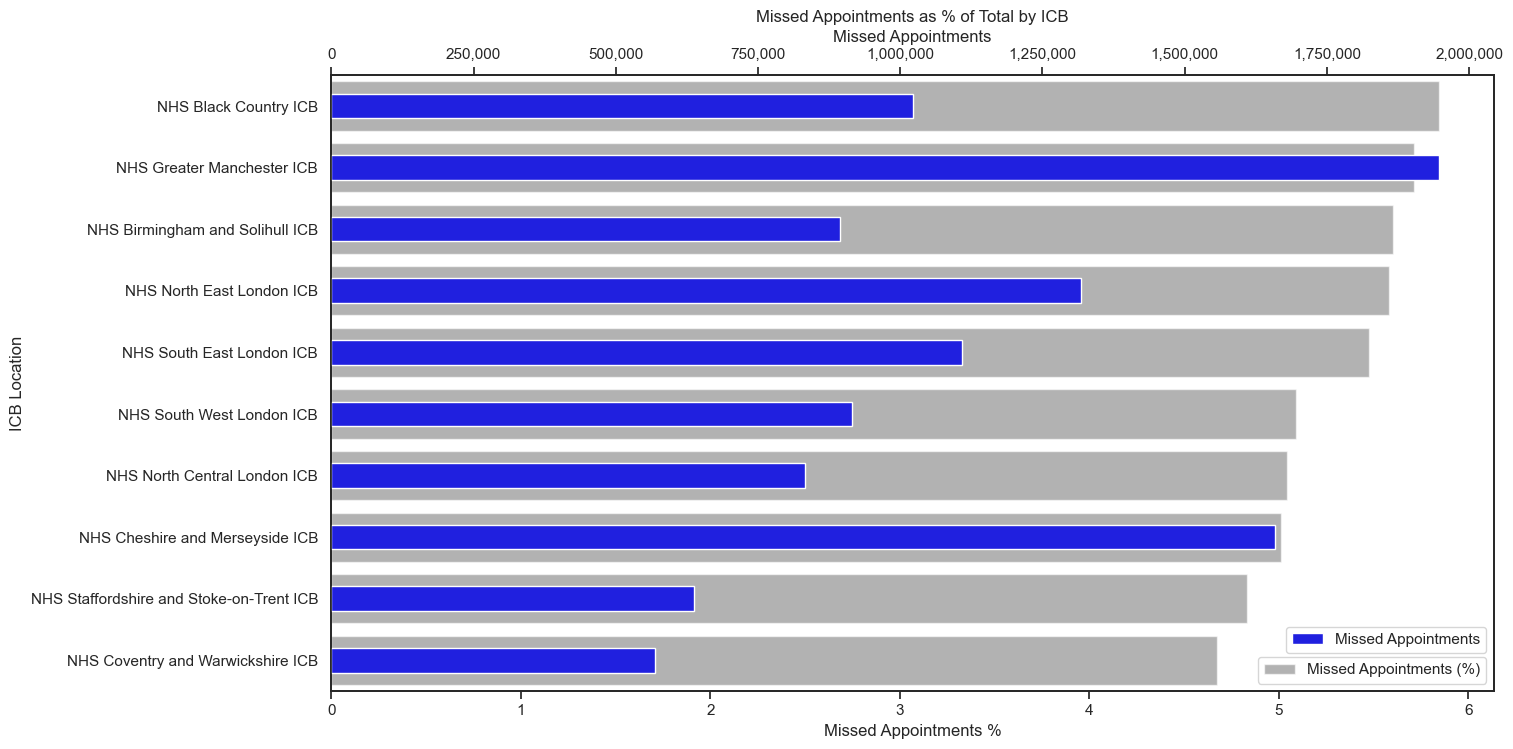

In [70]:
# Create a dual axis bar plot to illustrate DNA and DNA (%) in ICB locations

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot DNA %

ax1 = sns.barplot(x='DNA (%)', y='icb_location_name', 
                  data=pivot_ar_icb_as.head(10), color='grey', alpha=0.6, label='Missed Appointments (%)')

# Title and Axis labels
ax1.set_title("Missed Appointments as % of Total by ICB")
ax1.set_ylabel("ICB Location")
ax1.set_xlabel("Missed Appointments %")

# Create a twin axis for DNA 

ax2 = ax1.twiny()
ax2 = sns.barplot(x='DNA', y='icb_location_name', 
                  data=pivot_ar_icb_as.head(10), width=0.4, color='blue', label='Missed Appointments')
# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.xaxis.set_major_formatter(formatter)

ax2.set_xlabel("Missed Appointments")

# Create a legend
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0))
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.05))

plt.savefig('Missed Appointments % by ICB.png')

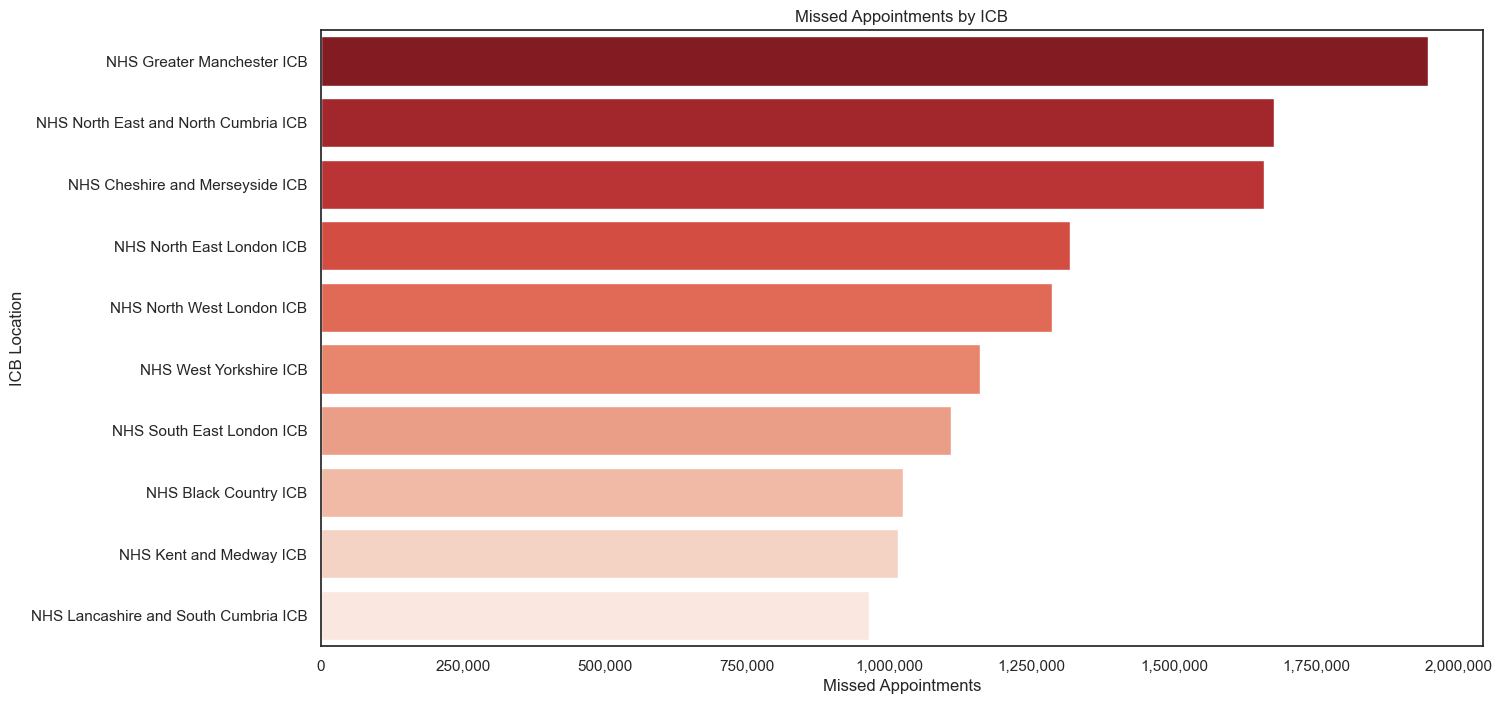

In [71]:
# Barplot for DNAs total in descending order

pivot_ar_icb_as2 = pivot_ar_icb_as.sort_values(by='DNA', ascending=False)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot DNA (10)

ax1 = sns.barplot(x='DNA', y='icb_location_name', 
                  data=pivot_ar_icb_as2.head(10), palette='Reds_r', label='Missed Appointments')
# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax1.xaxis.set_major_formatter(formatter)

# Title and Axis labels
ax1.set_title("Missed Appointments by ICB")
ax1.set_ylabel("ICB Location")
ax1.set_xlabel("Missed Appointments")

plt.savefig('Missed Appointments by ICB Top 10.png')

In [72]:
pivot_ar_icb_as2.head(10)

appointment_status                     icb_location_name  Attended      DNA  \
1                             NHS Greater Manchester ICB  30310360  1946114   
23                  NHS North East and North Cumbria ICB  39374437  1676790   
7                        NHS Cheshire and Merseyside ICB  29881646  1658787   
3                              NHS North East London ICB  21267205  1317005   
15                             NHS North West London ICB  26848972  1286262   
36                                NHS West Yorkshire ICB  33182630  1159691   
4                              NHS South East London ICB  18158276  1107753   
0                                  NHS Black Country ICB  15650234  1023176   
12                               NHS Kent and Medway ICB  20426411  1015035   
13                  NHS Lancashire and South Cumbria ICB  19582053   964458   

appointment_status  Unknown     Total  Attended (%)   DNA (%)  Unknown (%)  
1                   1824109  34080583     88.937328  5.710331     5.352341  
23                  2032308  43083535     91.390915  3.891951     4.717134  
7                   1559449  33099882     90.277198  5.011459     4.711343  
3                   1010049  23594259     90.137202  5.581888     4.280910  
15                  1245533  29380767     91.382815  4.377905     4.239280  
36                  1748066  36090387     91.943126  3.213296     4.843578  
4                    975423  20241452     89.708367  5.472695     4.818938  
0                    840640  17514050     89.358167  5.842030     4.799804  
12                  1182532  22623978     90.286558  4.486545     5.226897  
13                   975892  21522403     90.984510  4.481182     4.534308

The above outlines the poorest performing ICB locations in terms of the missed appointments rate. The NHS might consider focusing on improving any ICB location above the overall average of 4.60% DNAs to total appointments. In addition, those ICB locations that have high DNAs in magnitude and proportion should be investigated with a higher degree of emphasis. 

### **3. 3.	Does the time between booking an appointment and the appointment date influence the likelihood that an appointment will be missed.**

In [73]:
# Create a new df grouping for for time_between book and appointment status.

new_df_name = 'ar_tb_as'
from_df_name = 'ar'
group_by1 = 'time_between_book_and_appointment'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of time_between_book_and_appointment:  8


time_between_book_and_appointment appointment_status  count_of_appointments
0                             1 Day           Attended               62556833
1                             1 Day                DNA                2634536
2                             1 Day            Unknown                2524728
3                    15  to 21 Days           Attended               35842753
4                    15  to 21 Days                DNA                3282752
5                    15  to 21 Days            Unknown                3585069
6                       2 to 7 Days           Attended              138103022
7                       2 to 7 Days                DNA                8697476
8                       2 to 7 Days            Unknown                6994033
9                    22  to 28 Days           Attended               20798309

In [74]:
# Pivot ar_icb_a_tb to have a single row for time_between book and appointment.

pivot_ar_tb_as = ar_tb_as.pivot(index='time_between_book_and_appointment', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)

# Add a total column
pivot_ar_tb_as['Total'] = pivot_ar_tb_as.sum(axis=1)

# Create Percentages of total appointments to normalise the data for comparison.
pivot_ar_tb_as['Attended (%)'] = (pivot_ar_tb_as['Attended'] / pivot_ar_tb_as['Total']) * 100
pivot_ar_tb_as['DNA (%)'] = (pivot_ar_tb_as['DNA'] / pivot_ar_tb_as['Total']) * 100
pivot_ar_tb_as['Unknown (%)'] = (pivot_ar_tb_as['Unknown'] / pivot_ar_tb_as['Total']) * 100

# Sort in order of DNA % in descending.
pivot_ar_tb_as = pivot_ar_tb_as.sort_values(by='DNA (%)', ascending=False)

# Reset the index to make 'time_between_book_and_appointment' a normal column
pivot_ar_tb_as.reset_index(inplace=True)

# Inspect df
pivot_ar_tb_as

appointment_status time_between_book_and_appointment   Attended      DNA  \
0                                  More than 28 Days   16699531  2036154   
1                                     22  to 28 Days   20798309  1999990   
2                                     15  to 21 Days   35842753  3282752   
3                                      8  to 14 Days   75092108  6193368   
4                                        2 to 7 Days  138103022  8697476   
5                                              1 Day   62556833  2634536   
6                             Unknown / Data Quality     283003    14353   
7                                           Same Day  328380317  6052604   

appointment_status  Unknown      Total  Attended (%)   DNA (%)  Unknown (%)  
0                   4315302   23050987     72.446056  8.833262    18.720682  
1                   2738242   25536541     81.445287  7.831875    10.722838  
2                   3585069   42710574     83.920092  7.686040     8.393868  
3                   5561043   86846519     86.465306  7.131395     6.403300  
4                   6994033  153794531     89.797096  5.655257     4.547647  
5                   2524728   67716097     92.381038  3.890561     3.728402  
6                    104749     402105     70.380373  3.569466    26.050161  
7                   8314250  342747171     95.808323  1.765909     2.425768

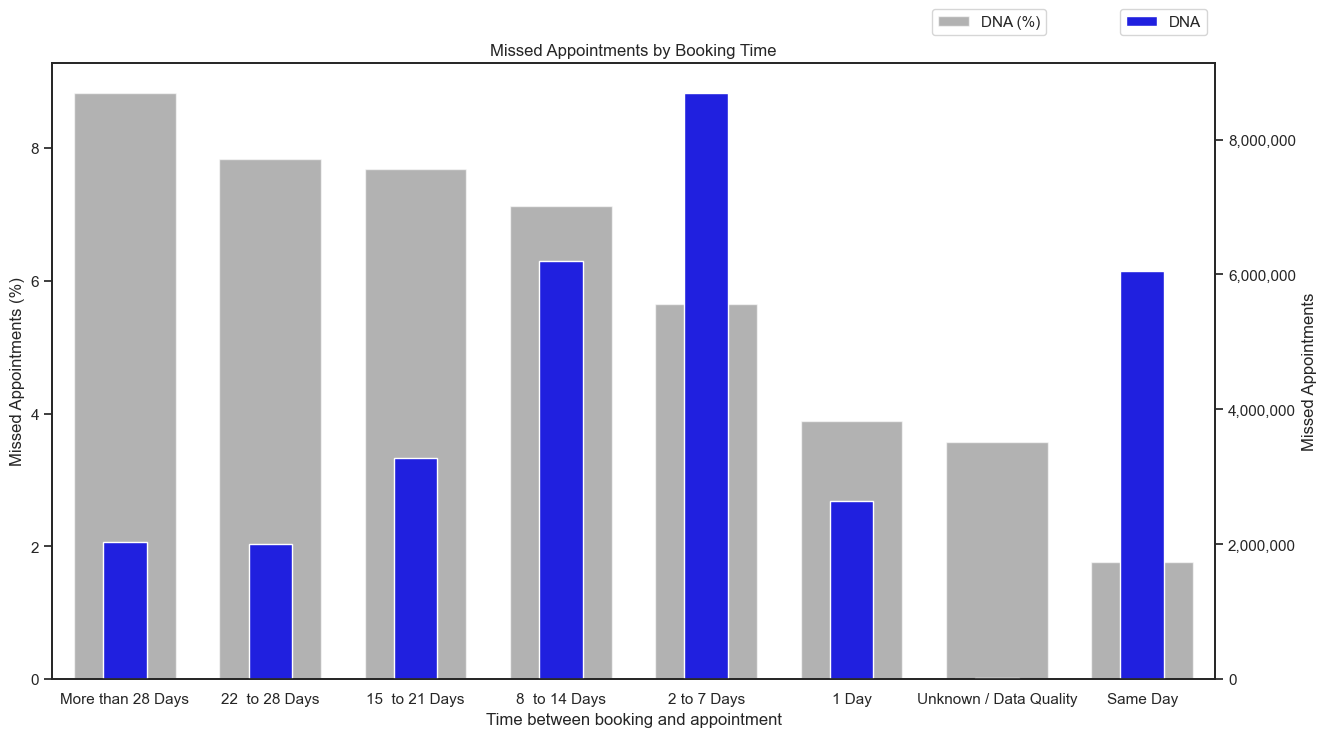

In [75]:
# Create a dual axis bar plot to illustrate DNA and DNA (%) and time_between_book_and_appointment

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot DNA (%)
ax1 = sns.barplot(x='time_between_book_and_appointment', y='DNA (%)', 
                  data=pivot_ar_tb_as, color='grey', alpha=0.6, width=0.7, label='DNA (%)')

# Title and Axis labels
ax1.set_title("Missed Appointments by Booking Time")
ax1.set_ylabel("Missed Appointments (%)")
ax1.set_xlabel("Time between booking and appointment")

# Create a twin axis for DNA 
ax2 = ax1.twinx()
ax2 = sns.barplot(x='time_between_book_and_appointment', y='DNA', 
                  data=pivot_ar_tb_as, width=0.3, color='blue', label='DNA')
# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Missed Appointments")

# Create a legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.75, 1.1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.1))

plt.savefig('Missed Appointments by time_between_book_and_appointment.png')

The 2 to 7 days bracket had the highest number of DNAs. However, as a proportion, the longer the period between booking and the appointment, the less likely the patient is to attend, with more than 28 days being the least likely. 

### **4. Which appointment mode is most likely to be missed?**

In [76]:
# Create a new df grouping for appointment mode and appointment status.

new_df_name = 'ar_mode_as'
from_df_name = 'ar'
group_by1 = 'appointment_mode'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_mode:  5


appointment_mode appointment_status  count_of_appointments
0     Face-to-Face           Attended              392705999
1     Face-to-Face                DNA               24253038
2     Face-to-Face            Unknown               23022692
3       Home Visit           Attended                3612068
4       Home Visit                DNA                 187571
5       Home Visit            Unknown                1088237
6        Telephone           Attended              254799226
7        Telephone                DNA                5262251
8        Telephone            Unknown                7801180
9          Unknown           Attended               23335350

In [77]:
# Pivot ar_mode_as to illustrate DNA and DNA (%) in relation to each appointment mode.

pivot_ar_mode_as = ar_mode_as.pivot(index='appointment_mode', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)
# Add a total column
pivot_ar_mode_as['Total'] = pivot_ar_mode_as.sum(axis=1)

# Create Percentages of total appointments to normalise the data for comparison.

pivot_ar_mode_as['Attended (%)'] = (pivot_ar_mode_as['Attended'] / pivot_ar_mode_as['Total']) * 100
pivot_ar_mode_as['DNA (%)'] = (pivot_ar_mode_as['DNA'] / pivot_ar_mode_as['Total']) * 100
pivot_ar_mode_as['Unknown (%)'] = (pivot_ar_mode_as['Unknown'] / pivot_ar_mode_as['Total']) * 100

#Sort in order of DNA % in descending order.
pivot_ar_mode_as = pivot_ar_mode_as.sort_values(by='DNA (%)', ascending=False)

# Reset the index to make 'appointment_mode' a normal column
pivot_ar_mode_as.reset_index(inplace=True)

# Inspect df
pivot_ar_mode_as


appointment_status appointment_mode   Attended       DNA   Unknown      Total  \
0                      Face-to-Face  392705999  24253038  23022692  439981729   
1                      Video/Online    3303233    158946    158779    3620958   
2                           Unknown   23335350   1049427   2066528   26451305   
3                        Home Visit    3612068    187571   1088237    4887876   
4                         Telephone  254799226   5262251   7801180  267862657   

appointment_status  Attended (%)   DNA (%)  Unknown (%)  
0                      89.255070  5.512283     5.232647  
1                      91.225388  4.389612     4.385000  
2                      88.220033  3.967392     7.812575  
3                      73.898520  3.837475    22.264006  
4                      95.123086  1.964533     2.912381

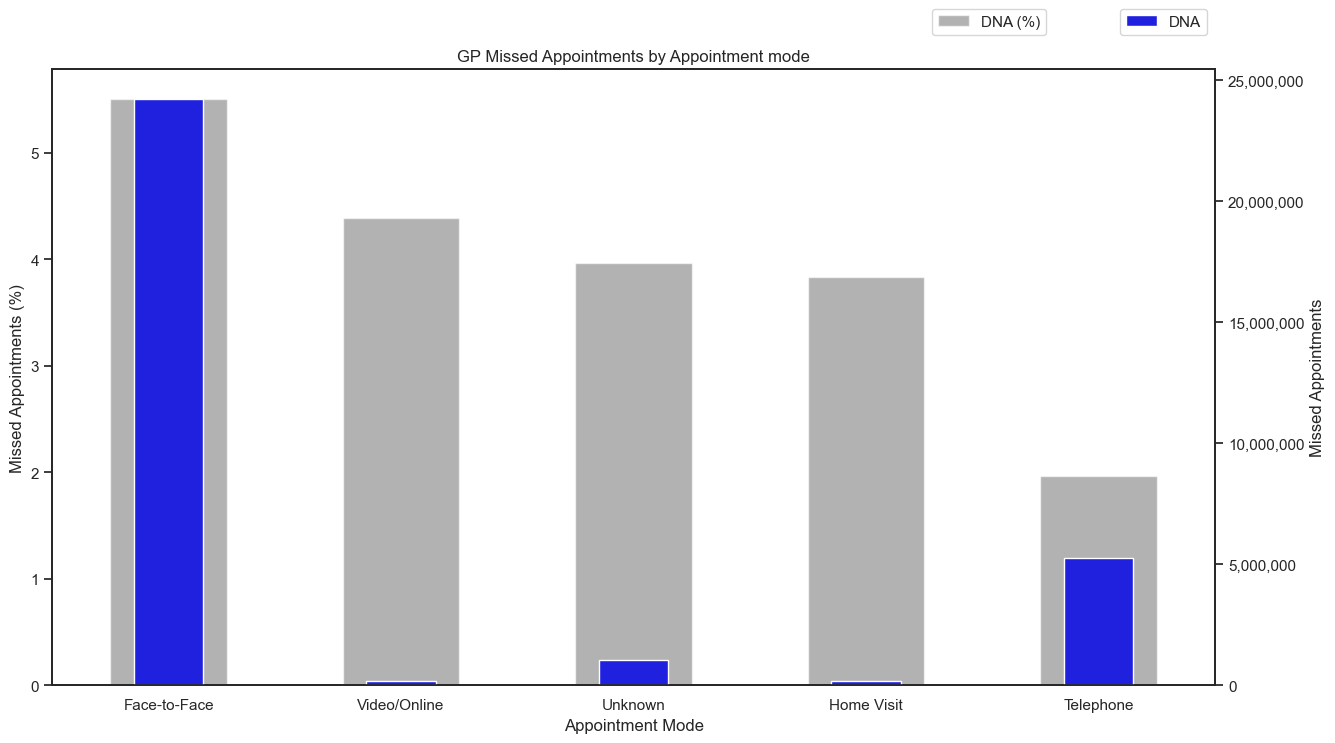

In [78]:
# Create a dual axis bar plot to illustrate DNA and DNA (%) and appointment mode - GP

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot DNA (%)
ax1 = sns.barplot(x='appointment_mode', y='DNA (%)', data=pivot_ar_mode_as,
                  color='grey', alpha=0.6, width=0.5, label='DNA (%)')

# Title and Axis labels
ax1.set_title("GP Missed Appointments by Appointment mode")
ax1.set_xlabel("Appointment Mode")
ax1.set_ylabel("Missed Appointments (%)")

# Create a twin axis for DNA 
ax2 = ax1.twinx()
ax2 = sns.barplot(x='appointment_mode', y='DNA', data=pivot_ar_mode_as,
                  width=0.3, color='blue', label='DNA')
# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Missed Appointments")

# Create a legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.75, 1.11))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.11))

plt.savefig('Missed Appointments by appointment mode.png')

If 'unknown' is disregarded, GP face to face appointments are the most unattended both in magnitude and proportion. Note also that home visits have a 21% “unknown” with regards to appointment status. This is considerable and worthy of further investigation.

### **5. Which hcp type attracts the most missed appointments?** 

In [79]:
# Create a new df grouping for for hcp_type and appointment status.

new_df_name = 'ar_hcp_as'
from_df_name = 'ar'
group_by1 = 'hcp_type'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of hcp_type:  3


hcp_type appointment_status  count_of_appointments
0                    GP           Attended              357847005
1                    GP                DNA                9428935
2                    GP            Unknown               12374200
3  Other Practice staff           Attended              299129577
4  Other Practice staff                DNA               20829335
5  Other Practice staff            Unknown               19691623
6               Unknown           Attended               20779294
7               Unknown                DNA                 652963
8               Unknown            Unknown                2071593

In [80]:
# Pivot ar_hcp_as to have a single row for each hcp_type and appointment status.

pivot_ar_hcp_as = ar_hcp_as.pivot(index='hcp_type', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)
# Add a total column
pivot_ar_hcp_as['Total'] = pivot_ar_hcp_as.sum(axis=1)

# Create Percentages of total appointments to normalise the data for comparison.

pivot_ar_hcp_as['Attended (%)'] = (pivot_ar_hcp_as['Attended'] / pivot_ar_hcp_as['Total']) * 100
pivot_ar_hcp_as['DNA (%)'] = (pivot_ar_hcp_as['DNA'] / pivot_ar_hcp_as['Total']) * 100
pivot_ar_hcp_as['Unknown (%)'] = (pivot_ar_hcp_as['Unknown'] / pivot_ar_hcp_as['Total']) * 100

#Sort in order of DNA % in descending order.
pivot_ar_hcp_as = pivot_ar_hcp_as.sort_values(by='DNA (%)', ascending=False)

# Reset the index to make 'hcp_type' a normal column
pivot_ar_hcp_as.reset_index(inplace=True)

# Inspect df
pivot_ar_hcp_as

appointment_status              hcp_type   Attended       DNA   Unknown  \
0                   Other Practice staff  299129577  20829335  19691623   
1                                Unknown   20779294    652963   2071593   
2                                     GP  357847005   9428935  12374200   

appointment_status      Total  Attended (%)   DNA (%)  Unknown (%)  
0                   339650535     88.069809  6.132578     5.797613  
1                    23503850     88.408044  2.778111     8.813845  
2                   379650140     94.257045  2.483585     3.259369

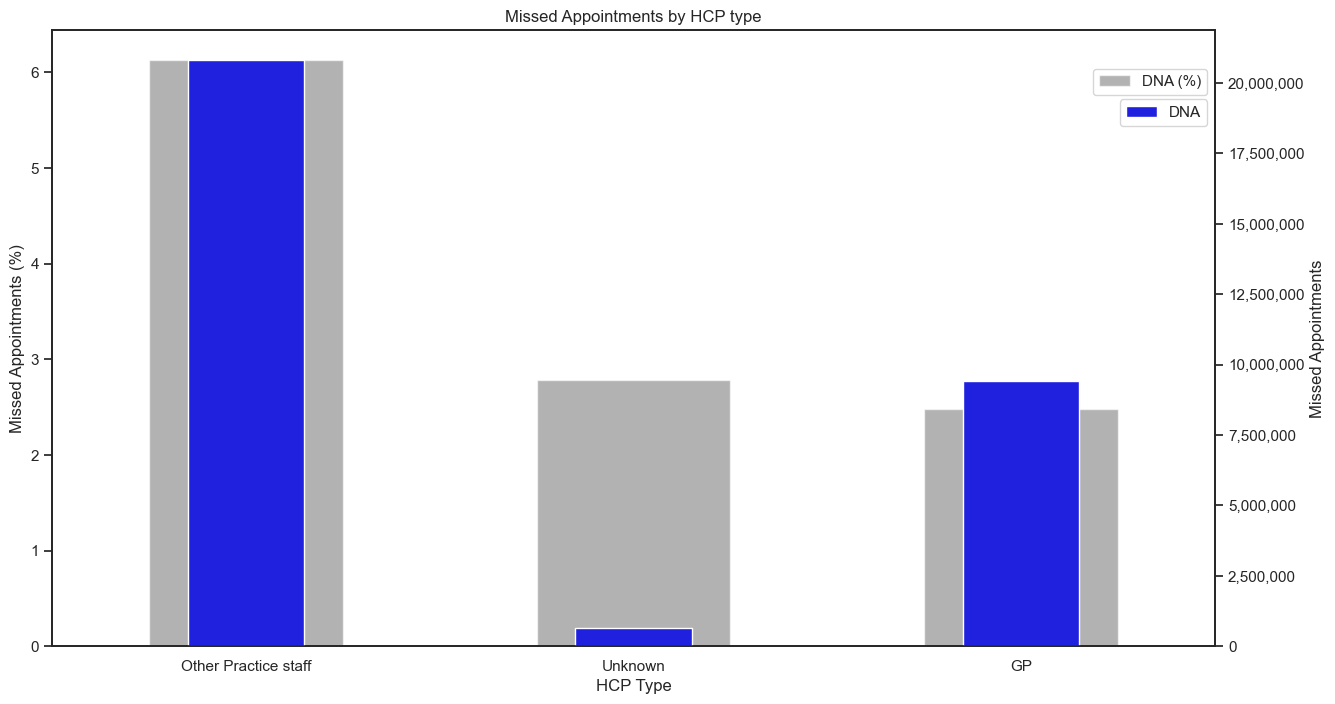

In [81]:
# Create a dual axis bar plot to illustrate DNA and DNA (%) and HCP type

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot DNA (%)
ax1 = sns.barplot(x='hcp_type', y='DNA (%)', data=pivot_ar_hcp_as,
                  color='grey', alpha=0.6, width=0.5, label='DNA (%)')

# Title and Axis labels
ax1.set_title("Missed Appointments by HCP type")
ax1.set_xlabel("HCP Type")
ax1.set_ylabel("Missed Appointments (%)")

# Create a twin axis for DNA 
ax2 = ax1.twinx()
ax2 = sns.barplot(x='hcp_type', y='DNA', data=pivot_ar_hcp_as,
                  width=0.3, color='blue', label='DNA')
# Format y axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Missed Appointments")

# Create a legend
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.savefig('Missed Appointments by hcp_type.png')

Although Other Practice staff has a lower total number of appointments than GP appointments, they attract significantly more DNAs both in terms of magnitude and proportion. Perhaps this is due to lower severity of the patients’ complaint and the perceived importance level of a doctor's appointment vs other practice staff.

### **6. Does the time of year affect the likelihood of missed appointments?**

In [82]:
# Create a new df grouping for for appointment_month and appointment status.

new_df_name = 'ar_am_as'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of appointment_month:  30


appointment_month appointment_status  count_of_appointments
0           2020-01           Attended               24538291
1           2020-01                DNA                1298269
2           2020-01            Unknown                1362736
3           2020-02           Attended               21640067
4           2020-02                DNA                1215154
5           2020-02            Unknown                1249400
6           2020-03           Attended               20718865
7           2020-03                DNA                1166314
8           2020-03            Unknown                2168289
9           2020-04           Attended               13982824

In [83]:
# Pivot ar_am_as.

pivot_ar_am_as = ar_am_as.pivot(index='appointment_month', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)
# Add a total column
pivot_ar_am_as['Total'] = pivot_ar_am_as.sum(axis=1)

# Create Percentages of total appointments to normalise the data for comparison.

pivot_ar_am_as['Attended (%)'] = (pivot_ar_am_as['Attended'] / pivot_ar_am_as['Total']) * 100
pivot_ar_am_as['DNA (%)'] = (pivot_ar_am_as['DNA'] / pivot_ar_am_as['Total']) * 100
pivot_ar_am_as['Unknown (%)'] = (pivot_ar_am_as['Unknown'] / pivot_ar_am_as['Total']) * 100

# Reset the index to make 'appointment_month' a normal column
pivot_ar_am_as.reset_index(inplace=True)

pivot_ar_am_as.head()

appointment_status appointment_month  Attended      DNA  Unknown     Total  \
0                            2020-01  24538291  1298269  1362736  27199296   
1                            2020-02  21640067  1215154  1249400  24104621   
2                            2020-03  20718865  1166314  2168289  24053468   
3                            2020-04  13982824   478766  1546291  16007881   
4                            2020-05  14962850   449057  1005305  16417212   

appointment_status  Attended (%)   DNA (%)  Unknown (%)  
0                      90.216640  4.773171     5.010188  
1                      89.775595  5.041166     5.183239  
2                      86.136706  4.848839     9.014455  
3                      87.349625  2.990814     9.659561  
4                      91.141236  2.735282     6.123482

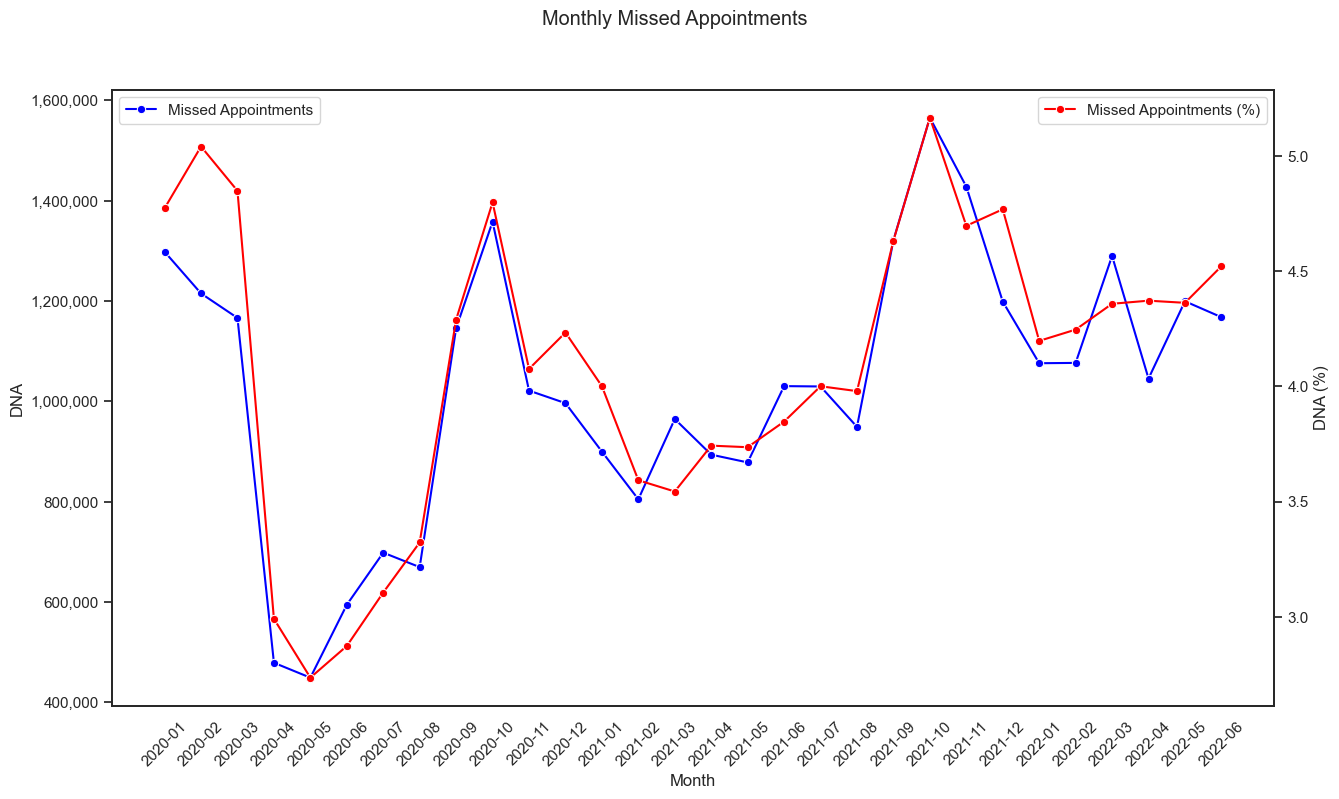

In [84]:
# Create a dual axis lineplot to illustrate monthly appointments DNA % and DNAs.

fig, ax1 = plt.subplots()                          
# Set the styling
sns.set(rc={'figure.figsize':(21, 8)})
sns.set_style('white')

# Lineplot DNA
sns.lineplot(x='appointment_month', y='DNA', data=pivot_ar_am_as, ax=ax1,
                   errorbar=None, palette='bright', 
                  color='blue', marker='o',label='Missed Appointments')

# Format the axis scale so that they show the full number of appointments and rotate tick labels.
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add second axis to show DNA%

ax2 = ax1.twinx()
sns.lineplot(x='appointment_month', y='DNA (%)', ax=ax2, data=pivot_ar_am_as, 
             errorbar=None, palette='bright', color='red', marker='o', label='Missed Appointments (%)' )

# Add titles, legends and labels

plt.suptitle('Monthly Missed Appointments')
ax1.set_xlabel("Month")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('Monthly Missed appointments.png')

The number of missed appointments and % of missed appointments as a proportion of total appointments are broadly in line. The transition from summer to autumn tends to see a sharp increase in the number and proportion of missed appointments which then tends to sharply decrease as autumn transitions to winter in line with the general monthly trend for all appointments.

Note that from May 2020, the lineplot makes higher highs and higher lows indicating an uptrend in missed appointments.  


## 5.2 Appointments by actual duration

In [85]:
# Create a new df ad_duration grouping by actual_duration and 'y' to sort

new_df_name = 'ad_duration'
from_df_name = 'ad'
group_by1 = 'actual_duration'
group_by2_option = 'n'
group_by2 = None
location_filter = 'n'
location = None
date_filter = 'n'
start_date = None
end_date = None
sort = 'y'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)


Number of actual_duration:  7


actual_duration  count_of_appointments
6  Unknown / Data Quality               40284086
5            6-10 Minutes               33800815
0             1-5 Minutes               28600865
1           11-15 Minutes               25160882
2           16-20 Minutes               16004247
3           21-30 Minutes               15026365
4           31-60 Minutes                9103432

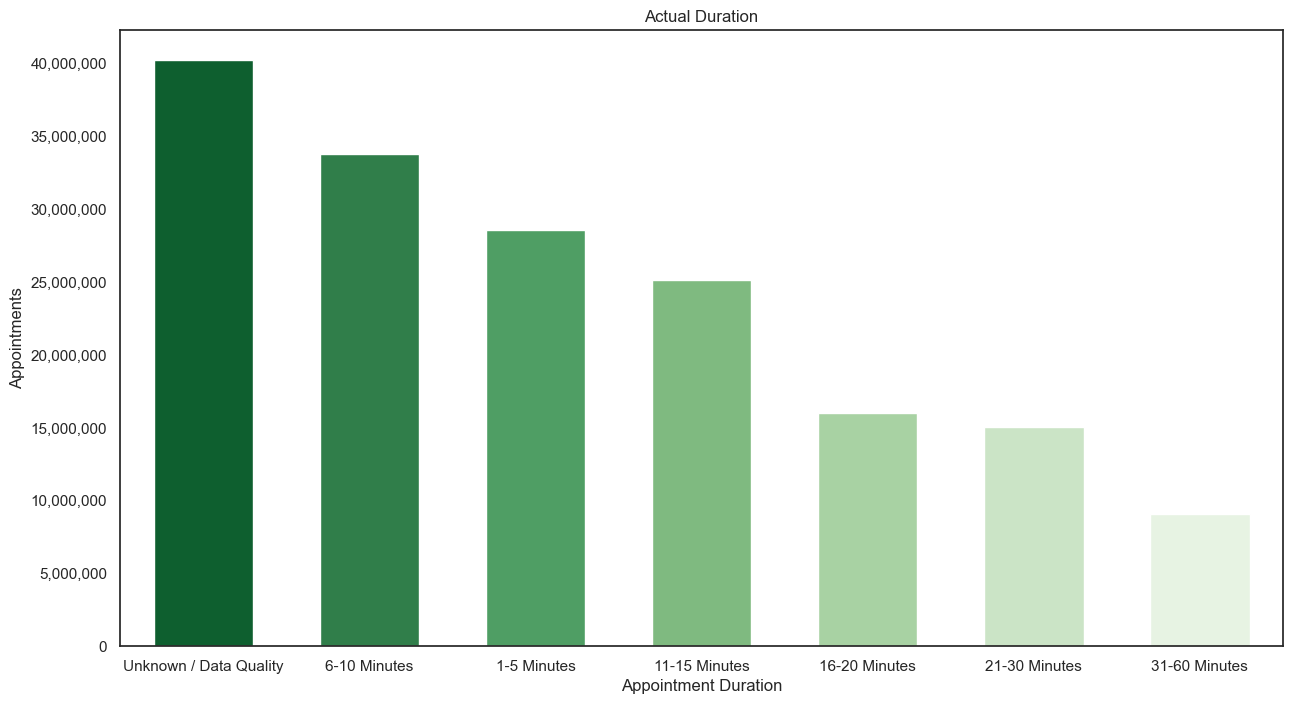

In [86]:
# Bar plot for actual duration.

# Set size and background colour 
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('white')

# Plot bar chart
ax = sns.barplot(x='actual_duration', y='count_of_appointments', data=ad_duration, palette="Greens_r", width=0.6)

# Format y axis

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Title and Axis labels
ax.set_title("Actual Duration")
ax.set_xlabel("Appointment Duration")
ax.set_ylabel("Appointments")

# Save the plot
plt.savefig('Actual Duration')

Approximately 40 million appointments run past the 15 minute mark. There are too many appointments in the unknown/data quality. Measures should be implemented to address the data quality of the actual duration dataset. 

## 6. Capacity and Utilisation of Resources


Compare avaerage utilisation with capacity. Calculate the actual utilisation by subtracting DNAs. This will show spare capacity if DNAs are eradicated.

In [87]:
# Determine the total number of appointments per month. Groupby appointment_status and appointment_month.
# Maintain order of occurrence by not selecting sort.

new_df_name = 'ar_monthly_ut'
from_df_name = 'ar'
group_by1 = 'appointment_month'
group_by2_option = 'y'
group_by2 = 'appointment_status'
location_filter = 'n'
location = None
# Filter the data set to only look at data from 2021-08 onwards if required (better to look at all data).
date_filter = 'n'
start_date = None
end_date = None
sort = 'n'
top_5 = 'n'

sum_appointments_multi(new_df_name, from_df_name, group_by1, group_by2_option, group_by2, location_filter, location,
                            date_filter, start_date, end_date, sort, top_5)

ar_monthly_ut

Number of appointment_month:  30


appointment_month appointment_status  count_of_appointments
0            2020-01           Attended               24538291
1            2020-01                DNA                1298269
2            2020-01            Unknown                1362736
3            2020-02           Attended               21640067
4            2020-02                DNA                1215154
..               ...                ...                    ...
85           2022-05                DNA                1199518
86           2022-05            Unknown                 952049
87           2022-06           Attended               23715317
88           2022-06                DNA                1167790
89           2022-06            Unknown                 944971

[90 rows x 3 columns]

Pivot and add several columns so that DNA can be isolated, subtracted from the total appointments to show actual appointments used. Then divide both by 30 to have average utilisation and average actual utilisation.

In [88]:
# Pivot to isolate DNA
pivot_ar_monthly_ut = ar_monthly_ut.pivot(index='appointment_month', columns='appointment_status', 
                                  values='count_of_appointments').fillna(0)
# Add a total column
pivot_ar_monthly_ut['Total'] = pivot_ar_monthly_ut.sum(axis=1)

# Add a total less confirmed DNAs to find actual utilistation

pivot_ar_monthly_ut['Actual Utilisation'] = (pivot_ar_monthly_ut['Total'] - pivot_ar_monthly_ut['DNA'])

# Create 3 new columns. Average Utilisation (monthly appointments / 30) 
#average Actual utilistaion Actual utilistaion/30) and NHS threshold 1.2 million.

pivot_ar_monthly_ut['utilisation'] = round((pivot_ar_monthly_ut['Total']/30),1)
pivot_ar_monthly_ut['Av. Actual Utilisation'] = round((pivot_ar_monthly_ut['Actual Utilisation']/30),1)
pivot_ar_monthly_ut['capacity'] = 1200000


# Reset the index to make 'appointment_month' a normal column
pivot_ar_monthly_ut.reset_index(inplace=True)

# View the df
pivot_ar_monthly_ut.head(5)

appointment_status appointment_month  Attended      DNA  Unknown     Total  \
0                            2020-01  24538291  1298269  1362736  27199296   
1                            2020-02  21640067  1215154  1249400  24104621   
2                            2020-03  20718865  1166314  2168289  24053468   
3                            2020-04  13982824   478766  1546291  16007881   
4                            2020-05  14962850   449057  1005305  16417212   

appointment_status  Actual Utilisation  utilisation  Av. Actual Utilisation  \
0                             25901027     906643.2                863367.6   
1                             22889467     803487.4                762982.2   
2                             22887154     801782.3                762905.1   
3                             15529115     533596.0                517637.2   
4                             15968155     547240.4                532271.8   

appointment_status  capacity  
0                    1200000  
1                    1200000  
2                    1200000  
3                    1200000  
4                    1200000

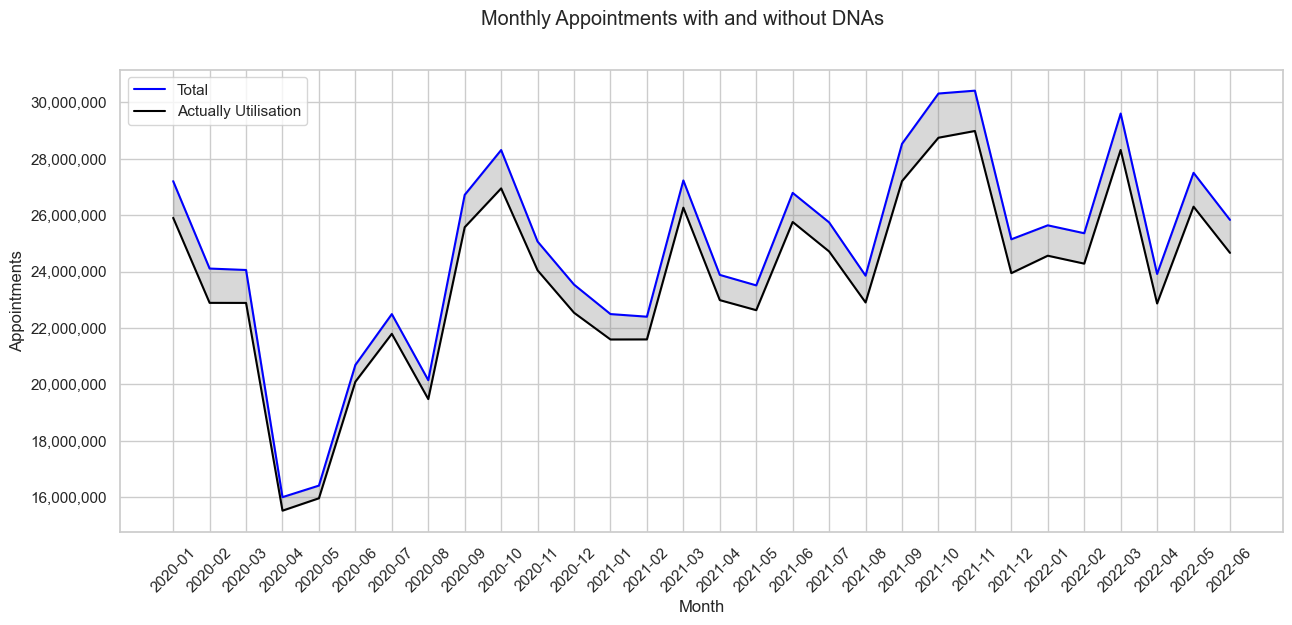

In [89]:
# Plot monthly appointments and monthly appointments less confirmed DNAs.
# Set the styling
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style('whitegrid')

# Lineplot
# Total appointments
ax = sns.lineplot(x='appointment_month', y= 'Total', data=pivot_ar_monthly_ut,
                   color='blue', label='Total')

# Total appointments less confirmed DNAs
ax = sns.lineplot(x='appointment_month', y= 'Actual Utilisation', data=pivot_ar_monthly_ut, 
                   color='black', label='Actually Utilisation')
# Format axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Create shaded area between lines
ax.fill_between(pivot_ar_monthly_ut['appointment_month'],
                pivot_ar_monthly_ut['Total'],
                pivot_ar_monthly_ut['Actual Utilisation'],
                color='gray', alpha=0.3)

# Labels and legend
plt.suptitle('Monthly Appointments with and without DNAs')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()
# Save
plt.savefig('Monthly Appointments with and without DNAs')

The shaded area shows the loss in utilisation caused by confirmed missed appointments. This area might be considerably larger if the 'unknown' column contains DNAs

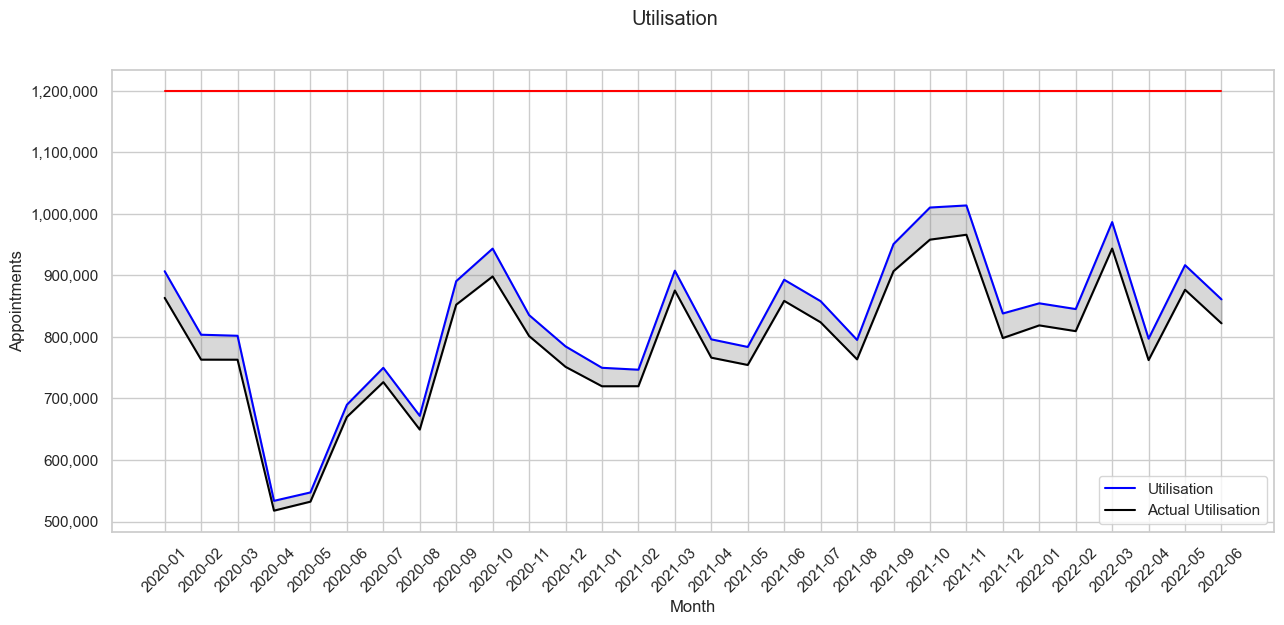

In [90]:
# Create a line plot of the average utilisation with average Actual utilisation (ie less av. DNAs)
# Set the styling
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style('whitegrid')

# lineplot
ax = sns.lineplot(x='appointment_month', y= 'utilisation', data=pivot_ar_monthly_ut,
                  color='blue', label='Utilisation')
ax = sns.lineplot(x='appointment_month', y= 'Av. Actual Utilisation', data=pivot_ar_monthly_ut, 
                   color='black', label='Actual Utilisation')
# plot capacity line
sns.lineplot(x='appointment_month', y= 'capacity', data=pivot_ar_monthly_ut, color='red')

# Format axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Create shaded area between lines
ax.fill_between(pivot_ar_monthly_ut['appointment_month'],
                pivot_ar_monthly_ut['utilisation'],
                pivot_ar_monthly_ut['Av. Actual Utilisation'],
                color='gray', alpha=0.3)

# Labels and legend
plt.suptitle('Utilisation')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()

# Save
plt.savefig('Utilisation.png')

The NHS is currently operating below capacity.

## 7. Patterns and Predictions 

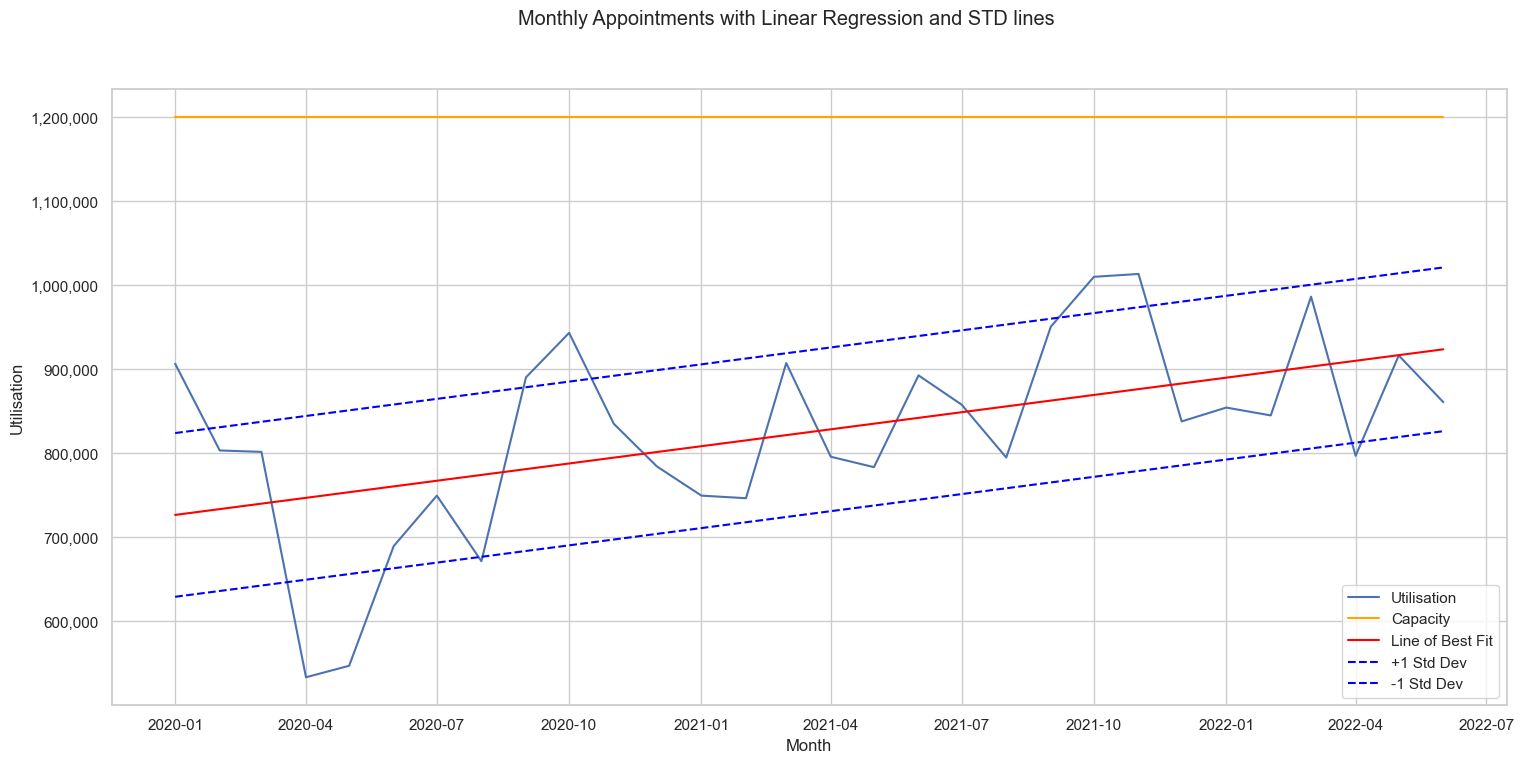

In [91]:
# Using a line of best fit, with a channel 1 standard deviation either side to capture peaks and troughs of appointments, 
# Confirm the uptrend

#Set style and size
sns.set(rc={'figure.figsize':(18, 8)})
sns.set_style('whitegrid')

# Convert appointment month to a float for calcualtions to follow.

dates = pd.to_datetime(pivot_ar_monthly_ut['appointment_month'])
dates_as_float = date2num(dates)

# Create a vaiable for utilisation 
utilisation = pivot_ar_monthly_ut['utilisation']

# Create linear regression 
coefficients = np.polyfit(dates_as_float, utilisation, 1)
polynomial = np.poly1d(coefficients)

# Calcualte residuals ie the difference between utilisation and predicted future values. Use numpy std function 
# to find standard deviation.

residuals = utilisation - polynomial(dates_as_float)
std_dev_residuals = np.std(residuals)

# Plot monthly capacity, utilisation and line of best fit using Matplotlib
plt.plot(dates, utilisation, label='Utilisation')
plt.plot(dates, pivot_ar_monthly_ut['capacity'], label='Capacity', color='orange')
plt.plot(dates, polynomial(dates_as_float), label='Line of Best Fit', color='red')

# Add +/- 1 standard deviation from the regression line
upper_line = polynomial(dates_as_float) + std_dev_residuals
lower_line = polynomial(dates_as_float) - std_dev_residuals

# Plot and Style the STD lines
plt.plot(dates, upper_line, linestyle='dashed', color='blue', label='+1 Std Dev')
plt.plot(dates, lower_line, linestyle='dashed', color='blue', label='-1 Std Dev')


# Format Axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Labels
plt.suptitle('Monthly Appointments with Linear Regression and STD lines')
plt.xlabel('Month')
plt.ylabel('Utilisation')

# Show legend
plt.legend()

# Save
plt.savefig('Monthly Appointments Linreg.png')

## Based on Historic evidence, can we predict when this capacity might be under threat?

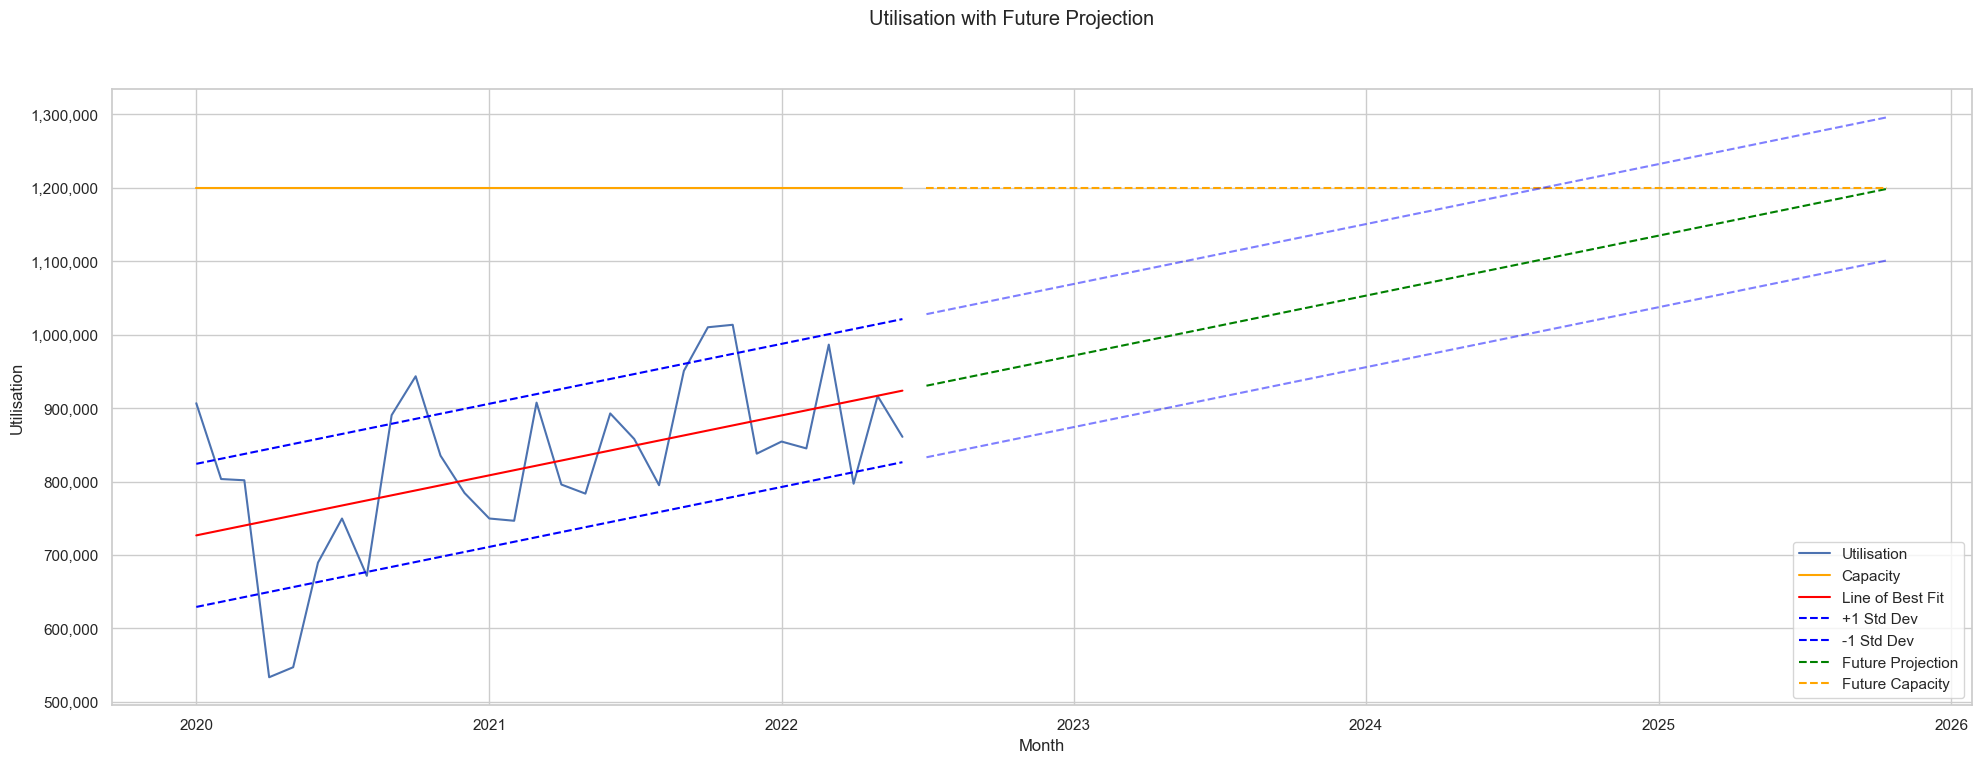

In [92]:
# Using a line of best fit, with a channel 1 standard deviation either side to capture peaks and troughs of appointments, 
# predict when the capacity might be reached!

# Convert appointment month to a float for calcualtions to follow.

#Set style and size
sns.set(rc={'figure.figsize':(24, 8)})
sns.set_style('whitegrid')

# Convert appointment month to a float for calcualtions to follow.

dates = pd.to_datetime(pivot_ar_monthly_ut['appointment_month'])
dates_as_float = date2num(dates)

# Create a vaiable for utilisation 
utilisation = pivot_ar_monthly_ut['utilisation']

# Create linear regression 
coefficients = np.polyfit(dates_as_float, utilisation, 1)
polynomial = np.poly1d(coefficients)

# Calcualte residuals ie the difference between utilisation and predicted future values. Use numpy std function 
# to find standard deviation.

residuals = utilisation - polynomial(dates_as_float)
std_dev_residuals = np.std(residuals)

# Plot monthly capacity, utilisation and line of best fit using Matplotlib
plt.plot(dates, utilisation, label='Utilisation')
plt.plot(dates, pivot_ar_monthly_ut['capacity'], label='Capacity', color='orange')
plt.plot(dates, polynomial(dates_as_float), label='Line of Best Fit', color='red')

# Plot lines at 2 standard deviations from the regression line
upper_line = polynomial(dates_as_float) + std_dev_residuals
lower_line = polynomial(dates_as_float) - std_dev_residuals

plt.plot(dates, upper_line, linestyle='dashed', color='blue', label='+1 Std Dev')
plt.plot(dates, lower_line, linestyle='dashed', color='blue', label='-1 Std Dev')

# Extend the line of best fit into the future
# 42 refers to the number of months assuming 30 days in a month.
future_dates = [dates.max() + timedelta(days=int(30* i)) for i in range(1, 42)] 
future_dates_as_float = date2num(future_dates)
future_y_values = polynomial(future_dates_as_float)
plt.plot(future_dates, future_y_values, linestyle='dashed', label='Future Projection', color='green')

# Extend capacity line

future_capacity_line = pivot_ar_monthly_ut['capacity'].iloc[-1] 
future_capacity_values = [future_capacity_line] * len(future_dates)
plt.plot(future_dates, future_capacity_values, linestyle='dashed', color='orange', label='Future Capacity')

# Extend the SD lines into the future
future_upper_line = polynomial(future_dates_as_float) + std_dev_residuals
future_lower_line = polynomial(future_dates_as_float) - std_dev_residuals

plt.plot(future_dates, future_upper_line, linestyle='dashed', color='blue', alpha=0.5)
plt.plot(future_dates, future_lower_line, linestyle='dashed', color='blue', alpha=0.5)


# Format Axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Labels
plt.suptitle('Utilisation with Future Projection')
plt.xlabel('Month')
plt.ylabel('Utilisation')

# Show legend
plt.legend()

plt.savefig('Utilisation with Future Projection.png')

If the Autumn peaks continue to break previous highs and the Spring troughs exceed previous lows, we might expect the capacity of 1.2 million to be reached in Autumn 2024 as illustrated by the upper standard deviation line.  
Therefore, the NHS might consider actioning a recruitment drive if the 2022 Autumn figures exceed 1.05 million. 


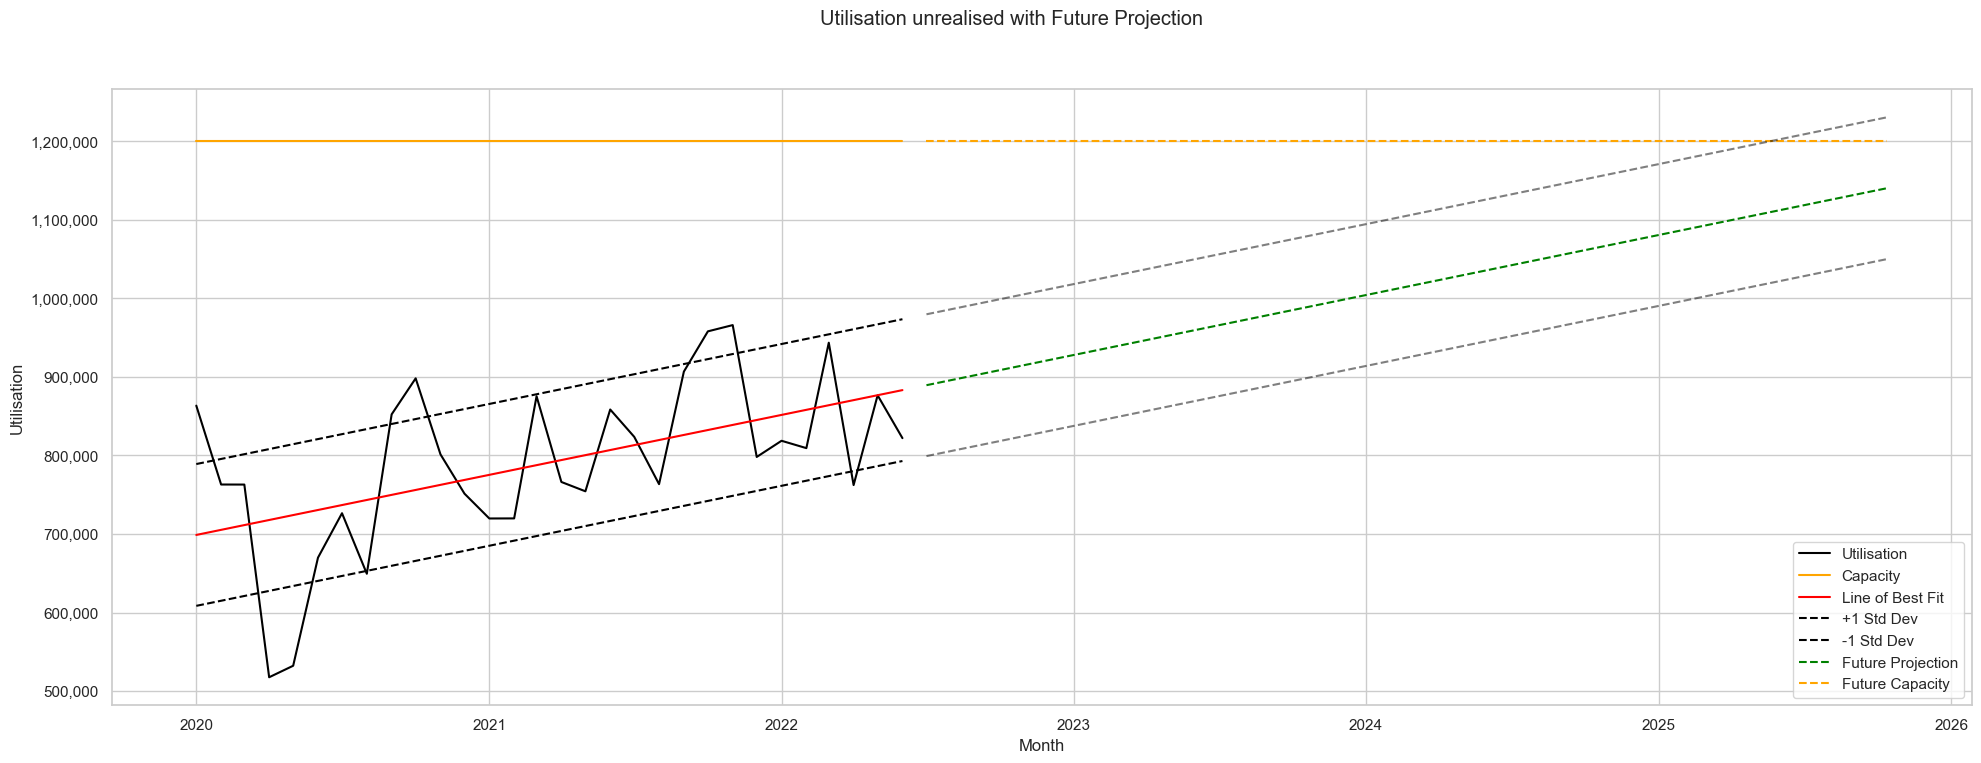

In [93]:
# Using a line of best fit, with a channel 1 standard deviation either side to capture peaks and troughs of appointments, 

# predict when the capacity might be reached using Total Appointments less DNAs

# Convert appointment month to a float for calcualtions to follow.

#Set style and size
sns.set(rc={'figure.figsize':(24, 8)})
sns.set_style('whitegrid')

# Convert appointment month to a float for calcualtions to follow.

dates = pd.to_datetime(pivot_ar_monthly_ut['appointment_month'])
dates_as_float = date2num(dates)

# Create a vaiable for utilisation 
utilisation = pivot_ar_monthly_ut['Av. Actual Utilisation']

# Create linear regression 
coefficients = np.polyfit(dates_as_float, utilisation, 1)
polynomial = np.poly1d(coefficients)

# Calcualte residuals ie the difference between utilisation and predicted future values. Use numpy std function 
# to find standard deviation.

residuals = utilisation - polynomial(dates_as_float)
std_dev_residuals = np.std(residuals)

# Plot monthly capacity, utilisation and line of best fit using Matplotlib
plt.plot(dates, utilisation, label='Utilisation', color= 'black')
plt.plot(dates, pivot_ar_monthly_ut['capacity'], label='Capacity', color='orange')
plt.plot(dates, polynomial(dates_as_float), label='Line of Best Fit', color='red')

# Plot lines at 2 standard deviations from the regression line
upper_line = polynomial(dates_as_float) + std_dev_residuals
lower_line = polynomial(dates_as_float) - std_dev_residuals

plt.plot(dates, upper_line, linestyle='dashed', color='black', label='+1 Std Dev')
plt.plot(dates, lower_line, linestyle='dashed', color='black', label='-1 Std Dev')

# Extend the line of best fit into the future
# 42 refers to the number of months assuming 30 days in a month.
future_dates = [dates.max() + timedelta(days=int(30* i)) for i in range(1, 42)] 
future_dates_as_float = date2num(future_dates)
future_y_values = polynomial(future_dates_as_float)
plt.plot(future_dates, future_y_values, linestyle='dashed', label='Future Projection', color='green')

# Extend capacity line

future_capacity_line = pivot_ar_monthly_ut['capacity'].iloc[-1] 
future_capacity_values = [future_capacity_line] * len(future_dates)
plt.plot(future_dates, future_capacity_values, linestyle='dashed', color='orange', label='Future Capacity')

# Extend the SD lines into the future
future_upper_line = polynomial(future_dates_as_float) + std_dev_residuals
future_lower_line = polynomial(future_dates_as_float) - std_dev_residuals

plt.plot(future_dates, future_upper_line, linestyle='dashed', color='black', alpha=0.5)
plt.plot(future_dates, future_lower_line, linestyle='dashed', color='black', alpha=0.5)


# Format Axis
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Labels
plt.suptitle('Utilisation unrealised with Future Projection')
plt.xlabel('Month')
plt.ylabel('Utilisation')

# Show legend
plt.legend()

plt.savefig('Utilisation unrealised with Future Projection.png')

##  Twitter

###  What are the top trending hashtags.

In [94]:
# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [95]:
# Load the tweet data set.

tweets = pd.read_csv('tweets.csv')

# Explore the metadata and data set.
print(tweets.shape)
print(tweets.info())

# View the DataFrame.
tweets.head()


(1174, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [96]:
# Review the 'tweet_retweet_count' and 'tweet_favorite_count' columns with describe and value_counts().

print(tweets[['tweet_retweet_count', 'tweet_favorite_count']].describe())
print(tweets['tweet_retweet_count'].value_counts().head())
print(tweets['tweet_favorite_count'].value_counts().head())

       tweet_retweet_count  tweet_favorite_count
count          1174.000000            1174.00000
mean              8.629472               0.37138
std              29.784675               2.04470
min               0.000000               0.00000
25%               0.000000               0.00000
50%               1.000000               0.00000
75%               3.000000               0.00000
max             303.000000              42.00000
0    526
1    215
2    114
3     70
5     35
Name: tweet_retweet_count, dtype: int64
0    1027
1      91
2      16
3      13
4       7
Name: tweet_favorite_count, dtype: int64


### Would it be useful to only look at retweeted and favourite tweet messages?

It might be useful to filter for those tweets that had a retweet or favourited count greater than 0. Tweets that have been shared or liked indicate a degree of user engagement and may help identify popular or influential content. I have therefore elected to filter the dataframe to only include those tweets that have been shared or liked.

In [97]:
# Filter tweets df to exclude 0 in 'tweet_retweet_count' or 'tweet_favorite_count'.

tweets_popular = tweets[(tweets['tweet_retweet_count'] > 0) | (tweets['tweet_favorite_count'] > 0)]

In [98]:
# Create a new DataFrame containing only the text.

tweets_text = tweets_popular['tweet_full_text']

# View the DataFrame.
tweets_text.head()


1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
6    🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data as focus intensifies on addressing #disparities. h/t @JessicaKimCohen &amp;...
8                                                             RT @AlikaMD: Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want

In [99]:
# Loop through the messages, and create a list of values containing the # symbol.

# Create an empty list.
tags = []

# loop through the 'tweet_full_text' to identify words with prefix # and add to the empty list tags.
for tweets_text in [tweet.split(' ') for tweet in tweets_popular['tweet_full_text'].values]:
    for text in tweets_text:
        if '#' in text:
            tags.append(text.lower())

# Create a series from the list tags.            
tags_series = pd.Series(tags)

# Count the number of times each word occurs in the filtered series.
tags_count = tags_series.value_counts()
tags_count

#healthcare                                             327
#health                                                  55
#ai                                                      37
#medicine                                                34
#strategy                                                29
                                                       ... 
#japan.\n\nread…                                          1
telehealth\n\nhttps://t.co/lpmztfyucv\n\n#telehealth      1
#revenuecycle                                             1
#worldhealthorganization                                  1
\n#csjmu                                                  1
Length: 874, dtype: int64

In [100]:
# Display the first 30 records.
print("The Top 30 trending hashtags: ")
tags_count.head(30)

The Top 30 trending hashtags: 


#healthcare                    327
#health                         55
#ai                             37
#medicine                       34
#strategy                       29
#medical                        27
#marketing                      25
#pharma                         25
#pharmaceutical                 25
#biotech                        24
#competitiveintelligence        24
#medtwitter                     23
#meded                          21
#job                            19
#digitalhealth                  17
#covid                          16
#womeninmedicine                16
#machinelearning                16
#competitivemarketing           16
#science                        14
#vaccine                        14
#coronavirus                    13
#foamed                         13
#hiring                         13
#tech                           12
#medicare                       12
#technology                     11
drugs\n\n#tipsfornewdocs        11
#healthcare!\n\ninfo

In [101]:
# Convert the series to a DataFrame using the reset_index() function in preparation for visualisation and rename the columns.

tags_count = tags_count.reset_index().rename(columns={'index': 'tag', 0: 'count'})

# Sense check the new dataframe, ensure the count is type integer.

print(tags_count.head())
print(tags_count.dtypes)
print(tags_count.describe())
tags_count.head()

           tag  count
0  #healthcare    327
1      #health     55
2          #ai     37
3    #medicine     34
4    #strategy     29
tag      object
count     int64
dtype: object
            count
count  874.000000
mean     2.783753
std     11.718839
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max    327.000000


tag  count
0  #healthcare    327
1      #health     55
2          #ai     37
3    #medicine     34
4    #strategy     29

In [102]:
# Display records where the count is larger than 10.

tags_count_above_10 = tags_count[tags_count['count']>10]

# Verify lowest count is above 10
tags_count_above_10.tail()

tag  count
23                   #hiring     13
24                     #tech     12
25                 #medicare     12
26               #technology     11
27  drugs\n\n#tipsfornewdocs     11

<Axes: xlabel='count', ylabel='tag'>

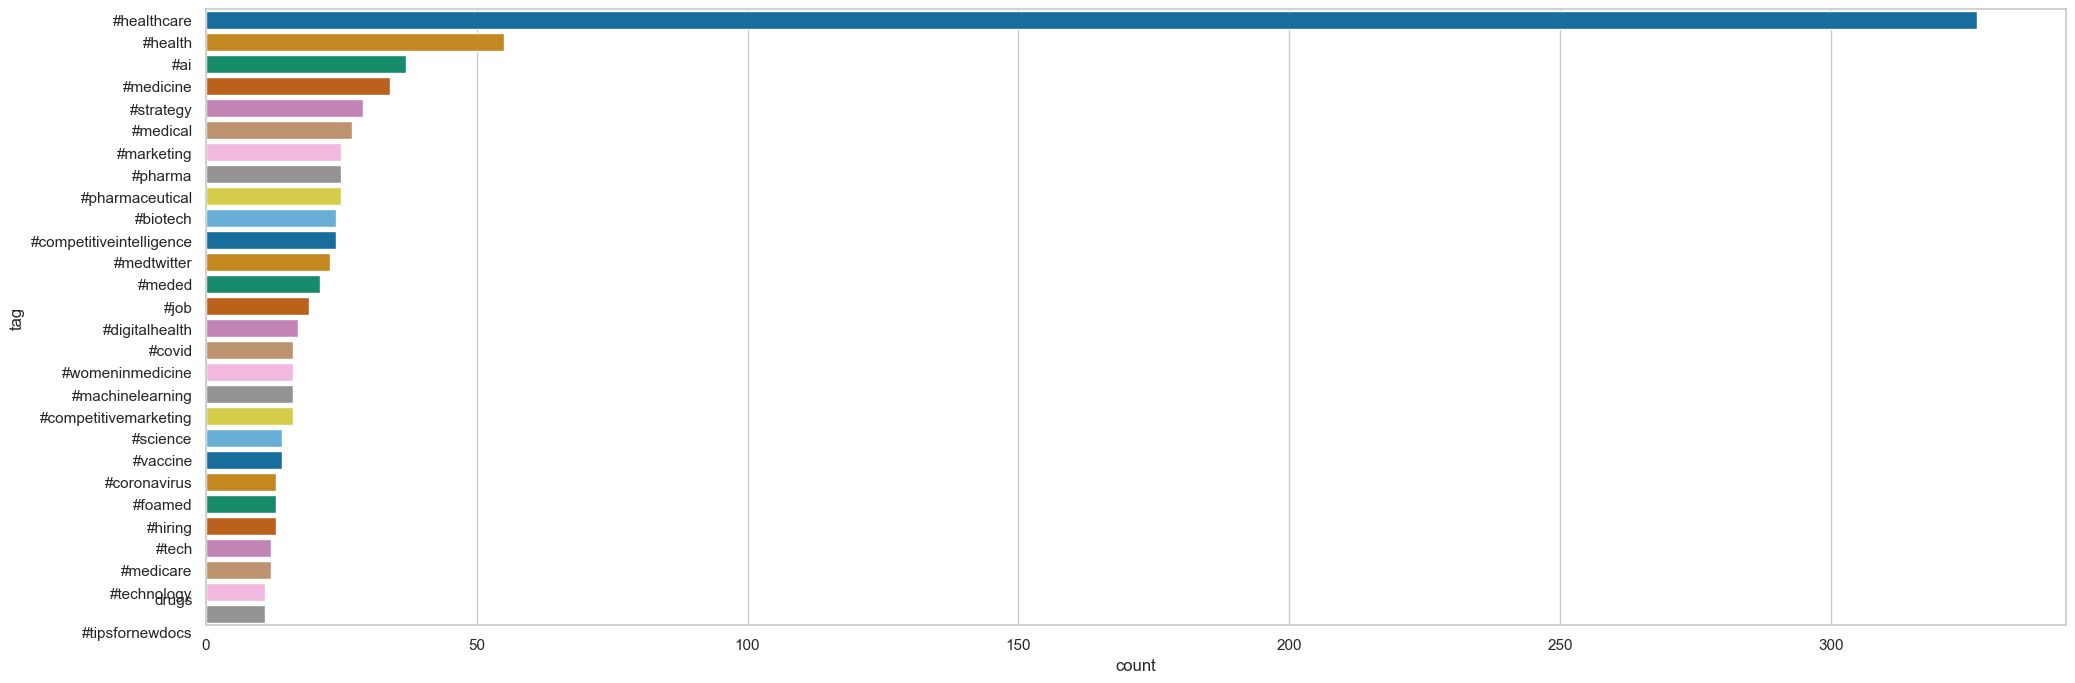

In [103]:
# Create a preliminary plot

sns.barplot(x='count', y='tag', data=tags_count_above_10, palette='colorblind')

There are numerous instances above where records are equivalent, for example #covid, and #coronovirus etc. The dataframe was assessed for duplicates and the equivalents mapped into the dataframe. 

The above plot recycles colours from the palette. I have elected to use a graded colour palette.

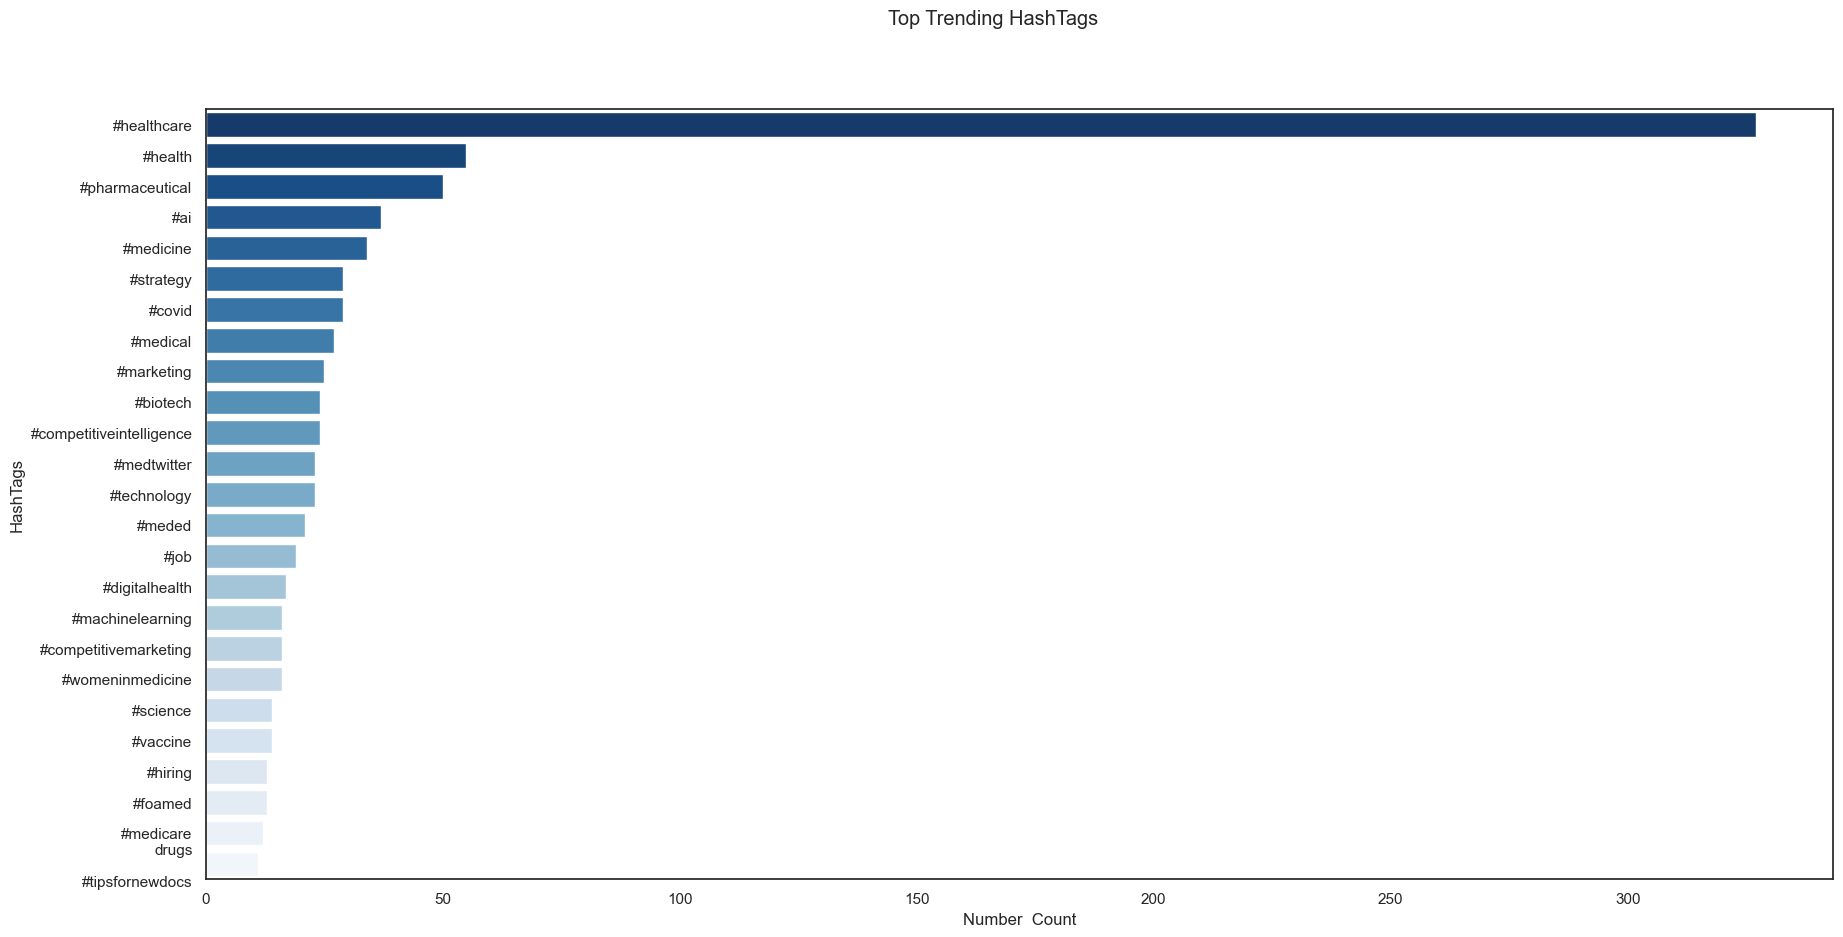

In [104]:
# Map equivalents into df

equivalent_hashtags = {'#coronavirus': '#covid', 
                      '#tech': '#technology',
                      '#pharma':'#pharmaceutical'}

tags_count_above_10['tag'] = tags_count_above_10['tag'].apply(lambda x: equivalent_hashtags.get(x, x))

# Aggregate again after mapping the replacement tags.
tags_count_above_10 = tags_count_above_10.groupby('tag')['count'].sum().reset_index()

# Re-sort by count.
tags_count = tags_count_above_10.sort_values('count', ascending=False)

#Style and size
sns.set(rc={'figure.figsize':(21, 10)})
sns.set_style('white')

# Recreate barplot.

sns.barplot(x='count', y='tag', data=tags_count, palette="Blues_r")

# Title and labels

plt.suptitle('Top Trending HashTags')
plt.xlabel('Number  Count')
plt.ylabel('HashTags')
# Save the plot
plt.savefig('Top Trending HashTags.png')

The df was filtered to exclude retweet and favourite counts of 0 and isolated for ‘tweet_full_text’ only.
The resultant df was searched for words with the suffix # using a for loop. The results were stored in an empty list, converted to a series, and sorted in descending order of value count. The series was then converted to a df using the reset_index method and filtered for those with a count greater than 10.

Numerous equivalent tags were observed e.g. #coronavirus and #covid, #tech' and #technology and #pharma' and '#pharmaceutical'. These were combined and mapped into the df.

It is evident that the top trending hashtag in the data set is #healthcare. It should be noted that this would have been higher as prior to filtering, the dataset contained equivalents #healthcare. and #healthcare?.


### Extracting value from Twitter.
Twitter is highly responsive to public sentiment and therefore could be leveraged by the NHS to understand the following:

**Public health sentiment and Encouraging stakeholder engagement.**

- Tracking healthcare services receiving positive / negative coverage with regards to appointments and healthcare provision.
- Gaining insights into public opinions about NHS services and healthcare in general.
- Prevailing symptoms and gauge of population illness.
- Personalized advice through direct messaging, reducing pressure on traditional avenues. 
- Location specific issues.
- Monitoring public opinion

**Communication**

- Direct engagement with stakeholders regarding patient concerns.
- Feedback on how to improve services.
- Sharing news releases and health messages.
- Provide details on how to cancel appointments to reduce DNAs.
**Crisis Management**

- Early warning of flu and other epidemics from trending symptoms. 

**Education**

- Helping to educate the public on healthy living.
- Symptoms to look out for.

**Effective use of hashtags**

- Using hashtags to link similar tweets and tap into wider networks.
